<div class="alert alert-success" >
    <center><h1><font color=#4a7d52>Machine Learning Final Project</font></h1></center><br>
    <center>2022/2023</center>
</div>

# 1. Data Exploration

## 1.1 Imports

In [366]:
import pandas as pd 
import numpy as np

# data partition
from sklearn.model_selection import train_test_split

# data transformation
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

# feature selection

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.svm import SVC

# models
from sklearn.model_selection import GridSearchCV #for hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter optimization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import graphviz
import pydotplus
import textwrap

# assessment
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

## 1.2 Data Integration

First, we import the datasets into variables.

In [2]:
train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

In [3]:
train_demo.head()

PatientID                Name  Birth_Year                    Region  \
0       1167  Mrs. Stephanie Gay        1965                    London   
1       1805    Mr. Sherman Nero        1969                South West   
2       1557     Mr. Mark Boller        1974  Yorkshire and the Humber   
3       1658    Mr. David Caffee        1958                    London   
4       1544    Mr. Gerald Emery        1968                South East   

                                     Education  Disease  
0  High School Incomplete (10th to 11th grade)        1  
1  High School Incomplete (10th to 11th grade)        1  
2         Elementary School (1st to 9th grade)        1  
3        University Complete (3 or more years)        0  
4         University Incomplete (1 to 2 years)        1

In [4]:
train_habits.head()

PatientID Smoking_Habit                       Drinking_Habit Exercise  \
0       1167            No  I usually consume alcohol every day      Yes   
1       1805            No   I consider myself a social drinker      Yes   
2       1557            No   I consider myself a social drinker       No   
3       1658            No  I usually consume alcohol every day      Yes   
4       1544            No   I consider myself a social drinker       No   

                                       Fruit_Habit  \
0  Less than 1. I do not consume fruits every day.   
1  Less than 1. I do not consume fruits every day.   
2  Less than 1. I do not consume fruits every day.   
3  Less than 1. I do not consume fruits every day.   
4                1 to 2 pieces of fruit in average   

                                      Water_Habit  
0                Between one liter and two liters  
1                Between one liter and two liters  
2  More than half a liter but less than one liter  
3  More than half a liter but less than one liter  
4  More than half a liter but less than one liter

In [5]:
train_health.head()

PatientID  Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
0       1167     155      67               358             120             21   
1       1805     173      88               230             142              9   
2       1557     162      68               226             122             26   
3       1658     180      66               313             125             13   
4       1544     180      58               277             125             18   

   Physical_Health            Checkup  \
0                2  More than 3 years   
1                0           Not sure   
2                0  More than 3 years   
3                8           Not sure   
4                2  More than 3 years   

                                            Diabetes  
0   Neither I nor my immediate family have diabetes.  
1   Neither I nor my immediate family have diabetes.  
2   Neither I nor my immediate family have diabetes.  
3  I have/had pregnancy diabetes or borderline di...  
4  I have/had pregnancy diabetes or borderline di...

Merging all the datasets into a unique one based on the PatientID variable.

In [6]:
train_patient_original = pd.merge(pd.merge(train_demo, train_health, on="PatientID"), train_habits, on='PatientID')

In [7]:
train_patient = train_patient_original.copy()

Defining the PatientID as the index of our dataframe.

In [8]:
train_patient.set_index('PatientID', inplace = True)
train_patient.head()

Name  Birth_Year                    Region  \
PatientID                                                             
1167       Mrs. Stephanie Gay        1965                    London   
1805         Mr. Sherman Nero        1969                South West   
1557          Mr. Mark Boller        1974  Yorkshire and the Humber   
1658         Mr. David Caffee        1958                    London   
1544         Mr. Gerald Emery        1968                South East   

                                             Education  Disease  Height  \
PatientID                                                                 
1167       High School Incomplete (10th to 11th grade)        1     155   
1805       High School Incomplete (10th to 11th grade)        1     173   
1557              Elementary School (1st to 9th grade)        1     162   
1658             University Complete (3 or more years)        0     180   
1544              University Incomplete (1 to 2 years)        1     180   

           Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                            
1167           67               358             120             21   
1805           88               230             142              9   
1557           68               226             122             26   
1658           66               313             125             13   
1544           58               277             125             18   

           Physical_Health            Checkup  \
PatientID                                       
1167                     2  More than 3 years   
1805                     0           Not sure   
1557                     0  More than 3 years   
1658                     8           Not sure   
1544                     2  More than 3 years   

                                                    Diabetes Smoking_Habit  \
PatientID                                                                    
1167        Neither I nor my immediate family have diabetes.            No   
1805        Neither I nor my immediate family have diabetes.            No   
1557        Neither I nor my immediate family have diabetes.            No   
1658       I have/had pregnancy diabetes or borderline di...            No   
1544       I have/had pregnancy diabetes or borderline di...            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   
1557        I consider myself a social drinker       No   
1658       I usually consume alcohol every day      Yes   
1544        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   
1557       Less than 1. I do not consume fruits every day.   
1658       Less than 1. I do not consume fruits every day.   
1544                     1 to 2 pieces of fruit in average   

                                              Water_Habit  
PatientID                                                  
1167                     Between one liter and two liters  
1805                     Between one liter and two liters  
1557       More than half a liter but less than one liter  
1658       More than half a liter but less than one liter  
1544       More than half a liter but less than one liter

## 1.3 Initial Analysis

In [9]:
# --- Print Dataset Info ---
print('\033[36m\033[1m'+'.: Dataset Info :.')
print('\033[0m\033[36m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[36m\033[1m', train_patient.shape[0])
print('\033[0m'+'Total Columns:'+'\033[36m\033[1m', train_patient.shape[1])
print('\033[0m\033[36m*' * 20)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.')
print('\033[0m\033[36m*' * 22 +'\033[0m')
train_patient.info(memory_usage = False)

.: Dataset Info :.
********************
Total Rows: 800
Total Columns: 18
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Height            800 non-null    int64 
 6   Weight            800 non-null    int64 
 7   High_Cholesterol  800 non-null    int64 
 8   Blood_Pressure    800 non-null    int64 
 9   Mental_Health     800 non-null    int64 
 10  Physical_Health   800 non-null    int64 
 11  Checkup           800 non-null    object
 12  Diabetes          800 non-null    object
 13  Smoking_Habit     800 non-null    object
 14  Drinking

### 1.3.1 Duplicate records

Checking if there are any duplicates in our dataframe.

In [10]:
print('\033[36m\033[1m'+'.: Duplicated Values :.')
print('\033[0m\033[36m*' * 23)
print('\033[0m', train_patient.duplicated().value_counts())

.: Duplicated Values :.
***********************
 False    800
dtype: int64


### 1.3.2 Undesireable characters

In [11]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = train_patient.replace(undesireable_char,np.nan, inplace=True)
print('\033[36m\033[1m'+'.: Undesirable Characters :.')
print('\033[0m\033[36m*' * 28)
print('\033[0m', a)

.: Undesirable Characters :.
****************************
 None


### 1.3.3 Missing values

In [12]:
total = train_patient.isnull().sum().sort_values(ascending=False)
percent = (train_patient.isnull().sum()/train_patient.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('\033[36m\033[1m'+'.: Null Values :.')
print('\033[0m\033[36m*' * 17)
print('\033[0m', missing_data)

.: Null Values :.
*****************
                   Total  Percent
Education            13  0.01625
Name                  0  0.00000
Physical_Health       0  0.00000
Fruit_Habit           0  0.00000
Exercise              0  0.00000
Drinking_Habit        0  0.00000
Smoking_Habit         0  0.00000
Diabetes              0  0.00000
Checkup               0  0.00000
Mental_Health         0  0.00000
Birth_Year            0  0.00000
Blood_Pressure        0  0.00000
High_Cholesterol      0  0.00000
Weight                0  0.00000
Height                0  0.00000
Disease               0  0.00000
Region                0  0.00000
Water_Habit           0  0.00000


Looking for null values in the dataframe. We concluded that Education contains 13 null values.

### 1.3.4 Data Statistics

In [13]:
train_patient_num = train_patient.select_dtypes(exclude=object)
train_patient_cat = train_patient.select_dtypes(include=object)

In [14]:
train_patient_num.describe().T

count        mean        std     min      25%     50%  \
Birth_Year        800.0  1966.04375  15.421872  1855.0  1961.00  1966.0   
Disease           800.0     0.51375   0.500124     0.0     0.00     1.0   
Height            800.0   167.80625   7.976888   151.0   162.00   167.0   
Weight            800.0    67.82750  12.113470    40.0    58.00    68.0   
High_Cholesterol  800.0   249.32250  51.566631   130.0   213.75   244.0   
Blood_Pressure    800.0   131.05375  17.052693    94.0   120.00   130.0   
Mental_Health     800.0    17.34500   5.385139     0.0    13.00    18.0   
Physical_Health   800.0     4.55875   5.449189     0.0     0.00     3.0   

                     75%     max  
Birth_Year        1974.0  1993.0  
Disease              1.0     1.0  
Height             173.0   180.0  
Weight              77.0    97.0  
High_Cholesterol   280.0   568.0  
Blood_Pressure     140.0   200.0  
Mental_Health       21.0    29.0  
Physical_Health      7.0    30.0

In [15]:
train_patient_cat.describe().T

count unique                                               top  \
Name             800    799                                   Mr. Gary Miller   
Region           800     10                                     East Midlands   
Education        787      6             University Complete (3 or more years)   
Checkup          800      4                                 More than 3 years   
Diabetes         800      4  Neither I nor my immediate family have diabetes.   
Smoking_Habit    800      2                                                No   
Drinking_Habit   800      3               I usually consume alcohol every day   
Exercise         800      2                                                No   
Fruit_Habit      800      5   Less than 1. I do not consume fruits every day.   
Water_Habit      800      3                  Between one liter and two liters   

               freq  
Name              2  
Region          154  
Education       239  
Checkup         429  
Diabetes        392  
Smoking_Habit   673  
Drinking_Habit  406  
Exercise        536  
Fruit_Habit     452  
Water_Habit     364

In [16]:
train_patient[train_patient["Disease"] == 0].describe(include="all").T

count unique  \
Name                389    388   
Birth_Year        389.0    NaN   
Region              389     10   
Education           384      6   
Disease           389.0    NaN   
Height            389.0    NaN   
Weight            389.0    NaN   
High_Cholesterol  389.0    NaN   
Blood_Pressure    389.0    NaN   
Mental_Health     389.0    NaN   
Physical_Health   389.0    NaN   
Checkup             389      4   
Diabetes            389      4   
Smoking_Habit       389      2   
Drinking_Habit      389      3   
Exercise            389      2   
Fruit_Habit         389      5   
Water_Habit         389      3   

                                                               top freq  \
Name                                               Mr. Gary Miller    2   
Birth_Year                                                     NaN  NaN   
Region                                               East Midlands   78   
Education                    University Complete (3 or more years)  116   
Disease                                                        NaN  NaN   
Height                                                         NaN  NaN   
Weight                                                         NaN  NaN   
High_Cholesterol                                               NaN  NaN   
Blood_Pressure                                                 NaN  NaN   
Mental_Health                                                  NaN  NaN   
Physical_Health                                                NaN  NaN   
Checkup                                                   Not sure  241   
Diabetes          Neither I nor my immediate family have diabetes.  289   
Smoking_Habit                                                   No  318   
Drinking_Habit                  I consider myself a social drinker  225   
Exercise                                                       Yes  208   
Fruit_Habit        Less than 1. I do not consume fruits every day.  126   
Water_Habit                       Between one liter and two liters  174   

                         mean        std     min     25%     50%     75%  \
Name                      NaN        NaN     NaN     NaN     NaN     NaN   
Birth_Year        1963.524422  16.521543  1859.0  1960.0  1964.0  1970.0   
Region                    NaN        NaN     NaN     NaN     NaN     NaN   
Education                 NaN        NaN     NaN     NaN     NaN     NaN   
Disease                   0.0        0.0     0.0     0.0     0.0     0.0   
Height             169.205656   7.339265   151.0   165.0   171.0   174.0   
Weight              65.647815  11.688477    40.0    56.0    64.0    73.0   
High_Cholesterol   253.313625   47.96739   135.0   220.0   252.0   287.0   
Blood_Pressure     133.974293  18.546941   100.0   120.0   130.0   144.0   
Mental_Health       15.033419   5.301859     0.0    12.0    16.0    19.0   
Physical_Health      7.030848   6.153456     0.0     2.0     6.0    11.0   
Checkup                   NaN        NaN     NaN     NaN     NaN     NaN   
Diabetes                  NaN        NaN     NaN     NaN     NaN     NaN   
Smoking_Habit             NaN        NaN     NaN     NaN     NaN     NaN   
Drinking_Habit            NaN        NaN     NaN     NaN     NaN     NaN   
Exercise                  NaN        NaN     NaN     NaN     NaN     NaN   
Fruit_Habit               NaN        NaN     NaN     NaN     NaN     NaN   
Water_Habit               NaN        NaN     NaN     NaN     NaN     NaN   

                     max  
Name                 NaN  
Birth_Year        1987.0  
Region               NaN  
Education            NaN  
Disease              0.0  
Height             180.0  
Weight              97.0  
High_Cholesterol   413.0  
Blood_Pressure     200.0  
Mental_Health       28.0  
Physical_Health     30.0  
Checkup              NaN  
Diabetes             NaN  
Smoking_Habit        NaN  
Drinking_Habit       NaN  
Exercise             NaN  
Fruit_Habit          NaN  
Water_Habit   

In [17]:
train_patient[train_patient["Disease"] == 1].describe(include="all").T

count unique  \
Name                411    411   
Birth_Year        411.0    NaN   
Region              411     10   
Education           403      6   
Disease           411.0    NaN   
Height            411.0    NaN   
Weight            411.0    NaN   
High_Cholesterol  411.0    NaN   
Blood_Pressure    411.0    NaN   
Mental_Health     411.0    NaN   
Physical_Health   411.0    NaN   
Checkup             411      4   
Diabetes            411      4   
Smoking_Habit       411      2   
Drinking_Habit      411      3   
Exercise            411      2   
Fruit_Habit         411      5   
Water_Habit         411      3   

                                                                top freq  \
Name                                             Mrs. Stephanie Gay    1   
Birth_Year                                                      NaN  NaN   
Region                                                East Midlands   76   
Education                     University Complete (3 or more years)  123   
Disease                                                         NaN  NaN   
Height                                                          NaN  NaN   
Weight                                                          NaN  NaN   
High_Cholesterol                                                NaN  NaN   
Blood_Pressure                                                  NaN  NaN   
Mental_Health                                                   NaN  NaN   
Physical_Health                                                 NaN  NaN   
Checkup                                           More than 3 years  324   
Diabetes          I have/had pregnancy diabetes or borderline di...  155   
Smoking_Habit                                                    No  355   
Drinking_Habit                  I usually consume alcohol every day  250   
Exercise                                                         No  355   
Fruit_Habit         Less than 1. I do not consume fruits every day.  326   
Water_Habit                        Between one liter and two liters  190   

                         mean        std     min     25%     50%     75%  \
Name                      NaN        NaN     NaN     NaN     NaN     NaN   
Birth_Year        1968.428224  13.908642  1855.0  1963.0  1970.0  1977.0   
Region                    NaN        NaN     NaN     NaN     NaN     NaN   
Education                 NaN        NaN     NaN     NaN     NaN     NaN   
Disease                   1.0        0.0     1.0     1.0     1.0     1.0   
Height             166.481752   8.331342   151.0   158.0   167.0   173.0   
Weight              69.890511  12.161121    41.0    61.0    71.0    79.0   
High_Cholesterol   245.545012  54.545482   130.0   211.0   238.0   272.0   
Blood_Pressure     128.289538  15.013697    94.0   120.0   130.0   138.0   
Mental_Health       19.532847   4.477125     5.0    17.0    20.0    23.0   
Physical_Health      2.218978    3.27827     0.0     0.0     0.0     4.0   
Checkup                   NaN        NaN     NaN     NaN     NaN     NaN   
Diabetes                  NaN        NaN     NaN     NaN     NaN     NaN   
Smoking_Habit             NaN        NaN     NaN     NaN     NaN     NaN   
Drinking_Habit            NaN        NaN     NaN     NaN     NaN     NaN   
Exercise                  NaN        NaN     NaN     NaN     NaN     NaN   
Fruit_Habit               NaN        NaN     NaN     NaN     NaN     NaN   
Water_Habit               NaN        NaN     NaN     NaN     NaN     NaN   

                     max  
Name                 NaN  
Birth_Year        1993.0  
Region               NaN  
Education            NaN  
Disease              1.0  
Height             180.0  
Weight              97.0  
High_Cholesterol   568.0  
Blood_Pressure     180.0  
Mental_Health       29.0  
Physical_Health     20.0  
Checkup              NaN  
Diabetes             NaN  
Smoking_Habit        NaN  
Drinking_Habit       NaN  
Exercise             NaN  
Fruit_Habit          N

In [18]:
train_patient.groupby("Disease").mean()

Birth_Year      Height     Weight  High_Cholesterol  Blood_Pressure  \
Disease                                                                         
0        1963.524422  169.205656  65.647815        253.313625      133.974293   
1        1968.428224  166.481752  69.890511        245.545012      128.289538   

         Mental_Health  Physical_Health  
Disease                                  
0            15.033419         7.030848  
1            19.532847         2.218978

## 1.4 Visual Analysis

### 1.4.1 Categorical Variables Exploration

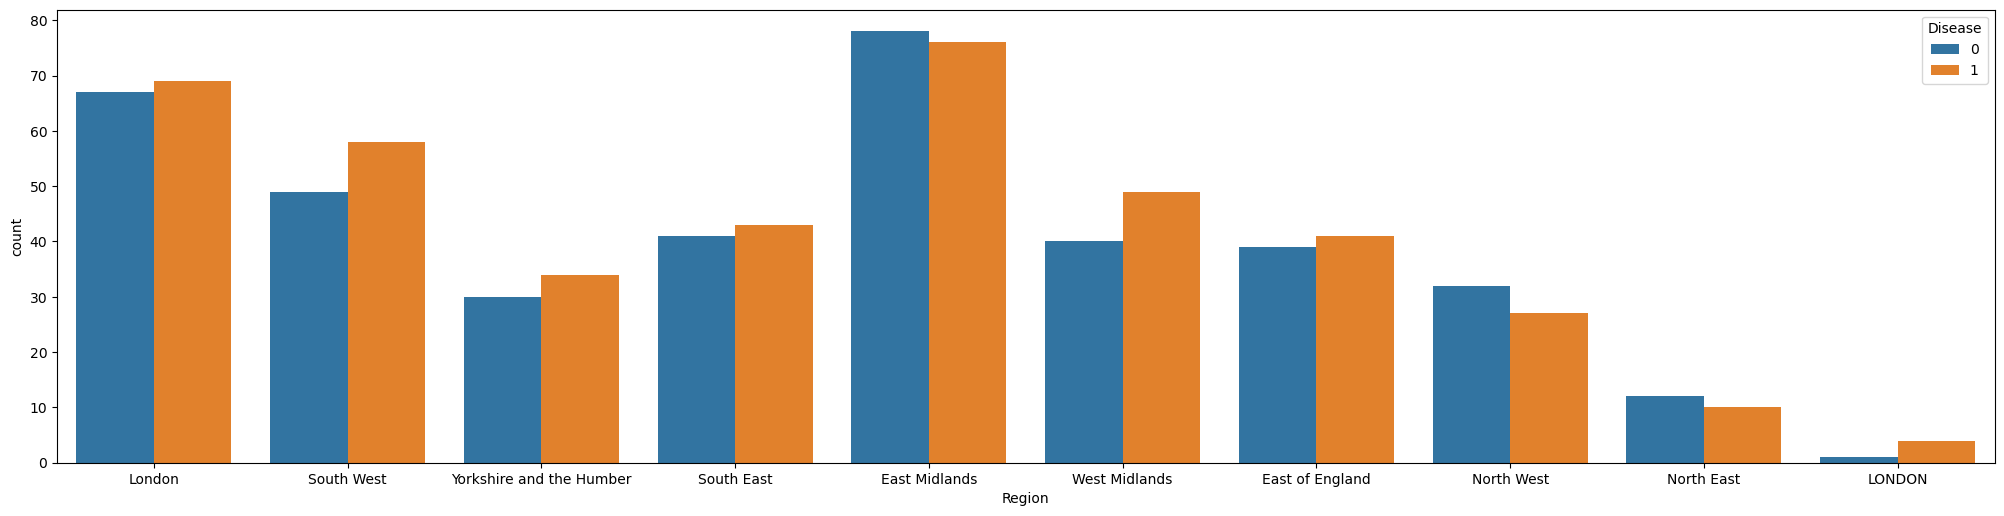

In [19]:
plt.figure(figsize=(25, 6), dpi=100)
sns.countplot(x = 'Region', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Region.png', dpi=100, bbox_inches='tight')
plt.show()

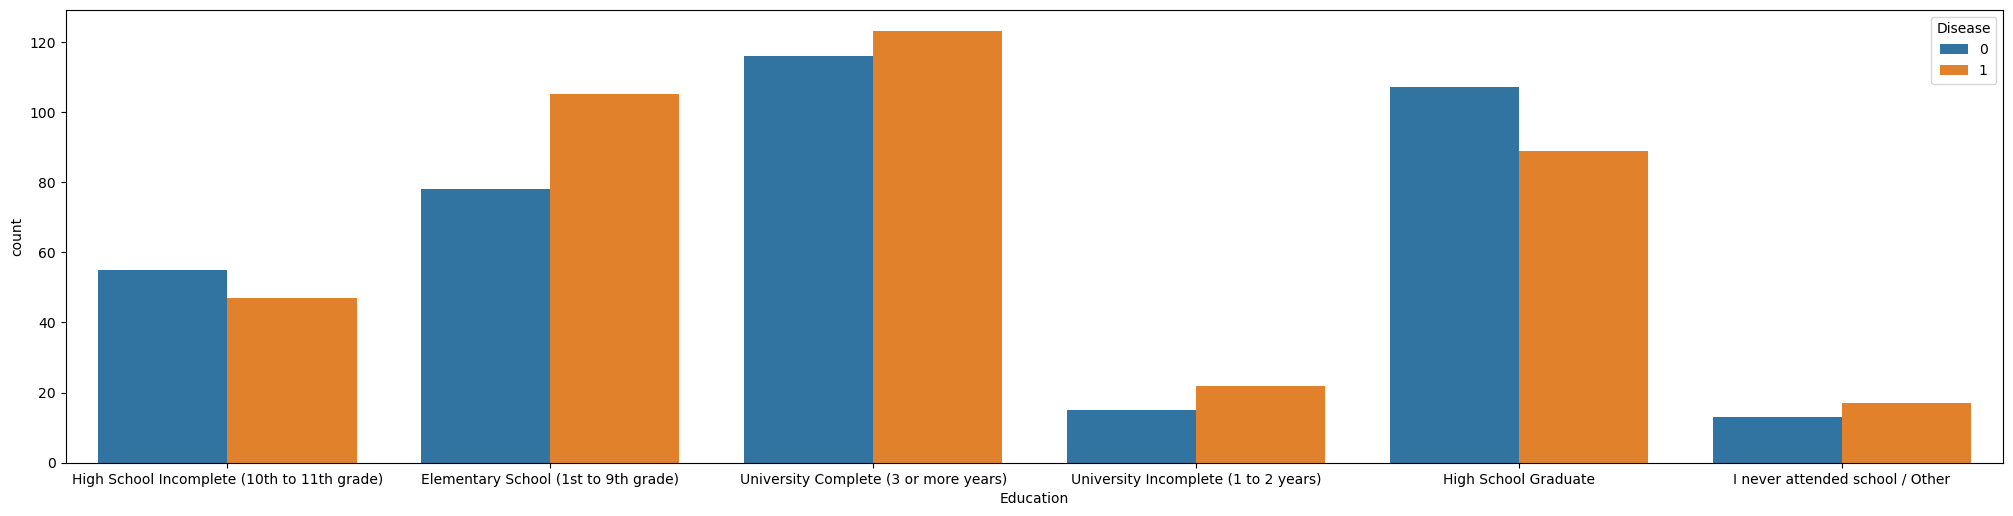

In [20]:
plt.figure(figsize=(25, 6), dpi=100)
sns.countplot(x = 'Education', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Education.png', dpi=100, bbox_inches='tight')
plt.show()

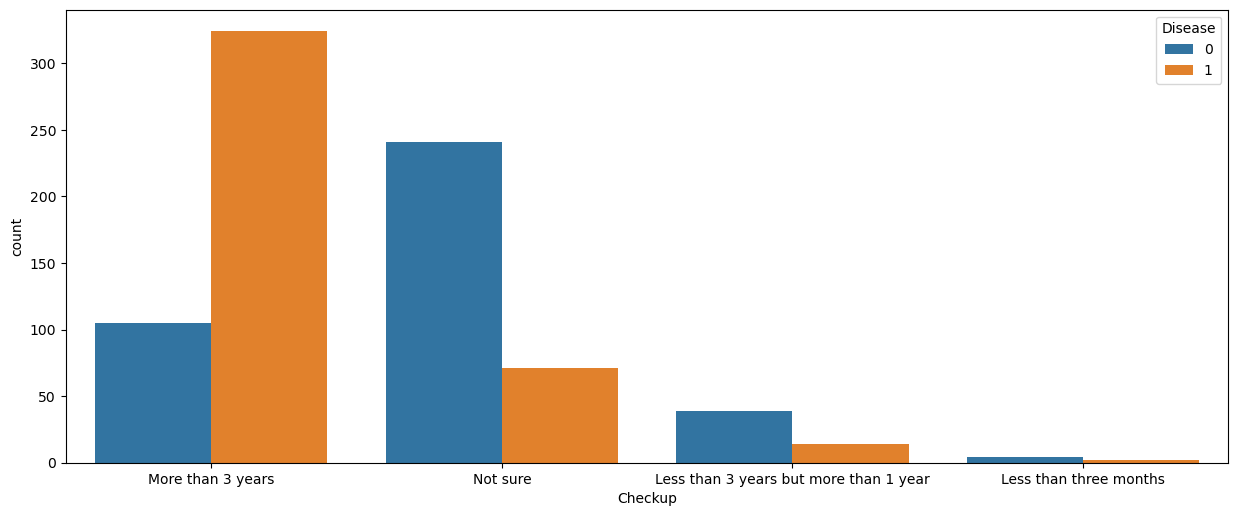

In [21]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Checkup', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Checkup.png', dpi=100, bbox_inches='tight')
plt.show()

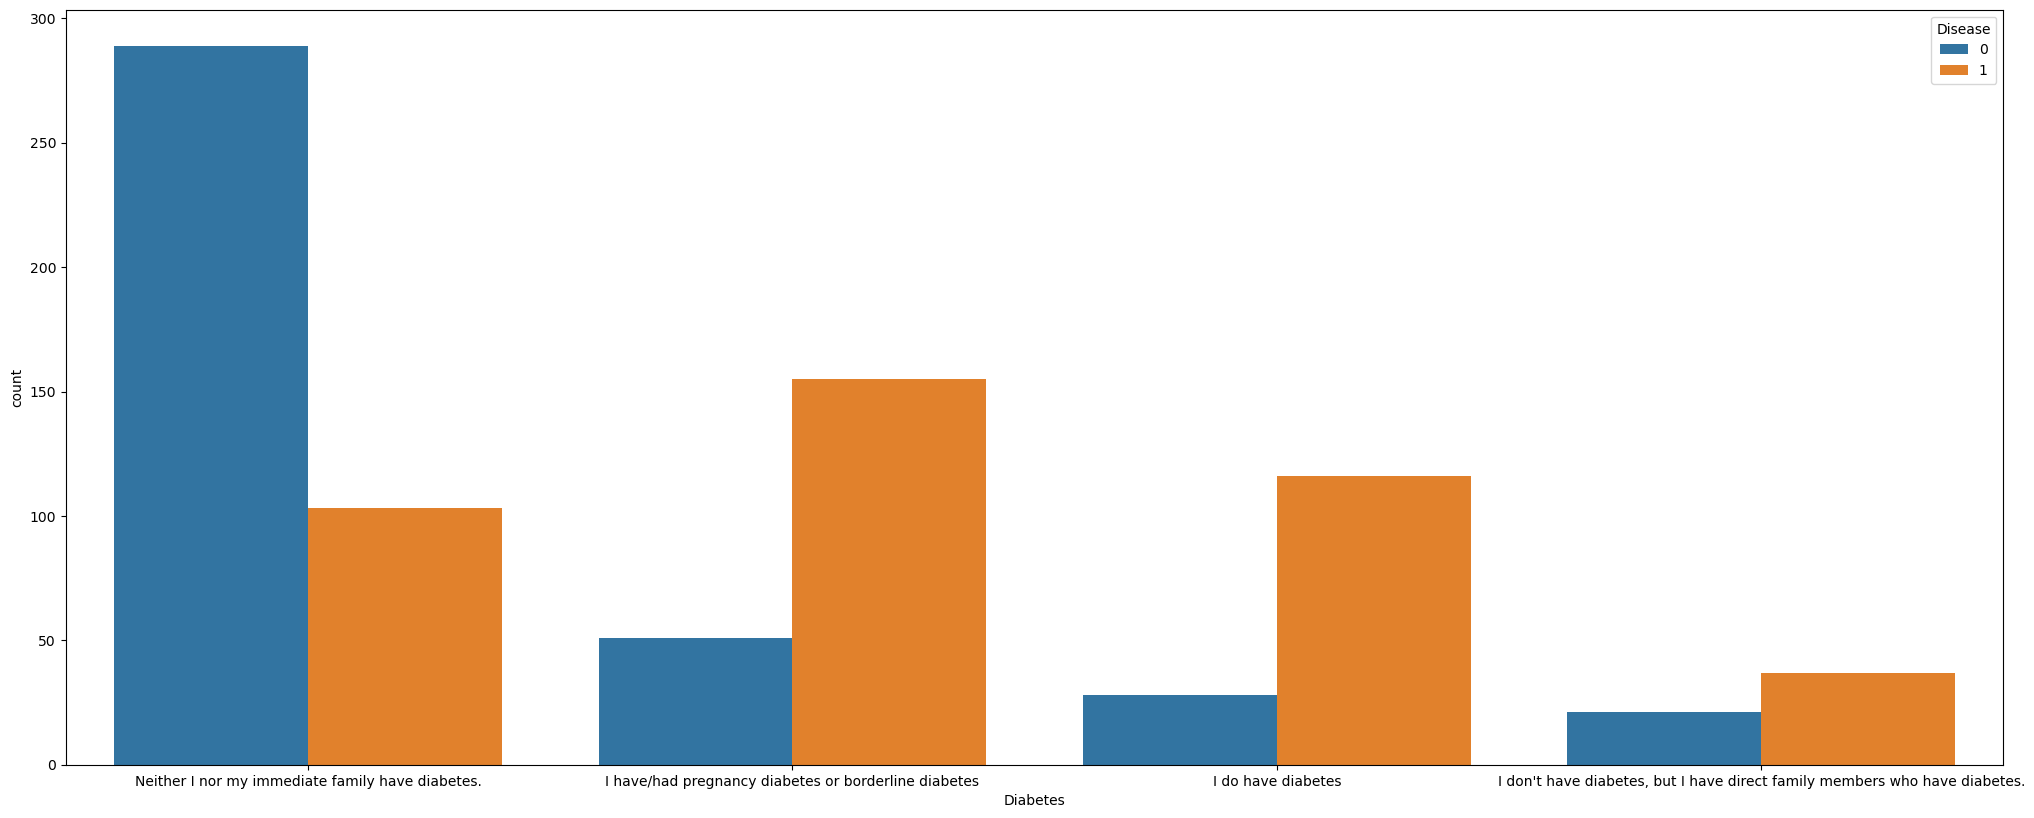

In [22]:
plt.figure(figsize=(25, 10), dpi=100)
sns.countplot(x = 'Diabetes', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Diabetes.png', dpi=100, bbox_inches='tight')
plt.show()

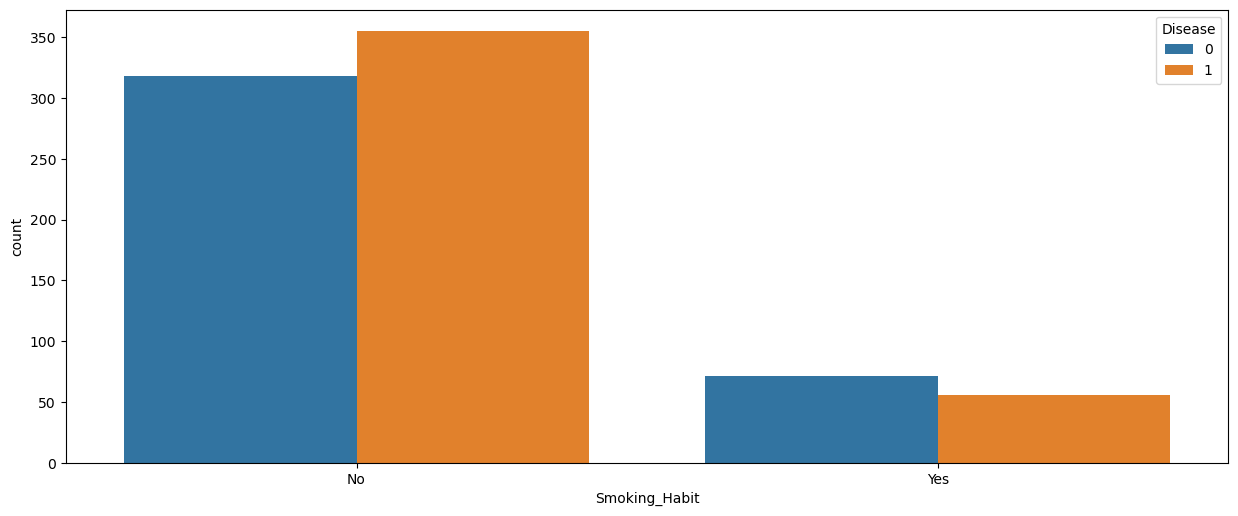

In [23]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Smoking_Habit', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Smoking_Habit.png', dpi=100, bbox_inches='tight')
plt.show()

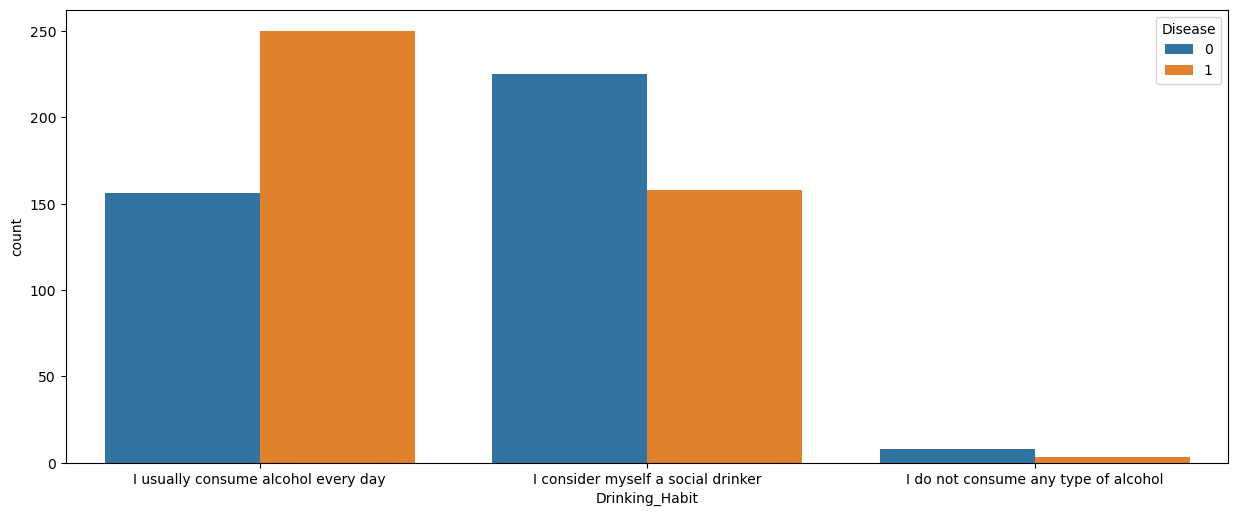

In [24]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Drinking_Habit', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Drinking_Habit.png', dpi=100, bbox_inches='tight')
plt.show()

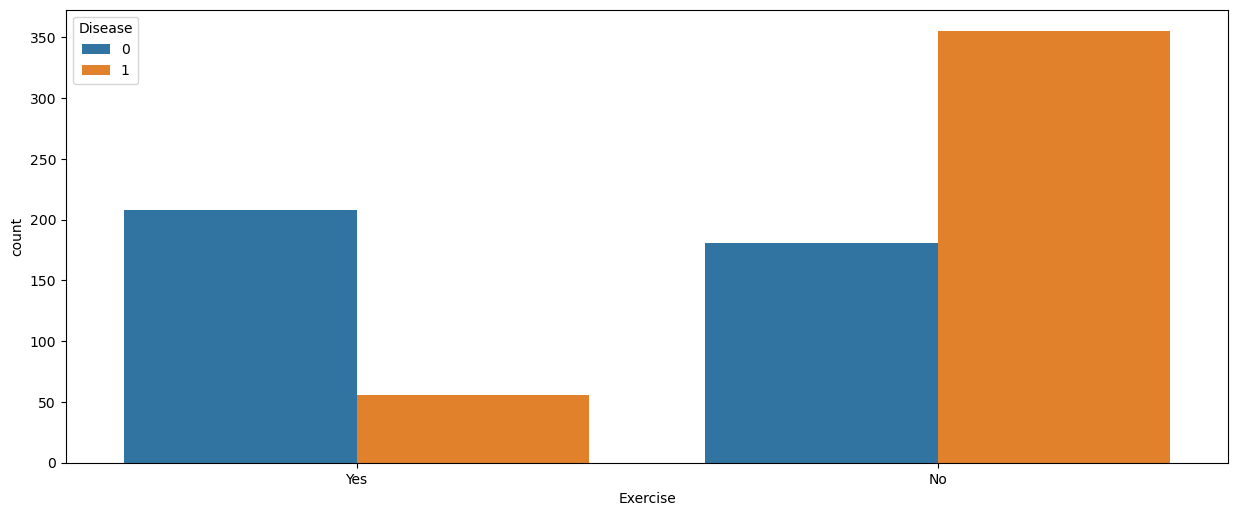

In [25]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Exercise', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Exercise.png', dpi=100, bbox_inches='tight')
plt.show()

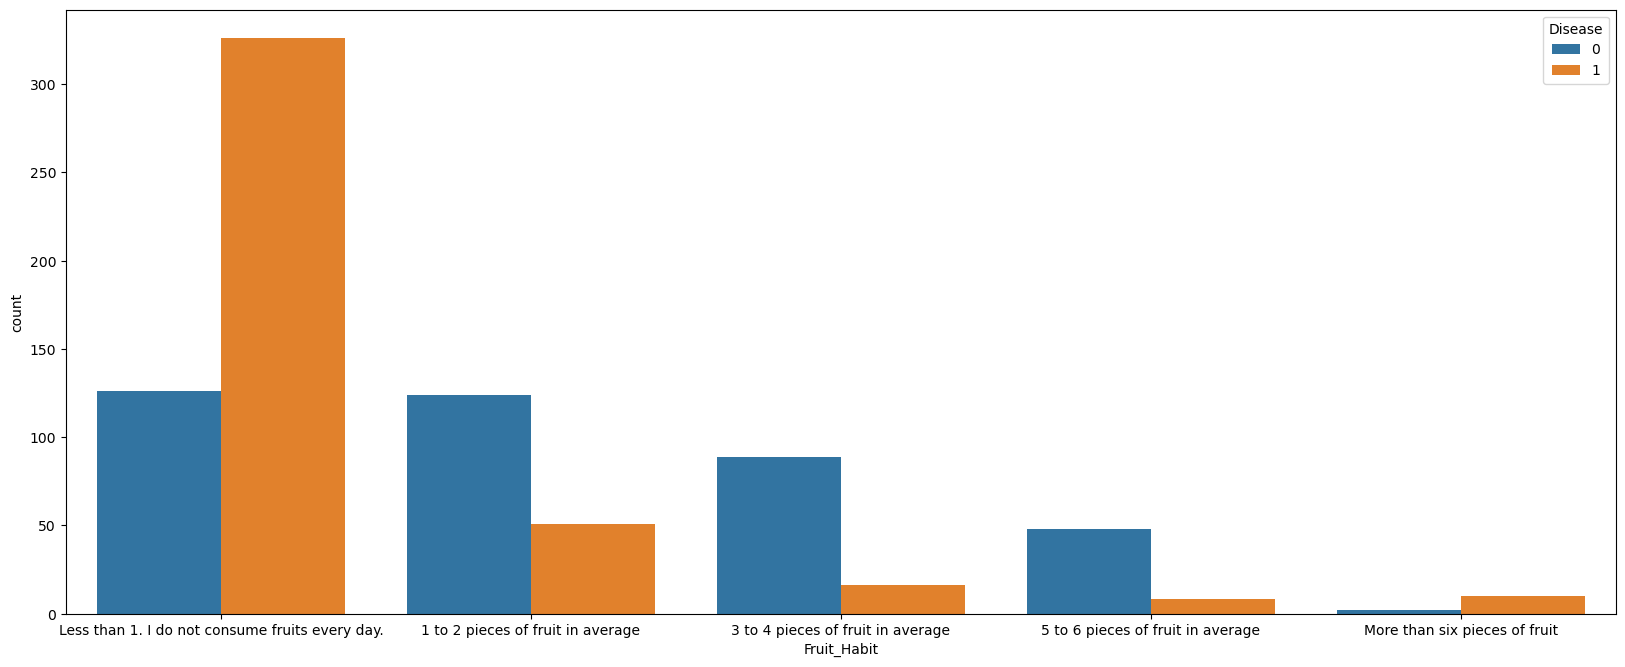

In [26]:
plt.figure(figsize=(20, 8), dpi=100)
sns.countplot(x = 'Fruit_Habit', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Fruit_Habit.png', dpi=100, bbox_inches='tight')
plt.show()

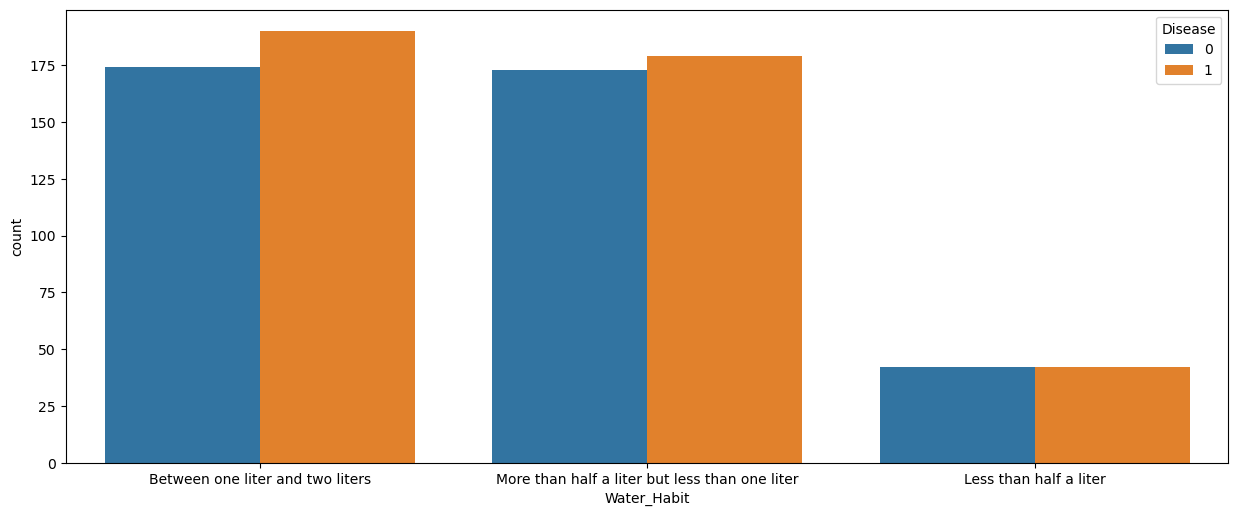

In [27]:
plt.figure(figsize=(15,6), dpi=100)
sns.countplot(x = 'Water_Habit', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Water_Habit.png', dpi=100, bbox_inches='tight')
plt.show()

### 1.4.2 Groups Creation and Interpretation for Numerical Variables

In [28]:
def Colesterol_categorise(df):
    train_patient['Cholesterol_Cat'] = pd.cut(train_patient.High_Cholesterol, bins = [0,200,240,float("inf")], labels = ['Desirable','Borderline High','High'])
    
Colesterol_categorise(train_patient)
train_patient['Cholesterol_Cat'].dtype

CategoricalDtype(categories=['Desirable', 'Borderline High', 'High'], ordered=True)

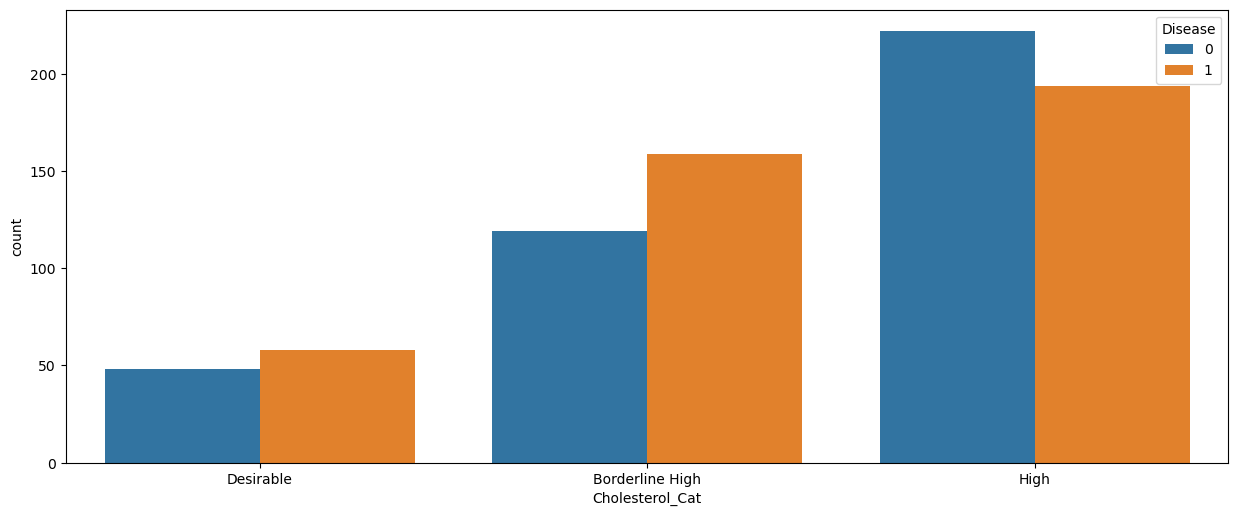

In [29]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Cholesterol_Cat", hue = "Disease", data = train_patient)
plt.show()

In [30]:
Cholesterol_Cat_counts = pd.DataFrame(train_patient['Cholesterol_Cat'].value_counts())
Cholesterol_Cat_counts['%'] = (train_patient["Cholesterol_Cat"].value_counts()/len(train_patient["Cholesterol_Cat"])*100).round(2)
Cholesterol_Cat_counts.style.set_caption("Cholesterol Categories")
Cholesterol_Cat_counts

Cholesterol_Cat      %
High                         416  52.00
Borderline High              278  34.75
Desirable                    106  13.25

In [31]:
train_patient.Mental_Health.describe()

count    800.000000
mean      17.345000
std        5.385139
min        0.000000
25%       13.000000
50%       18.000000
75%       21.000000
max       29.000000
Name: Mental_Health, dtype: float64

In [32]:
def Mental_Health_categorise(df):
    train_patient['Mental_Health_Cat'] = pd.qcut(train_patient.Mental_Health, q=4, labels = ['Good','Medium','Bad','Very bad'])
    
Mental_Health_categorise(train_patient)
train_patient['Mental_Health_Cat'].dtype

CategoricalDtype(categories=['Good', 'Medium', 'Bad', 'Very bad'], ordered=True)

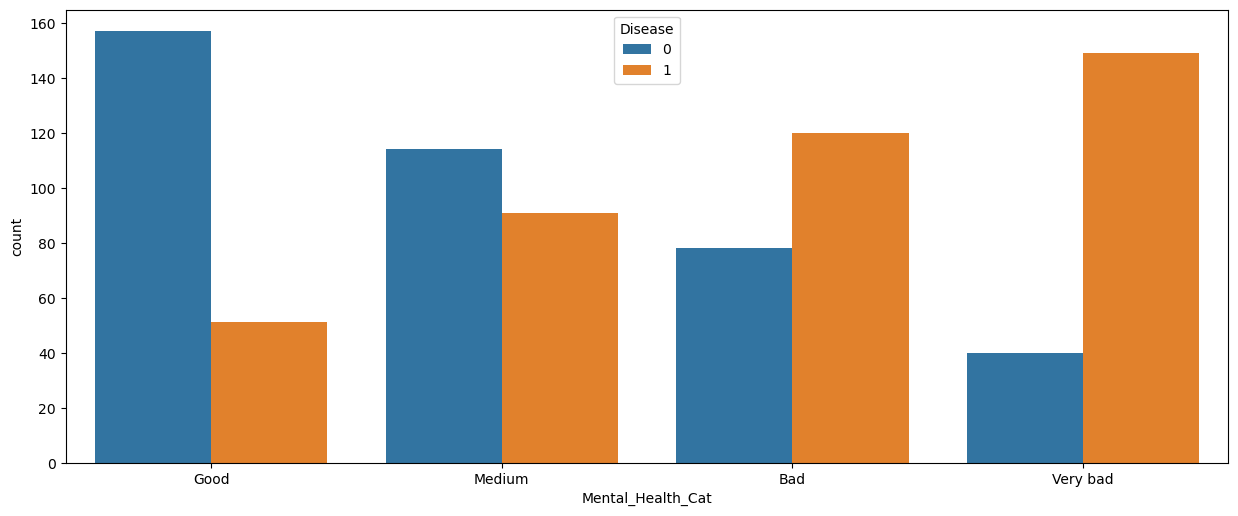

In [33]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Mental_Health_Cat", hue = "Disease", data = train_patient)
plt.show()

In [34]:
Mental_Health_Cat_counts = pd.DataFrame(train_patient['Mental_Health_Cat'].value_counts())
Mental_Health_Cat_counts['%'] = (train_patient["Mental_Health_Cat"].value_counts()/len(train_patient["Mental_Health_Cat"])*100).round(2)
Mental_Health_Cat_counts

Mental_Health_Cat      %
Good                    208  26.00
Medium                  205  25.62
Bad                     198  24.75
Very bad                189  23.62

In [35]:
train_patient.Physical_Health.describe()

count    800.000000
mean       4.558750
std        5.449189
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       30.000000
Name: Physical_Health, dtype: float64

<Figure size 2250x2250 with 0 Axes>

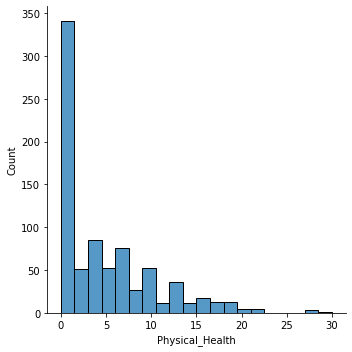

In [36]:
plt.figure(figsize=(15, 15), dpi=150)
sns.displot(train_patient, x="Physical_Health")

In [37]:
train_patient.Blood_Pressure.describe()

count    800.000000
mean     131.053750
std       17.052693
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Blood_Pressure, dtype: float64

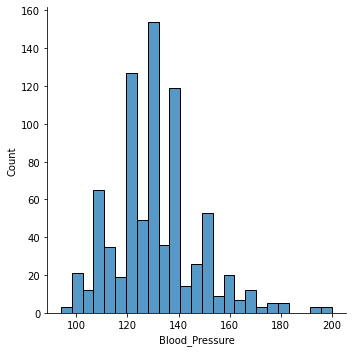

In [38]:
sns.displot(train_patient, x="Blood_Pressure")

In [39]:
def Blood_Pressure_categorise(df):
    train_patient['Blood_Pressure_Cat'] = pd.qcut(train_patient.Blood_Pressure, q=4, labels = ['Low',"Regular","High","Very High"])
    
Blood_Pressure_categorise(train_patient)
train_patient['Blood_Pressure_Cat'].dtype

CategoricalDtype(categories=['Low', 'Regular', 'High', 'Very High'], ordered=True)

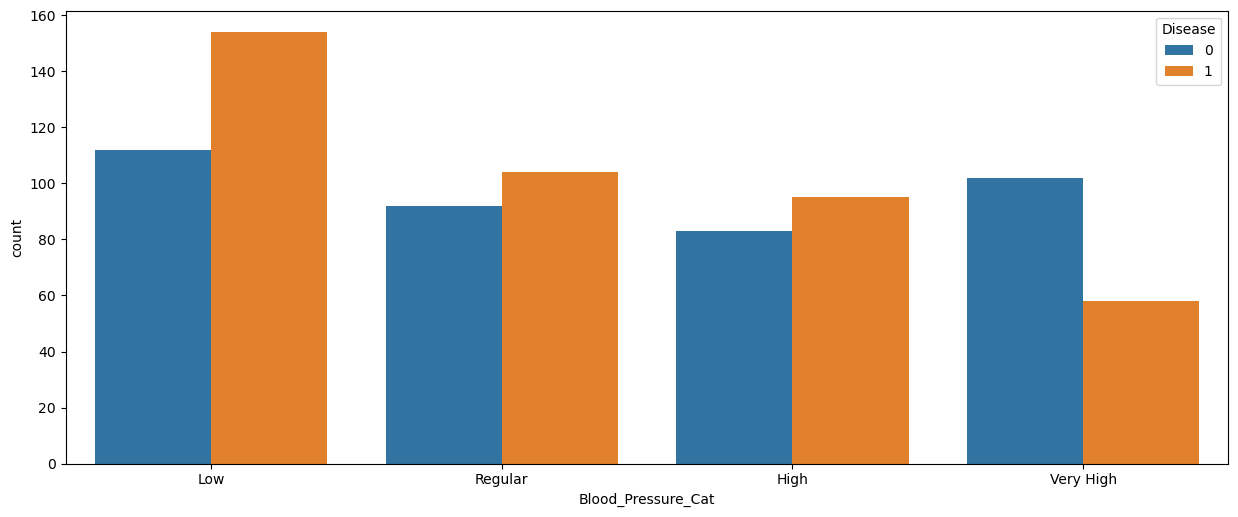

In [40]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Blood_Pressure_Cat", hue = "Disease", data = train_patient)
plt.show()

In [41]:
Blood_Pressure_Cat_counts = pd.DataFrame(train_patient['Blood_Pressure_Cat'].value_counts())
Blood_Pressure_Cat_counts['%'] = (train_patient["Blood_Pressure_Cat"].value_counts()/len(train_patient["Blood_Pressure_Cat"])*100).round(2)
Blood_Pressure_Cat_counts

Blood_Pressure_Cat      %
Low                       266  33.25
Regular                   196  24.50
High                      178  22.25
Very High                 160  20.00

## 2. Data Preprocessing

### 2.1 Coherence checking

Mental and Physical health variables refer only to the last 30 days, therefore none of them should have a value greater than 30 or smaller than 0.

In [42]:
print("The maximum number of days in which a person had mental difficulties was", train_patient["Mental_Health"].max(), "and the least number of days was", train_patient["Mental_Health"].min())

The maximum number of days in which a person had mental difficulties was 29 and the least number of days was 0


In [43]:
print("The maximum number of days in which a person had physical difficulties was", train_patient["Physical_Health"].max(), "and the least number of days was", train_patient["Physical_Health"].min())

The maximum number of days in which a person had physical difficulties was 30 and the least number of days was 0


In [44]:
train_patient["Region"].value_counts()

East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64

We can see that there is value were London is written in CAPS LOCK. This is something we must take care of.

In [45]:
train_patient.replace(to_replace="LONDON", value="London", inplace=True, limit=None)

In [46]:
train_patient["Region"].value_counts()

East Midlands               154
London                      141
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
Name: Region, dtype: int64

### 2.2 Feature Engineering

Creating a gender variable based on the prefix in the Name.

In [47]:
#Create variable Gender
gender = []

for elem in train_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

train_patient['Gender'] = gender

print(train_patient['Gender'])

PatientID
1167    F
1805    M
1557    M
1658    M
1544    M
       ..
1909    M
1386    F
1088    F
1662    M
1117    M
Name: Gender, Length: 800, dtype: object


Converting the Birth Year to Age by subtracting it to the current Year.

In [48]:
train_patient['Age'] = datetime.now().year - train_patient['Birth_Year'] 
print(train_patient['Age'])

PatientID
1167     57
1805     53
1557     48
1658     64
1544     54
       ... 
1909     50
1386     42
1088    162
1662     47
1117     43
Name: Age, Length: 800, dtype: int64


Creating a variable of Body Mass Index using the Weight and Height variables.

In [49]:
#Create variable BMI     
train_patient['BMI'] = (train_patient['Weight']/(train_patient['Height']**2)*10000).round(2)

print(train_patient['BMI'])

PatientID
1167    27.89
1805    29.40
1557    25.91
1658    20.37
1544    17.90
        ...  
1909    19.25
1386    24.75
1088    17.21
1662    27.55
1117    23.39
Name: BMI, Length: 800, dtype: float64


In [50]:
train_patient.BMI.describe()

count    800.000000
mean      24.039500
std        3.658627
min       16.980000
25%       20.830000
50%       24.380000
75%       27.145000
max       30.120000
Name: BMI, dtype: float64

In [51]:
def BMI_categorise(df):
     train_patient['BMI_Cat'] = pd.cut(train_patient.BMI, bins = [0,18.5,25,30,float("inf")], labels = ['Underweight','Healthy','Overweight','Obesity'])
                                                                                                               
BMI_categorise(train_patient)
train_patient['BMI_Cat'].dtype

CategoricalDtype(categories=['Underweight', 'Healthy', 'Overweight', 'Obesity'], ordered=True)

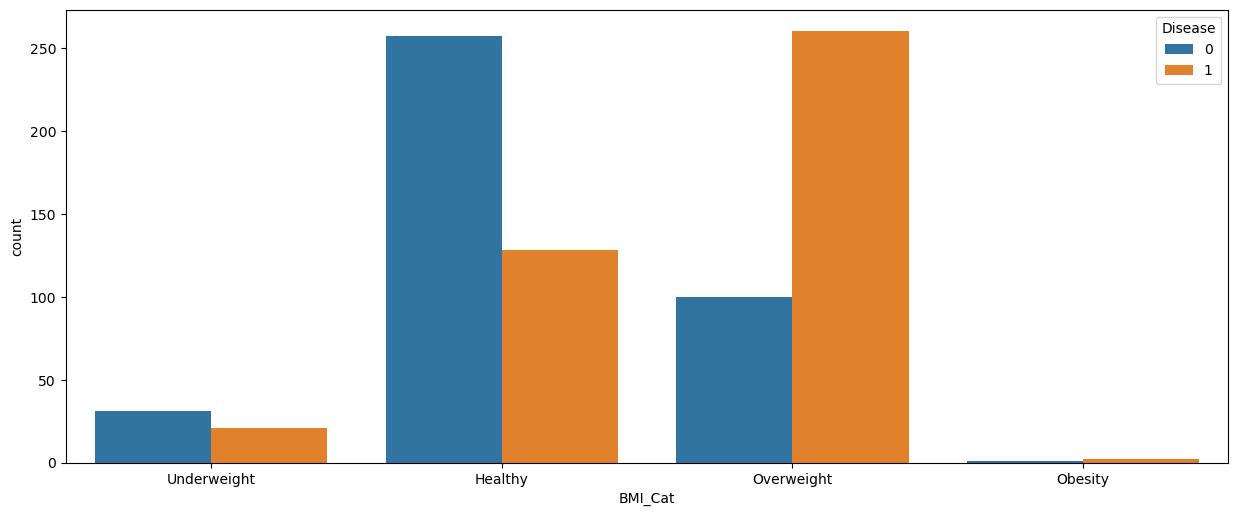

In [52]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "BMI_Cat", hue = "Disease", data = train_patient)
plt.show()

### 2.3 Treating Missing Values

As we have seen, the only variable which had missing values was Education. Since it is a categorical variable, we will now fill the missing values using the mode.

In [53]:
train_patient['Education'].fillna(train_patient['Education'].mode()[0], inplace=True)

Checking that we no longer have missing values.

In [54]:
train_patient.isna().sum()

Name                  0
Birth_Year            0
Region                0
Education             0
Disease               0
Height                0
Weight                0
High_Cholesterol      0
Blood_Pressure        0
Mental_Health         0
Physical_Health       0
Checkup               0
Diabetes              0
Smoking_Habit         0
Drinking_Habit        0
Exercise              0
Fruit_Habit           0
Water_Habit           0
Cholesterol_Cat       0
Mental_Health_Cat     0
Blood_Pressure_Cat    0
Gender                0
Age                   0
BMI                   0
BMI_Cat               0
dtype: int64

### 2.4 Outlier analysis

Modifying the previously created variable for all the numerical features by replacing Birth_Year by Age and removing the dependent variable.

In [55]:
train_patient_num.drop(["Birth_Year"],axis = 1, inplace=True)
train_patient_num["Age"] = train_patient['Age']
train_patient_num

Disease  Height  Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                              
1167             1     155      67               358             120   
1805             1     173      88               230             142   
1557             1     162      68               226             122   
1658             0     180      66               313             125   
1544             1     180      58               277             125   
...            ...     ...     ...               ...             ...   
1909             0     178      61               204             144   
1386             1     157      61               213             120   
1088             0     167      48               272             140   
1662             1     165      75               208             112   
1117             0     173      70               181             120   

           Mental_Health  Physical_Health  Age  
PatientID                                       
1167                  21                2   57  
1805                   9                0   53  
1557                  26                0   48  
1658                  13                8   64  
1544                  18                2   54  
...                  ...              ...  ...  
1909                  12                4   50  
1386                  23                0   42  
1088                  20               17  162  
1662                  16                0   47  
1117                  11               12   43  

[800 rows x 8 columns]

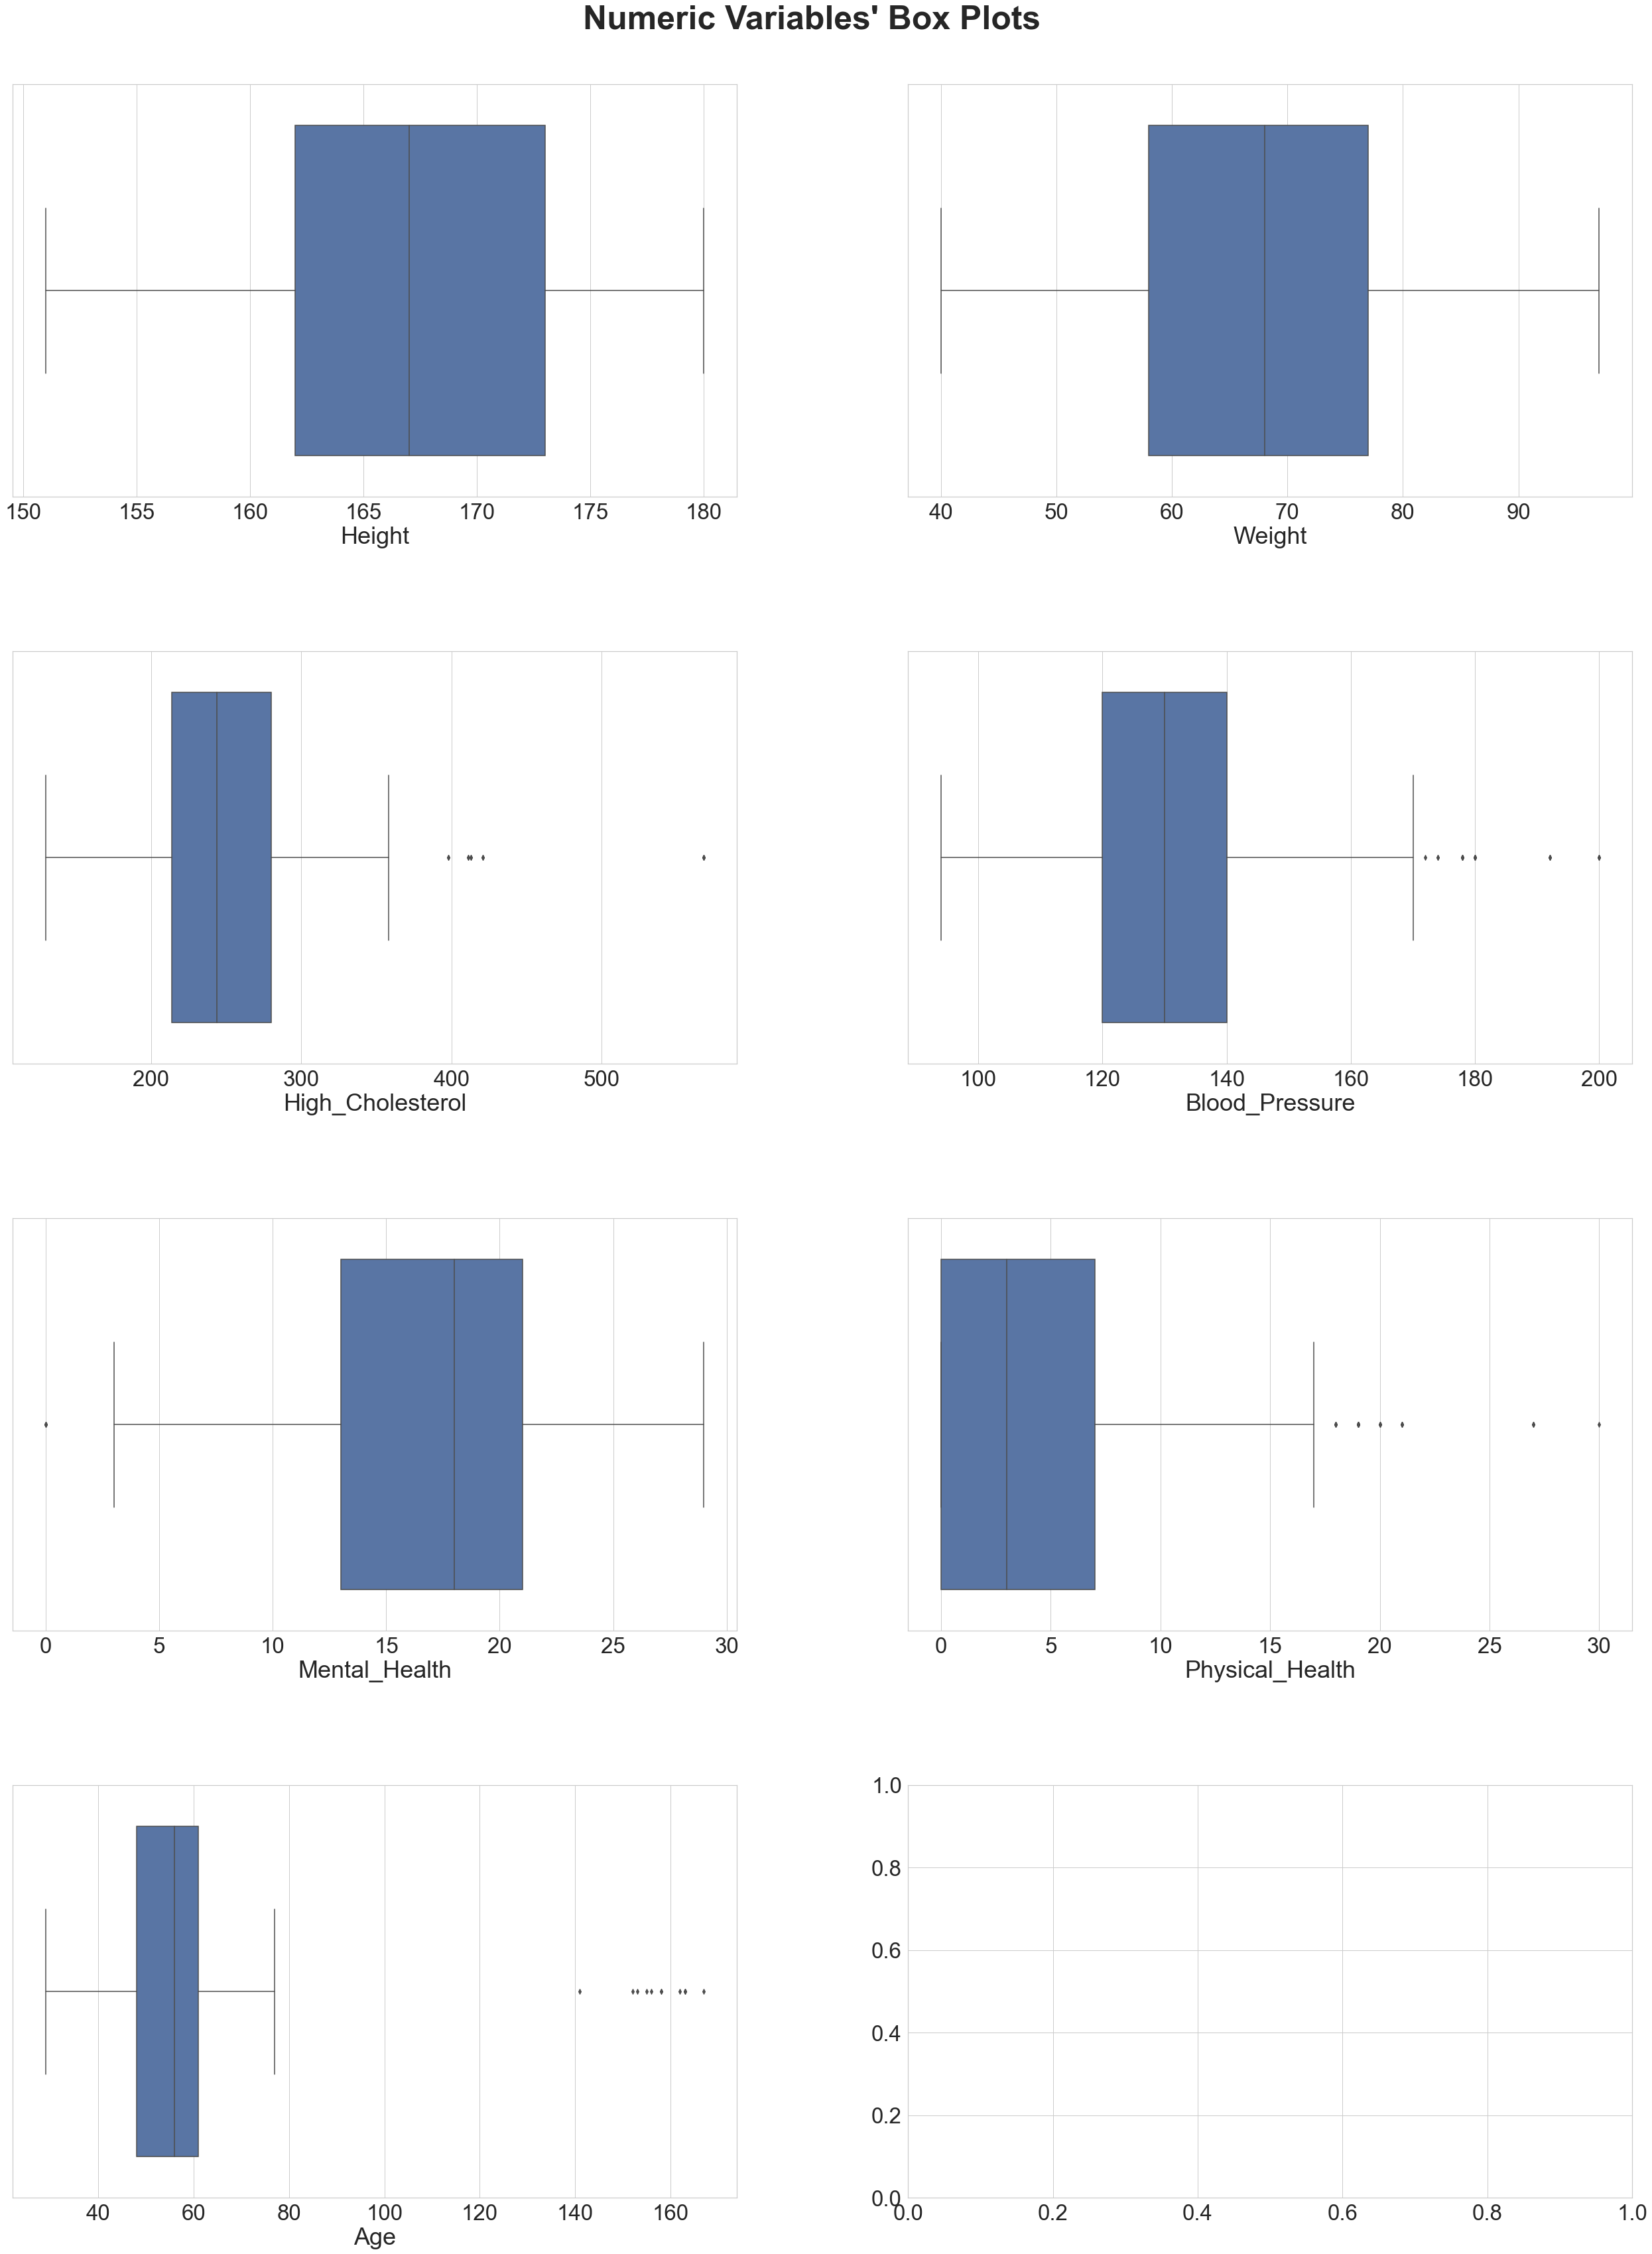

In [56]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(list(train_patient_num.columns.values)) / 5), figsize=(40, 50))
plt.tight_layout(pad=5)

# Plot data
for ax, feat in zip(axes.flatten(), list(train_patient_num.columns.values[1:])):
    sns.boxplot(x=train_patient[feat], 
                ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, fontsize=50, fontweight="bold")
plt.savefig('Figures/Numeric Variables Box Plots.png', dpi=100, bbox_inches='tight')
plt.show()

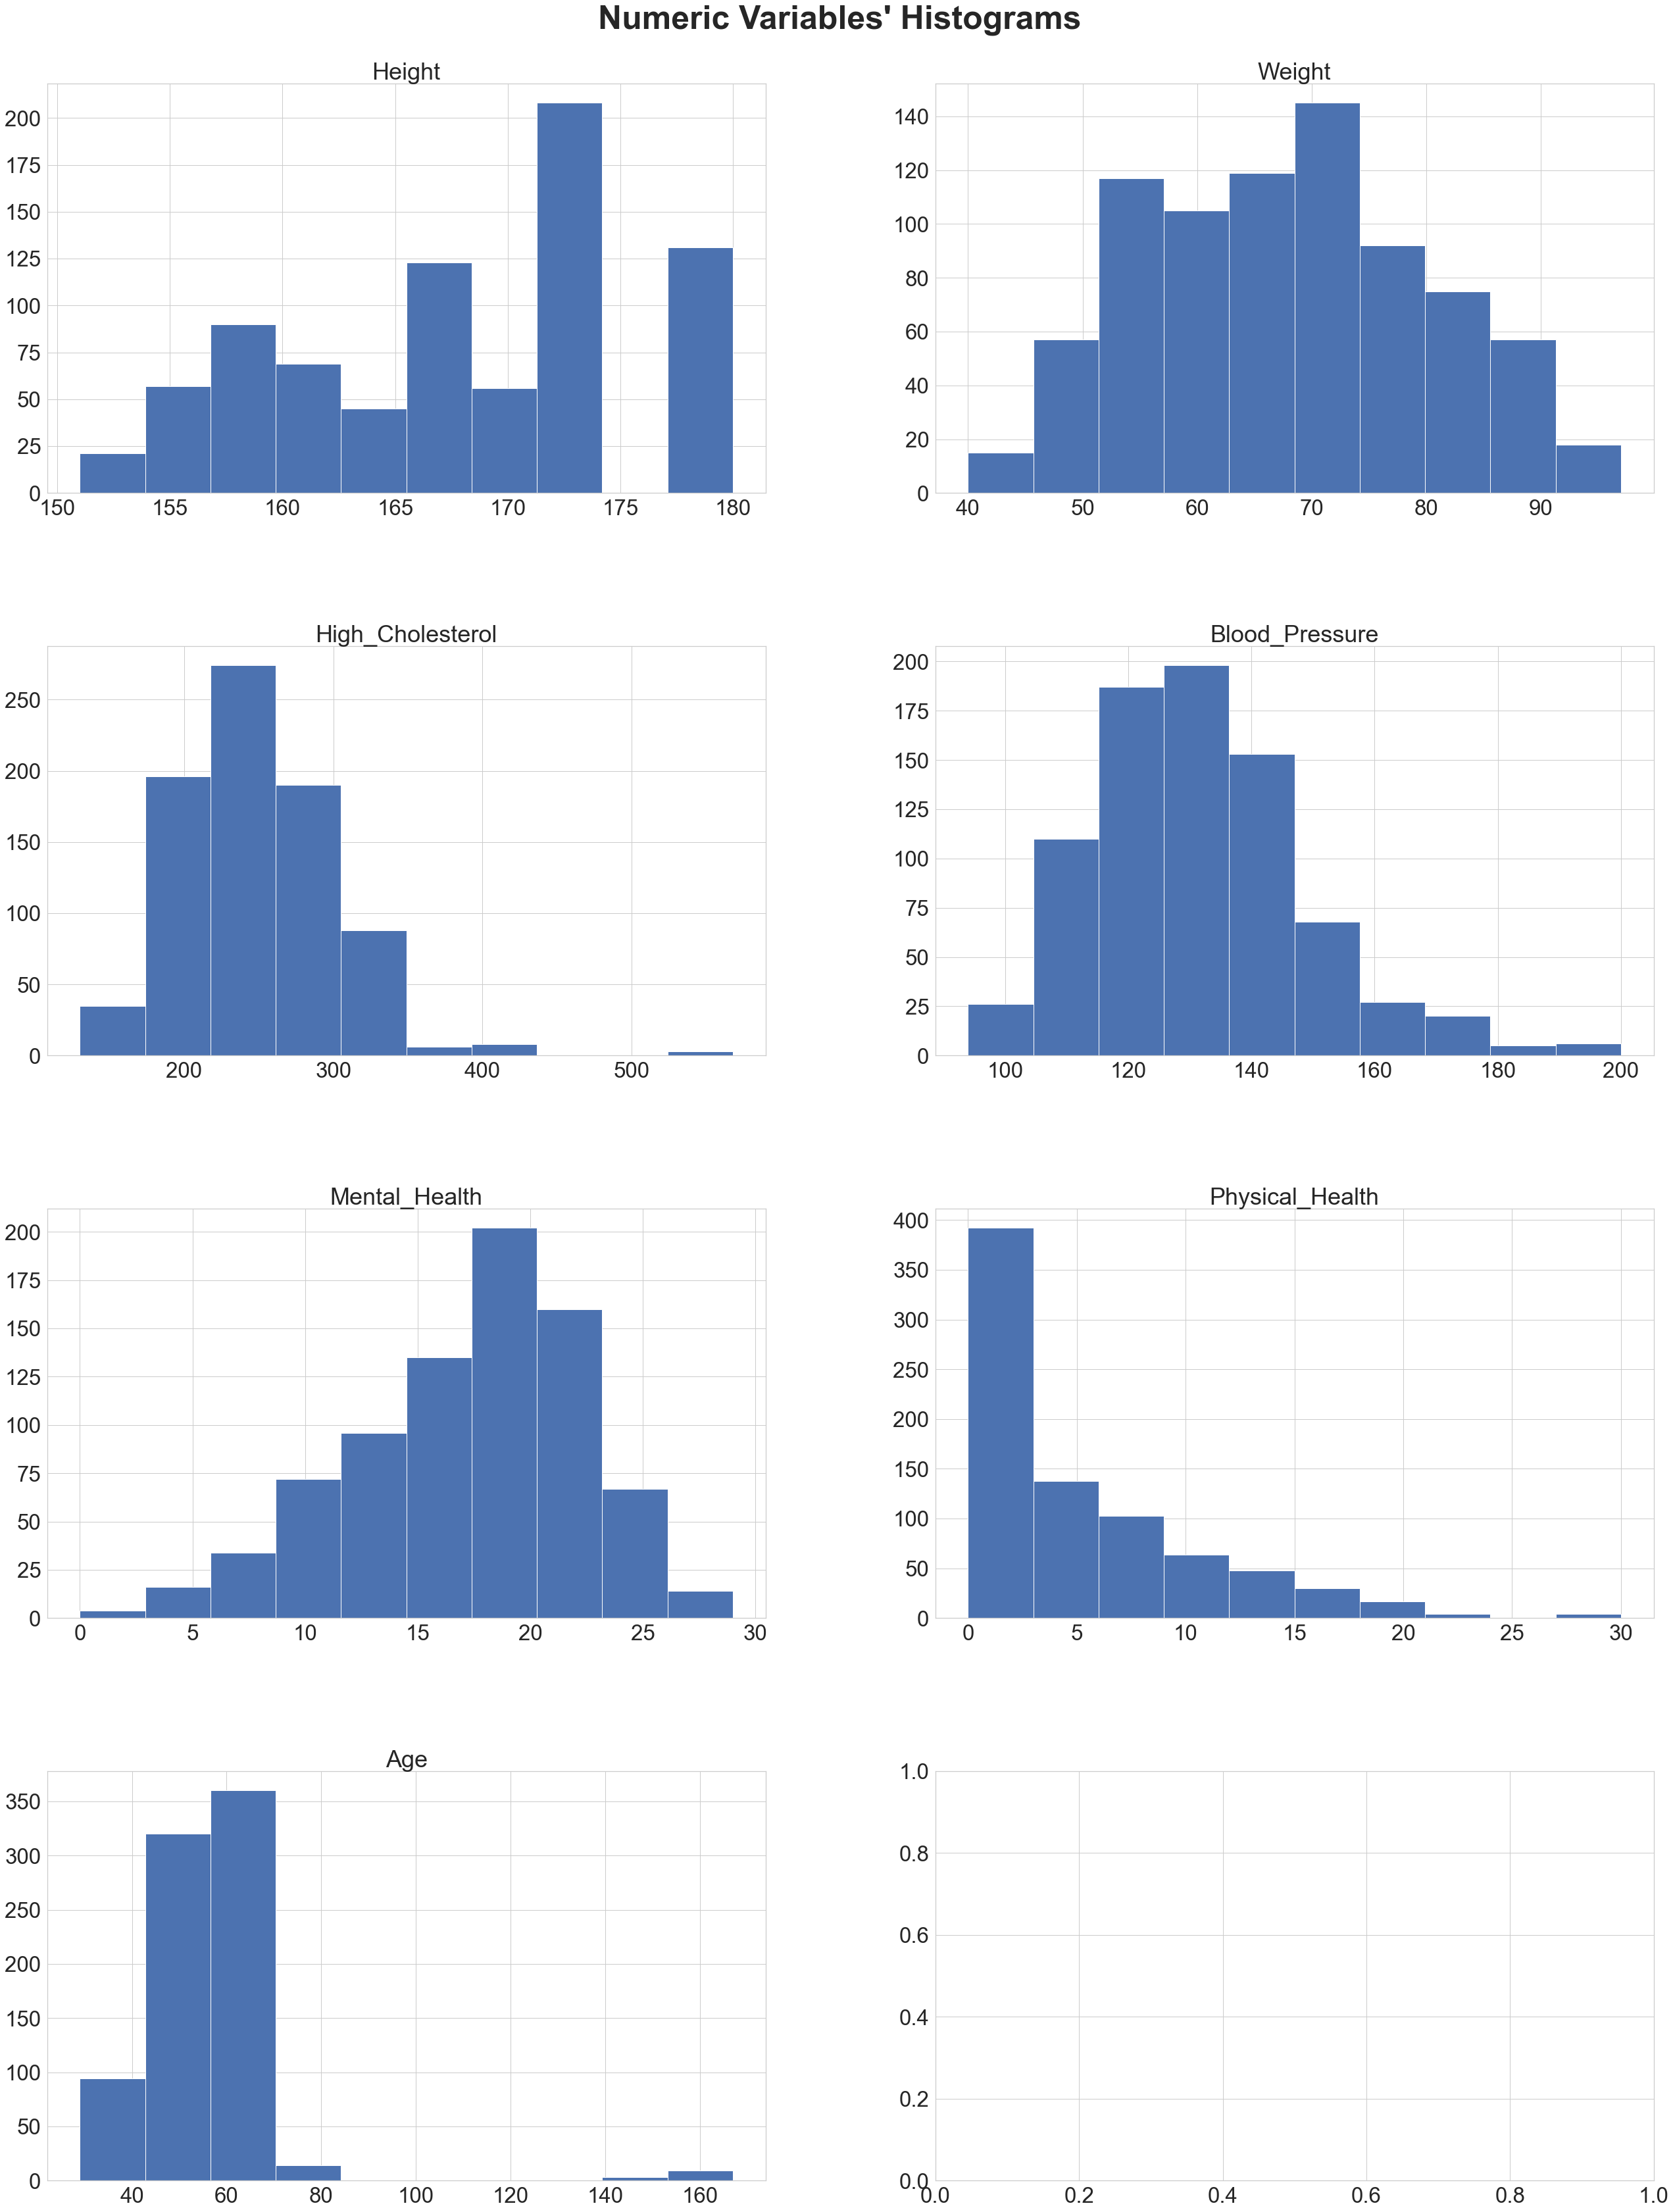

In [57]:
# All Numeric Variables' Histograms in one figure
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(list(train_patient_num.columns.values)) / 5), figsize=(40, 50))
plt.tight_layout(pad=5)

# Plot data
for ax, feat in zip(axes.flatten(),list(train_patient_num.columns.values[1:])):
    ax.hist(train_patient[feat])
    ax.set_title(feat)
       
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, fontsize=50, fontweight="bold")
plt.savefig('Figures/Numeric Variables Histograms.png', dpi=100, bbox_inches='tight')
plt.show()

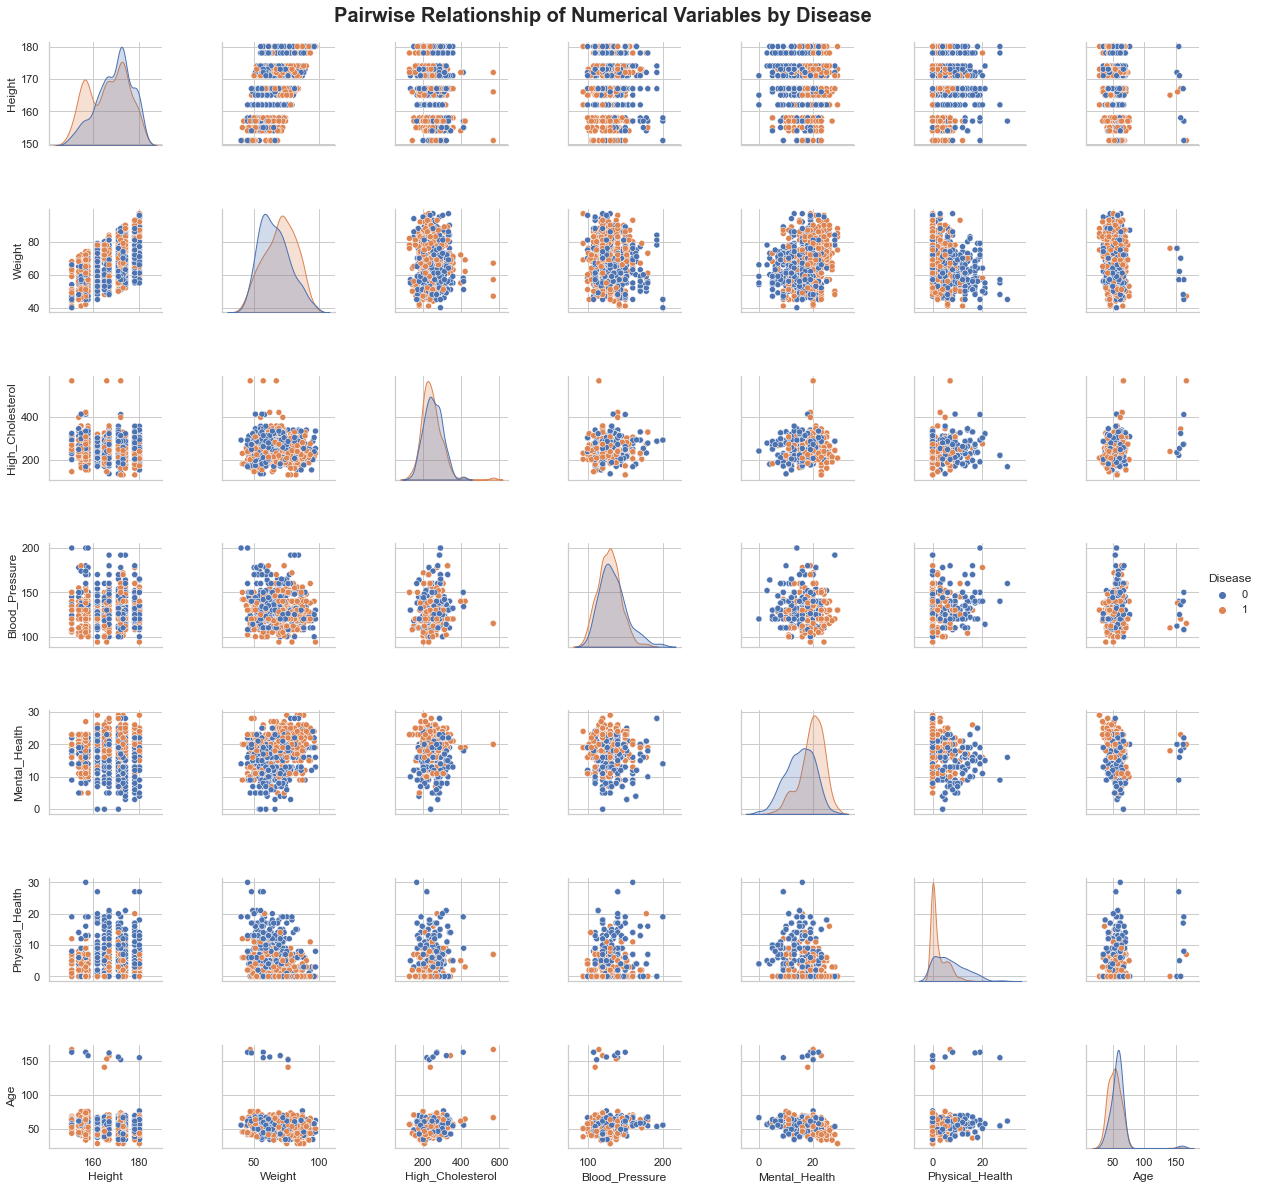

In [58]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

sns.pairplot(train_patient_num, hue="Disease")

plt.tight_layout(pad=5)
title = "Pairwise Relationship of Numerical Variables by Disease"

plt.suptitle(title, fontsize=20, fontweight="bold")
plt.savefig('Figures/Pairwise Relationship of Numerical Variables by Disease.png', dpi=100, bbox_inches='tight')
plt.show()

With the help of the box plots and the histograms we were able to find outliers in:
	
* High_Cholestrol
* Age

We will now test several methods to deal with these outliers and then apply the one we find the most suiting. But first, let's drop the variable Disease from the numerical variables list (we needed it for this last plot, but now it won't be necessary).

In [59]:
train_patient_num.drop(["Disease"],axis = 1, inplace=True)

### 2.4.1 Inter Quartile Range

In [60]:
iq = train_patient_num.copy()
Q1 = iq.quantile(0.25)  
Q3 = iq.quantile(0.75)
IQR = Q3 - Q1
IQR

Height              11.00
Weight              19.00
High_Cholesterol    66.25
Blood_Pressure      20.00
Mental_Health        8.00
Physical_Health      7.00
Age                 13.00
dtype: float64

In [61]:
iq = iq[~((iq < (Q1 - 1.5 * IQR)) |(iq > (Q3 + 1.5 * IQR))).any(axis=1)]

In [62]:
iq

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1167          155      67               358             120             21   
1805          173      88               230             142              9   
1557          162      68               226             122             26   
1658          180      66               313             125             13   
1544          180      58               277             125             18   
...           ...     ...               ...             ...            ...   
1912          173      74               202             120             13   
1909          178      61               204             144             12   
1386          157      61               213             120             23   
1662          165      75               208             112             16   
1117          173      70               181             120             11   

           Physical_Health  Age  
PatientID                        
1167                     2   57  
1805                     0   53  
1557                     0   48  
1658                     8   64  
1544                     2   54  
...                    ...  ...  
1912                     7   35  
1909                     4   50  
1386                     0   42  
1662                     0   47  
1117                    12   43  

[738 rows x 7 columns]

In [63]:
print("The percentage of data removed with this method is ", (1-(iq.shape[0] / train_patient_num.shape[0]))*100)

The percentage of data removed with this method is  7.750000000000002


### 2.4.2 Local Outlier Factor

In [64]:
lof_df = train_patient_num.copy()

In [65]:
# Consider 5 neighbors 
lof = LocalOutlierFactor(n_neighbors=3)

In [66]:
lof_pred=lof.fit_predict(lof_df[train_patient_num.columns])

In [67]:
outlier_index = lof_df[lof_pred == -1] # negative values are outliers
outlier_index

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1370          154      51               345             132             14   
1464          166      57               568             115             20   
1481          157      57               411             150             19   
1115          151      49               311             145             17   
1619          178      93               252             110             19   
1851          178      57               254             130             26   
1933          180      79               235             120             25   
1776          154      46               311             145             17   
1699          180      95               286             126             19   
1536          172      64               223             120             19   
1826          173      81               184             130             18   
1354          178      92               265             124             16   
1853          165      54               233             120             13   
1948          174      55               178             145             12   
1702          167      80               306             160             20   
1163          178      71               278             124             21   
1069          157      45               168             160             16   
1301          180      97               231              94             19   
1011          154      57               345             132             14   
1390          158      70               323             136             18   
1192          172      67               568             115             20   

           Physical_Health  Age  
PatientID                        
1370                    14   43  
1464                     7   67  
1481                    19  163  
1115                     4   61  
1619                     2   65  
1851                    16   37  
1933                    18   38  
1776                     4   61  
1699                     0   35  
1536                     7   50  
1826                     0   42  
1354                     1   57  
1853                    12   67  
1948                    12   70  
1702                     1   71  
1163                     2   48  
1069                    30   62  
1301                     0   51  
1011                    14   43  
1390                     0  158  
1192                     7   67

In [68]:
print("The percentage of data removed with this method is ", round((outlier_index.shape[0] / train_patient_num.shape[0])*100,2))

The percentage of data removed with this method is  2.62


In [69]:
outlier_index.describe()

Height     Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
count   21.000000  21.000000         21.000000       21.000000      21.000000   
mean   167.904762  67.476190        298.809524      130.142857      18.190476   
std     10.387034  16.942901        107.770413       16.511468       3.473025   
min    151.000000  45.000000        168.000000       94.000000      12.000000   
25%    157.000000  55.000000        233.000000      120.000000      16.000000   
50%    172.000000  64.000000        278.000000      130.000000      19.000000   
75%    178.000000  80.000000        323.000000      145.000000      20.000000   
max    180.000000  97.000000        568.000000      160.000000      26.000000   

       Physical_Health         Age  
count        21.000000   21.000000  
mean          8.095238   64.571429  
std           8.166424   33.946386  
min           0.000000   35.000000  
25%           1.000000   43.000000  
50%           7.000000   61.000000  
75%          14.000000   67.000000  
max          30.000000  163.000000

### 2.4.3 Z-Score

In [70]:
z_score = train_patient.copy()

In [71]:
z = np.abs(stats.zscore(z_score[train_patient_num.columns]))

In [72]:
z

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1167       1.606424  0.068355          2.108834        0.648617   
1805       0.651507  1.666337          0.374944        0.642309   
1557       0.728339  0.014249          0.452562        0.531260   
1658       1.529591  0.150959          1.235631        0.355225   
1544       1.529591  0.811794          0.537069        0.355225   
...             ...       ...               ...             ...   
1909       1.278710  0.563981          0.879461        0.759666   
1386       1.355542  0.563981          0.704821        0.648617   
1088       0.101136  1.637838          0.440046        0.524952   
1662       0.352018  0.592480          0.801843        1.118044   
1117       0.651507  0.179458          1.325765        0.648617   

           Mental_Health  Physical_Health       Age  
PatientID                                            
1167            0.679144         0.469859  0.067722  
1805            1.550604         0.837116  0.191812  
1557            1.608206         0.837116  0.516230  
1658            0.807355         0.631911  0.521907  
1544            0.121707         0.469859  0.126928  
...                  ...              ...       ...  
1909            0.993167         0.102602  0.386463  
1386            1.050769         0.837116  0.905531  
1088            0.493332         2.284566  6.880494  
1662            0.249918         0.837116  0.581113  
1117            1.178980         1.366424  0.840647  

[800 rows x 7 columns]

In [73]:
np.where(z > 3)

(array([ 18,  22,  35,  61,  61,  89,  93, 103, 177, 194, 198, 312, 312,
        341, 460, 473, 481, 493, 503, 511, 542, 566, 566, 585, 586, 588,
        593, 617, 640, 648, 695, 705, 710, 720, 729, 754, 757, 761, 797],
       dtype=int64),
 array([6, 2, 3, 2, 6, 5, 6, 2, 4, 4, 6, 2, 6, 4, 5, 2, 4, 6, 3, 5, 5, 5,
        6, 3, 2, 5, 6, 3, 6, 6, 5, 6, 3, 2, 2, 5, 2, 3, 6], dtype=int64))

In [74]:
# Remove the observations 3 standard deviations above the mean
z_score = z_score[(z < 3).all(axis=1)]

In [75]:
print("The percentage of data removed with this method is ",(1 - (z_score.shape[0] / train_patient.shape[0]))*100)

The percentage of data removed with this method is  4.5000000000000036


In [76]:
z_score.describe()

Birth_Year     Disease      Height      Weight  High_Cholesterol  \
count   764.000000  764.000000  764.000000  764.000000        764.000000   
mean   1967.768325    0.527487  167.969895   68.260471        246.066754   
std       9.034374    0.499571    7.949242   11.961667         45.655350   
min    1945.000000    0.000000  151.000000   41.000000        130.000000   
25%    1961.000000    0.000000  162.000000   59.000000        212.000000   
50%    1966.000000    1.000000  171.000000   68.000000        243.000000   
75%    1975.000000    1.000000  174.000000   77.000000        278.000000   
max    1993.000000    1.000000  180.000000   97.000000        398.000000   

       Blood_Pressure  Mental_Health  Physical_Health         Age         BMI  
count      764.000000     764.000000       764.000000  764.000000  764.000000  
mean       130.708115      17.403141         4.264398   54.231675   24.151152  
std         16.201140       5.274364         4.986034    9.034374    3.613581  
min         94.000000       3.000000         0.000000   29.000000   16.980000  
25%        120.000000      13.000000         0.000000   47.000000   21.080000  
50%        130.000000      18.000000         2.000000   56.000000   24.560000  
75%        140.000000      21.000000         7.000000   61.000000   27.182500  
max        180.000000      29.000000        20.000000   77.000000   30.120000

In [77]:
train_patient = z_score.copy()

### 2.5 Encoding and Split

Let's now look at our dataframe's columns at this point and see which ones are no longer necessary.

In [78]:
train_patient.columns

Index(['Name', 'Birth_Year', 'Region', 'Education', 'Disease', 'Height',
       'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health',
       'Physical_Health', 'Checkup', 'Diabetes', 'Smoking_Habit',
       'Drinking_Habit', 'Exercise', 'Fruit_Habit', 'Water_Habit',
       'Cholesterol_Cat', 'Mental_Health_Cat', 'Blood_Pressure_Cat', 'Gender',
       'Age', 'BMI', 'BMI_Cat'],
      dtype='object')

In [79]:
train_patient.drop(["Birth_Year","Name", "Cholesterol_Cat","Mental_Health_Cat", "Blood_Pressure_Cat", "BMI_Cat" ],axis = 1, inplace=True)

In [80]:
X = train_patient.drop('Disease', axis = 1)
y = train_patient['Disease']

In [81]:
train_patient = pd.get_dummies(X, drop_first=True)

In [82]:
train_patient

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1167          155      67               358             120             21   
1805          173      88               230             142              9   
1557          162      68               226             122             26   
1658          180      66               313             125             13   
1544          180      58               277             125             18   
...           ...     ...               ...             ...            ...   
1912          173      74               202             120             13   
1909          178      61               204             144             12   
1386          157      61               213             120             23   
1662          165      75               208             112             16   
1117          173      70               181             120             11   

           Physical_Health  Age    BMI  Region_East of England  Region_London  \
PatientID                                                                       
1167                     2   57  27.89                       0              1   
1805                     0   53  29.40                       0              0   
1557                     0   48  25.91                       0              0   
1658                     8   64  20.37                       0              1   
1544                     2   54  17.90                       0              0   
...                    ...  ...    ...                     ...            ...   
1912                     7   35  24.73                       0              0   
1909                     4   50  19.25                       0              0   
1386                     0   42  24.75                       0              0   
1662                     0   47  27.55                       1              0   
1117                    12   43  23.39                       0              1   

           ...  Drinking_Habit_I do not consume any type of alcohol  \
PatientID  ...                                                        
1167       ...                                                  0     
1805       ...                                                  0     
1557       ...                                                  0     
1658       ...                                                  0     
1544       ...                                                  0     
...        ...                                                ...     
1912       ...                                                  0     
1909       ...                                                  0     
1386       ...                                                  0     
1662       ...                                                  0     
1117       ...                                                  0     

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1167                                                       1              1   
1805                                                       0              1   
1557                                                       0              0   
1658                                                       1              1   
1544                                                       0              0   
...                                                      ...            ...   
1912                                                       1              1   
1909                                                       0              1   
1386                                                       1              0   
1662                                                       1              0   
1117                                                       0          

In [83]:
train_patient.columns

Index(['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure',
       'Mental_Health', 'Physical_Health', 'Age', 'BMI',
       'Region_East of England', 'Region_London', 'Region_North East',
       'Region_North West', 'Region_South East', 'Region_South West',
       'Region_West Midlands', 'Region_Yorkshire and the Humber',
       'Education_High School Graduate',
       'Education_High School Incomplete (10th to 11th grade)',
       'Education_I never attended school / Other',
       'Education_University Complete (3 or more years)',
       'Education_University Incomplete (1 to 2 years)',
       'Checkup_Less than three months', 'Checkup_More than 3 years',
       'Checkup_Not sure',
       'Diabetes_I don't have diabetes, but I have direct family members who have diabetes.',
       'Diabetes_I have/had pregnancy diabetes or borderline diabetes',
       'Diabetes_Neither I nor my immediate family have diabetes.',
       'Smoking_Habit_Yes',
       'Drinking_Habit_I do not consume 

In [84]:
X_train, X_val, y_train, y_val = train_test_split(train_patient, y,
                                                 test_size = 0.2,
                                                 shuffle = True,
                                                 random_state = 15,
                                                 stratify = y)

In [85]:
print('Training Data')
print(y_train.value_counts()/len(y_train))
print('Validation Data')
print(y_val.value_counts()/len(y_val))

Training Data
1    0.527005
0    0.472995
Name: Disease, dtype: float64
Validation Data
1    0.529412
0    0.470588
Name: Disease, dtype: float64


### 2.6 Scaling

Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a Robust Scaler.

In [86]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [87]:
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled.head(3)

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1046       1.000000  0.357143          0.287313        0.476744   
1140       0.793103  0.446429          0.552239        0.674419   
1859       0.551724  0.517857          0.645522        0.534884   

           Mental_Health  Physical_Health       Age       BMI  \
PatientID                                                       
1046            0.384615             0.00  0.250000  0.141006   
1140            0.000000             0.25  0.583333  0.367378   
1859            0.769231             0.35  0.458333  0.618902   

           Region_East of England  Region_London  ...  \
PatientID                                         ...   
1046                          0.0            0.0  ...   
1140                          0.0            0.0  ...   
1859                          0.0            1.0  ...   

           Drinking_Habit_I do not consume any type of alcohol  \
PatientID                                                        
1046                                                     0.0     
1140                                                     0.0     
1859                                                     0.0     

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1046                                                     1.0            0.0   
1140                                                     1.0            1.0   
1859                                                     1.0            1.0   

           Fruit_Habit_3 to 4 pieces of fruit in average  \
PatientID                                                  
1046                                                 0.0   
1140                                                 0.0   
1859                                                 0.0   

           Fruit_Habit_5 to 6 pieces of fruit in average  \
PatientID                                                  
1046                                                 0.0   
1140                                                 0.0   
1859                                                 0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1046                                                     1.0             
1140                                                     0.0             
1859                                                     1.0             

           Fruit_Habit_More than six pieces of fruit  \
PatientID                                              
1046                                             0.0   
1140                                             0.0   
1859                                             0.0   

           Water_Habit_Less than half a liter  \
PatientID                                       
1046                                      0.0   
1140                                      1.0   
1859                                      0.0   

           Water_Habit_More than half a liter but less than one liter  \
PatientID                                                               
1046                                                     1.0            
1140                                                     0.0            
1859                                                     1.0            

           Gender_M  
PatientID            
1046            1.0  
1140            1.0  
1859            1.0  

[3 rows x 38 columns]

In [88]:
X_val_num_scaled = scaler.transform(X_val_num) # this will return an array
# Convert the array to a pandas dataframe
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1401       0.241379  0.160714          0.085821        0.209302   
1789       0.689655  0.535714          0.578358        0.302326   
1576       1.000000  0.696429          0.641791        0.674419   

           Mental_Health  Physical_Health       Age       BMI  \
PatientID                                                       
1401            0.346154             0.35  0.875000  0.232470   
1789            0.153846             0.30  0.687500  0.556402   
1576            0.807692             0.25  0.479167  0.587652   

           Region_East of England  Region_London  ...  \
PatientID                                         ...   
1401                          0.0            1.0  ...   
1789                          0.0            0.0  ...   
1576                          0.0            1.0  ...   

           Drinking_Habit_I do not consume any type of alcohol  \
PatientID                                                        
1401                                                     0.0     
1789                                                     0.0     
1576                                                     0.0     

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1401                                                     1.0            0.0   
1789                                                     0.0            0.0   
1576                                                     1.0            0.0   

           Fruit_Habit_3 to 4 pieces of fruit in average  \
PatientID                                                  
1401                                                 0.0   
1789                                                 0.0   
1576                                                 0.0   

           Fruit_Habit_5 to 6 pieces of fruit in average  \
PatientID                                                  
1401                                                 0.0   
1789                                                 0.0   
1576                                                 0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1401                                                     1.0             
1789                                                     0.0             
1576                                                     1.0             

           Fruit_Habit_More than six pieces of fruit  \
PatientID                                              
1401                                             0.0   
1789                                             0.0   
1576                                             0.0   

           Water_Habit_Less than half a liter  \
PatientID                                       
1401                                      0.0   
1789                                      0.0   
1576                                      0.0   

           Water_Habit_More than half a liter but less than one liter  \
PatientID                                                               
1401                                                     1.0            
1789                                                     1.0            
1576                                                     0.0            

           Gender_M  
PatientID            
1401            0.0  
1789            1.0  
1576            1.0  

[3 rows x 38 columns]

### 2.7 Feature Selection

### 2.7.1 Spearman Correlation

In [89]:
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1046       1.000000  0.357143          0.287313        0.476744   
1140       0.793103  0.446429          0.552239        0.674419   
1859       0.551724  0.517857          0.645522        0.534884   
1297       1.000000  0.857143          0.537313        0.651163   
1027       0.000000  0.446429          0.720149        0.488372   

           Mental_Health  Physical_Health       Age       BMI  \
PatientID                                                       
1046            0.384615             0.00  0.250000  0.141006   
1140            0.000000             0.25  0.583333  0.367378   
1859            0.769231             0.35  0.458333  0.618902   
1297            0.230769             0.15  0.604167  0.799543   
1027            0.576923             0.00  0.604167  0.912348   

           Region_East of England  Region_London  ...  \
PatientID                                         ...   
1046                          0.0            0.0  ...   
1140                          0.0            0.0  ...   
1859                          0.0            1.0  ...   
1297                          1.0            0.0  ...   
1027                          0.0            1.0  ...   

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1046                                                     1.0            0.0   
1140                                                     1.0            1.0   
1859                                                     1.0            1.0   
1297                                                     0.0            1.0   
1027                                                     0.0            0.0   

           Fruit_Habit_3 to 4 pieces of fruit in average  \
PatientID                                                  
1046                                                 0.0   
1140                                                 0.0   
1859                                                 0.0   
1297                                                 0.0   
1027                                                 1.0   

           Fruit_Habit_5 to 6 pieces of fruit in average  \
PatientID                                                  
1046                                                 0.0   
1140                                                 0.0   
1859                                                 0.0   
1297                                                 0.0   
1027                                                 0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1046                                                     1.0             
1140                                                     0.0             
1859                                                     1.0             
1297                                                     1.0             
1027                                                     0.0             

           Fruit_Habit_More than six pieces of fruit  \
PatientID                                              
1046                                             0.0   
1140                                             0.0   
1859                                             0.0   
1297                                             0.0   
1027                                             0.0   

           Water_Habit_Less than half a liter  \
PatientID                                       
1046                                      0.0   
1140                                      1.0   
1859                                      0.0   
1297                                      0.0   
1027                                      0.0   

           Water_Habit_More than ha

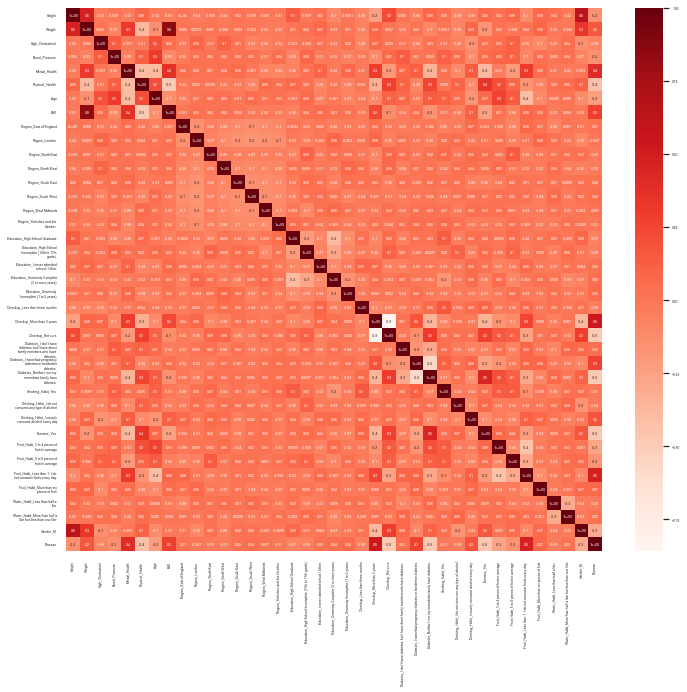

In [90]:
def cor_heatmap(cor):
    sns.set(font_scale=0.3)
    plt.figure(figsize=(12,10))
    labels = [];
    for label in cor.columns:
        labels.append(textwrap.fill(label, width=30,
                      break_long_words=False))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1', yticklabels=labels)
    plt.savefig('Figures/Spearman Correlation.png', dpi=100, bbox_inches='tight')
    plt.show()

cor_spearman = all_train_num.corr(method ='spearman')
cor_spearman

cor_heatmap(cor_spearman)

### 2.7.2 Univariate Variables

Checking if any of the numerical variables is univariate (variance is equal to 0).

In [91]:
X_train_num_scaled.var()

Height                                                                                 0.074201
Weight                                                                                 0.046388
High_Cholesterol                                                                       0.028402
Blood_Pressure                                                                         0.036234
Mental_Health                                                                          0.041232
Physical_Health                                                                        0.063371
Age                                                                                    0.036006
BMI                                                                                    0.077722
Region_East of England                                                                 0.091326
Region_London                                                                          0.139299
Region_North East                       

There are no univariate variables.

### 2.7.3 Logistic Regression

In [92]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=38)
embeded_lr_selector.fit(train_patient, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train_patient.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

9 selected features
['Checkup_More than 3 years', 'Checkup_Not sure', 'Diabetes_I have/had pregnancy diabetes or borderline diabetes', 'Diabetes_Neither I nor my immediate family have diabetes.', 'Drinking_Habit_I usually consume alcohol every day', 'Exercise_Yes', 'Fruit_Habit_3 to 4 pieces of fruit in average', 'Fruit_Habit_Less than 1. I do not consume fruits every day.', 'Gender_M']


### 2.7.4 Random Forest

In [93]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=38)
embeded_rf_selector.fit(train_patient,y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train_patient.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

14 selected features
['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health', 'Age', 'BMI', 'Checkup_More than 3 years', 'Checkup_Not sure', 'Diabetes_Neither I nor my immediate family have diabetes.', 'Exercise_Yes', 'Fruit_Habit_Less than 1. I do not consume fruits every day.', 'Gender_M']


### 2.7.5 RFE

In [94]:
model = LogisticRegression()

In [95]:
nof_list=np.arange(1,49)   
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 28
Score with 28 features: 0.869281


In [96]:
rfe = RFE(estimator = model, n_features_to_select = 6)

In [97]:
X_rfe = rfe.fit_transform(train_patient, y)

In [98]:
selected_features = pd.Series(rfe.support_, index = train_patient.columns)
selected_features

Height                                                                                 False
Weight                                                                                 False
High_Cholesterol                                                                       False
Blood_Pressure                                                                         False
Mental_Health                                                                          False
Physical_Health                                                                        False
Age                                                                                    False
BMI                                                                                    False
Region_East of England                                                                 False
Region_London                                                                          False
Region_North East                                                     

### 2.7.6 Dispersion Ratio

In [99]:
def dispersion(data):
    data = data +1 #avoid 0 division
    aritmeticMean = np.mean(data, axis =0 )
    geometricMean = np.power(np.prod(data, axis =0 ),1/data.shape[0])
    R = aritmeticMean/geometricMean
    return R

In [100]:
R = dispersion(train_patient)
pd.set_option('display.max_rows', None)
R.sort_values(ascending = False)

Height                                                                                      inf
Smoking_Habit_Yes                                                                           inf
Education_University Incomplete (1 to 2 years)                                              inf
Checkup_More than 3 years                                                                   inf
Checkup_Not sure                                                                            inf
Diabetes_I don't have diabetes, but I have direct family members who have diabetes.         inf
Diabetes_I have/had pregnancy diabetes or borderline diabetes                               inf
Diabetes_Neither I nor my immediate family have diabetes.                                   inf
Drinking_Habit_I usually consume alcohol every day                                          inf
Education_High School Incomplete (10th to 11th grade)                                       inf
Exercise_Yes                            

<AxesSubplot:>

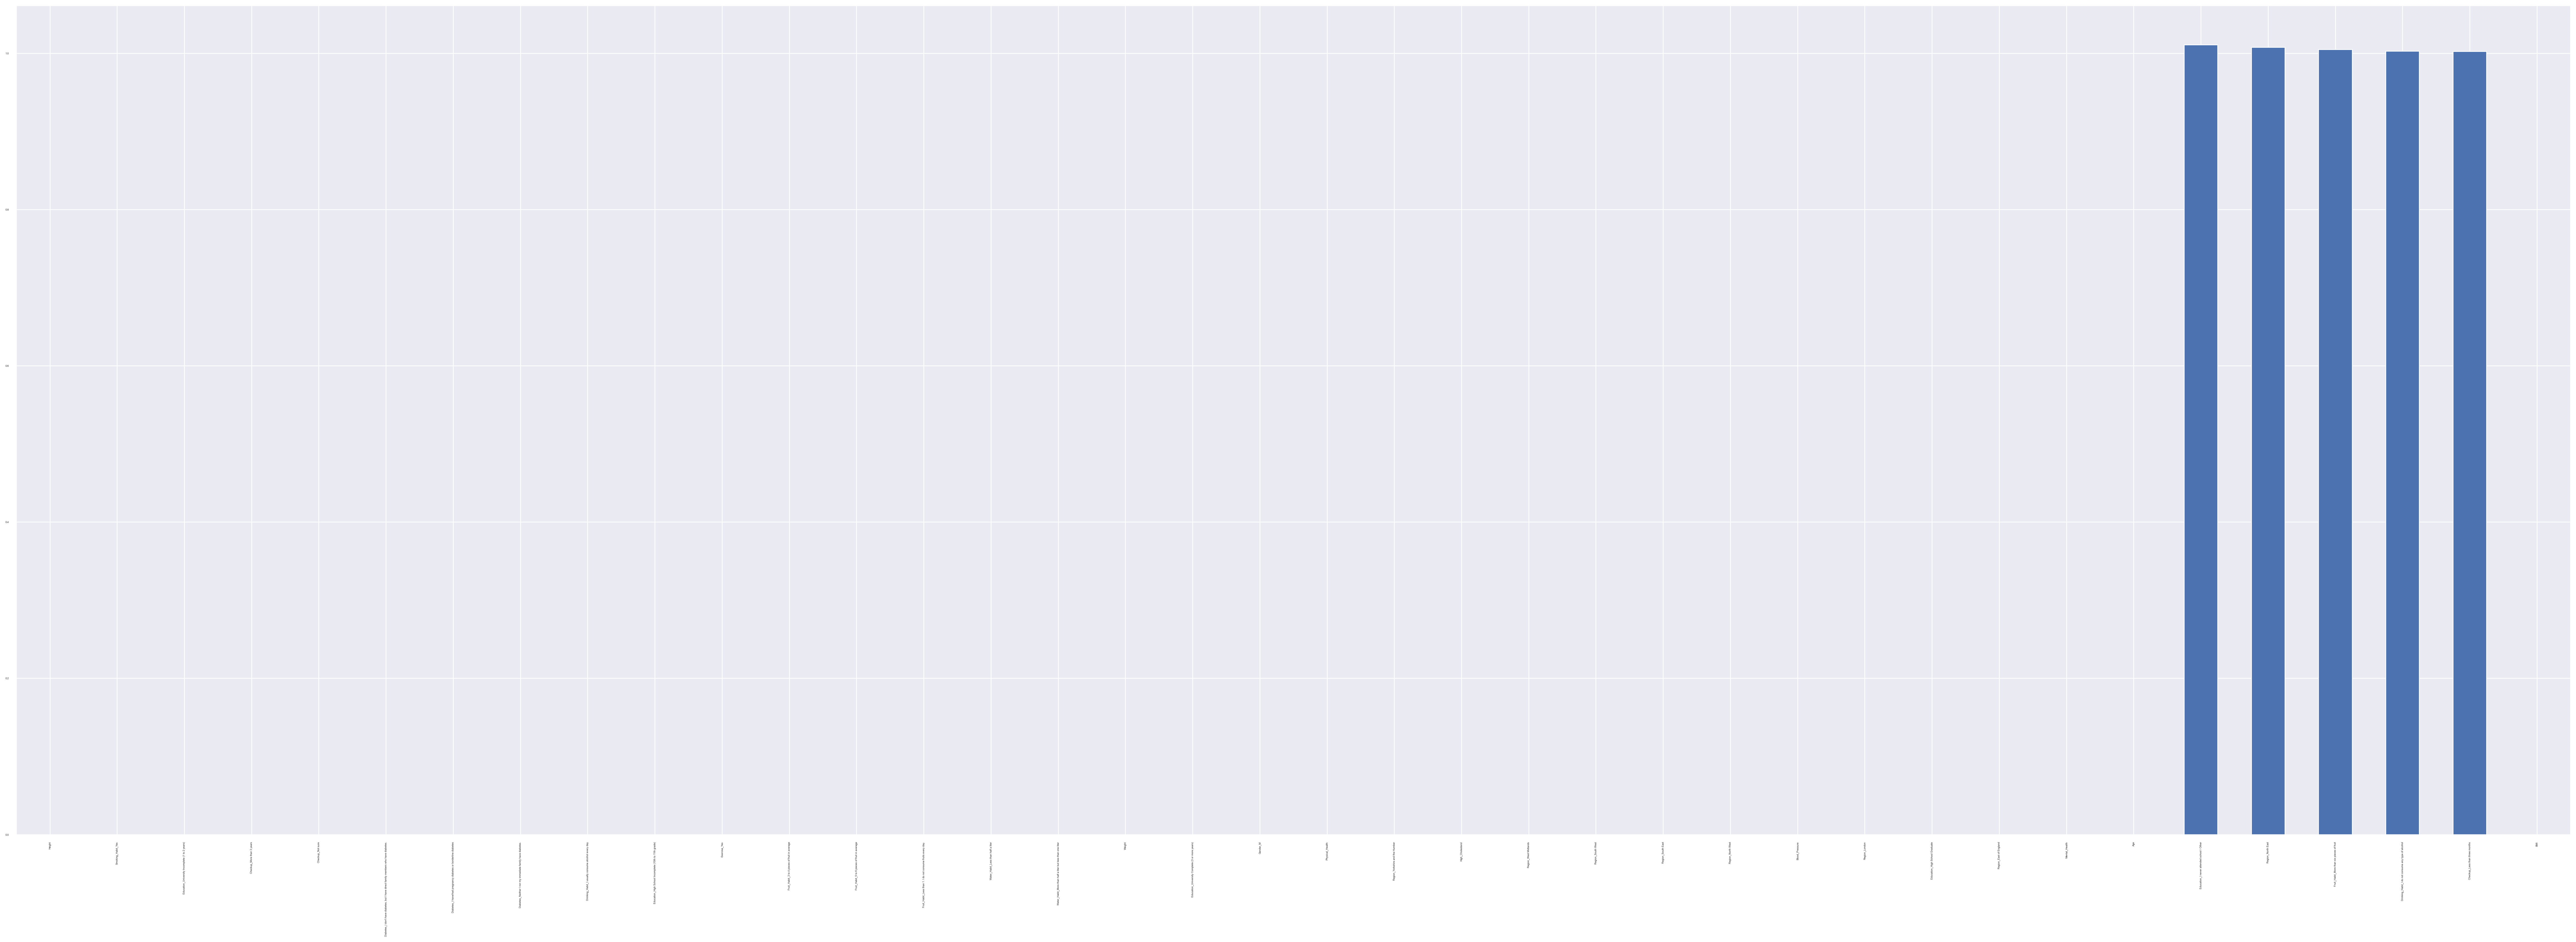

In [101]:
plt.figure(figsize=(60,20), dpi=200)
R.sort_values(ascending=False).plot(kind='bar')

In [102]:
dr_bool = []
for elem in R:
    if elem >= 1:
        dr_bool.append(True)
    else:
        dr_bool.append(False)

In [103]:
dr_features = pd.Series(dr_bool, index = train_patient.columns)

In [104]:
dr_features

Height                                                                                  True
Weight                                                                                  True
High_Cholesterol                                                                        True
Blood_Pressure                                                                          True
Mental_Health                                                                           True
Physical_Health                                                                         True
Age                                                                                     True
BMI                                                                                    False
Region_East of England                                                                  True
Region_London                                                                           True
Region_North East                                                     

### 2.7.7 Mean Absolute Diference (MAD)

In [105]:
mad = np.sum(np.abs(train_patient -np.mean(train_patient, axis =0 )), axis = 0)/train_patient.shape[0]
mad.sort_values(ascending = False)

High_Cholesterol                                                                       37.064664
Blood_Pressure                                                                         12.589296
Weight                                                                                  9.928120
Age                                                                                     7.462395
Height                                                                                  6.718744
Mental_Health                                                                           4.338930
Physical_Health                                                                         4.079624
BMI                                                                                     3.147106
Drinking_Habit_I usually consume alcohol every day                                      0.499507
Diabetes_Neither I nor my immediate family have diabetes.                               0.499229
Checkup_More than 3 years     

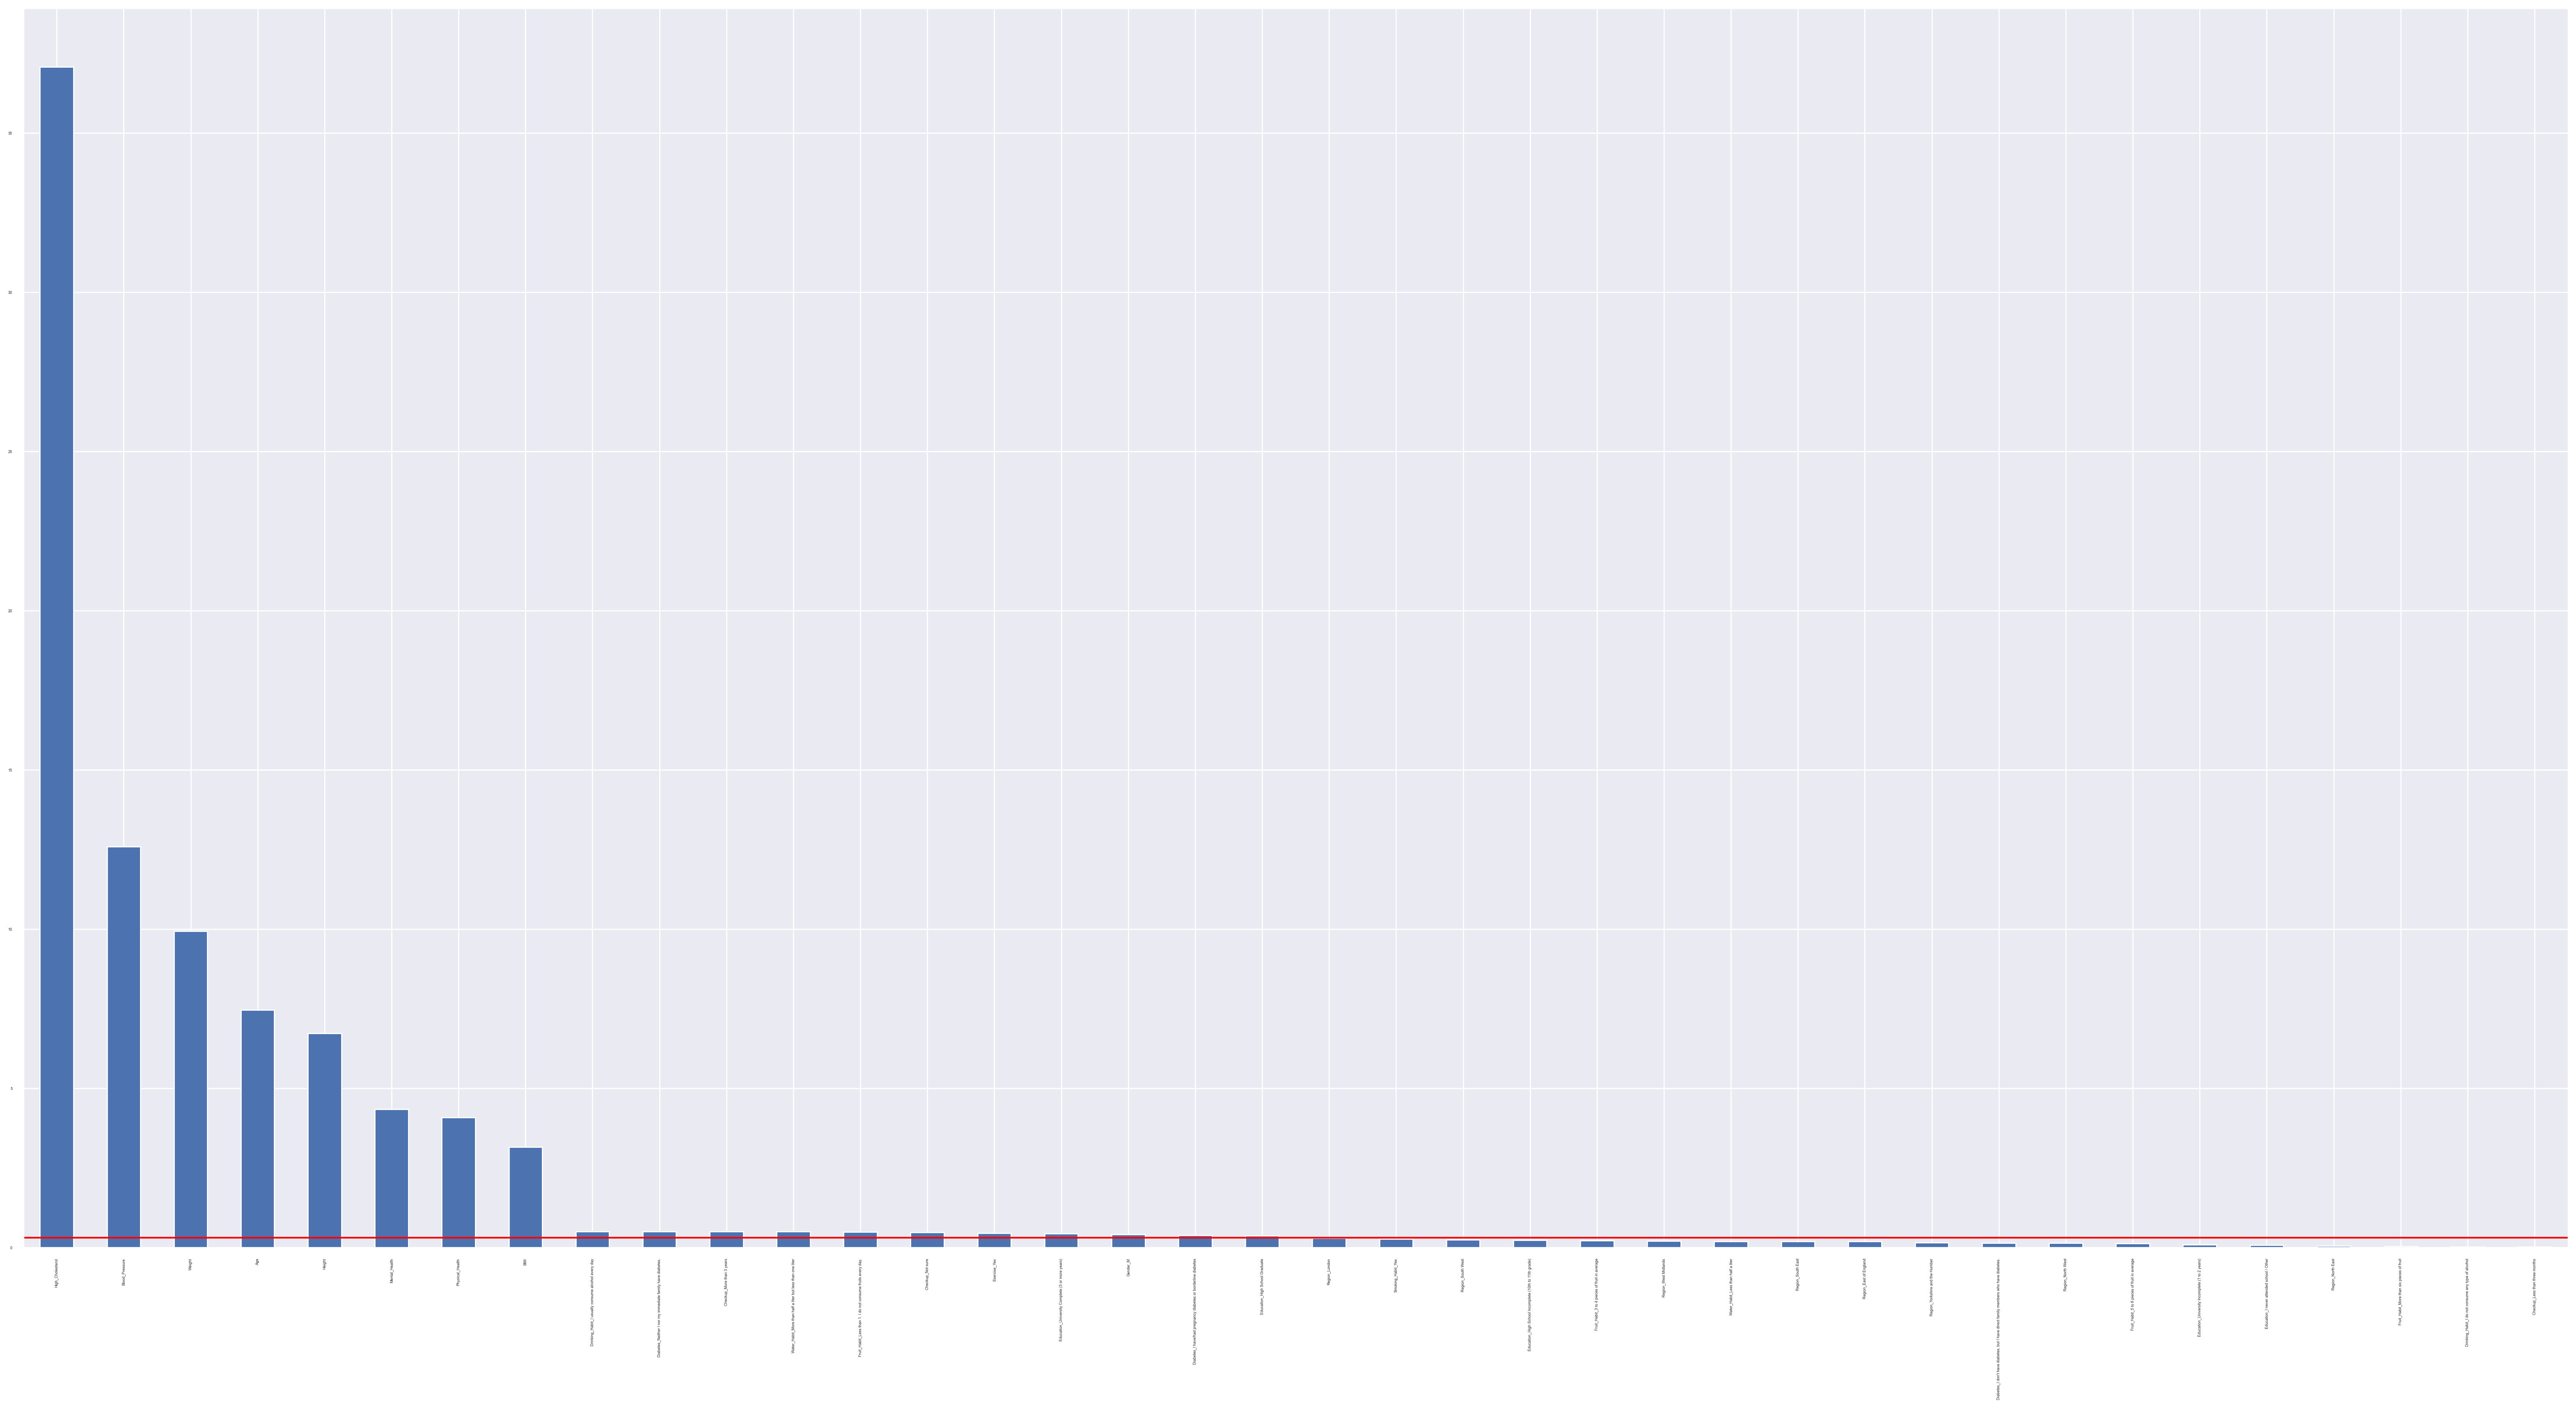

In [106]:
plt.figure(figsize=(40,20), dpi=200)
mad.sort_values(ascending=False).plot(kind='bar')
plt.axhline(y=0.307, color='red')

In [107]:
mad = mad.tolist()

In [108]:
mad_bool = []
for elem in mad:
    if elem > 0.307:
        mad_bool.append(True)
    else:
        mad_bool.append(False)

In [109]:
mad_features = pd.Series(mad_bool, index = train_patient.columns)

In [110]:
mad_features

Height                                                                                  True
Weight                                                                                  True
High_Cholesterol                                                                        True
Blood_Pressure                                                                          True
Mental_Health                                                                           True
Physical_Health                                                                         True
Age                                                                                     True
BMI                                                                                     True
Region_East of England                                                                 False
Region_London                                                                          False
Region_North East                                                     

### 2.7.8 Feature Selection Results

In [111]:
feature_selection_df = pd.DataFrame({'Feature':train_patient.columns,
                                     'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support,
                                     'RFE':selected_features, 
                                     'MAD': mad_features,
                                     'DR' : dr_features})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(train_patient))

Feature  Logistics  \
1                                            Gender_M       True   
2   Fruit_Habit_Less than 1. I do not consume frui...       True   
3                                        Exercise_Yes       True   
4   Diabetes_Neither I nor my immediate family hav...       True   
5                           Checkup_More than 3 years       True   
6                                    Checkup_Not sure       True   
7                                              Weight      False   
8                                     Physical_Health      False   
9                                       Mental_Health      False   
10                                   High_Cholesterol      False   
11                                             Height      False   
12  Drinking_Habit_I usually consume alcohol every...       True   
13  Diabetes_I have/had pregnancy diabetes or bord...       True   
14                                     Blood_Pressure      False   
15                                                Age      False   
16  Water_Habit_More than half a liter but less th...      False   
17          Fruit_Habit_More than six pieces of fruit      False   
18      Fruit_Habit_3 to 4 pieces of fruit in average       True   
19    Education_University Complete (3 or more years)      False   
20                     Education_High School Graduate      False   
21                                                BMI      False   
22                 Water_Habit_Less than half a liter      False   
23                                  Smoking_Habit_Yes      False   
24                    Region_Yorkshire and the Humber      False   
25                               Region_West Midlands      False   
26                                  Region_South West      False   
27                                  Region_South East      False   
28                                  Region_North West      False   
29                                  Region_North East      False   
30                                      Region_London      False   
31                             Region_East of England      False   
32      Fruit_Habit_5 to 6 pieces of fruit in average      False   
33     Education_University Incomplete (1 to 2 years)      False   
34          Education_I never attended school / Other      False   
35  Education_High School Incomplete (10th to 11th...      False   
36  Drinking_Habit_I do not consume any type of al...      False   
37  Diabetes_I don't have diabetes, but I have dir...      False   
38                     Checkup_Less than three months      False   

    Random Forest    RFE    MAD     DR  Total  
1            True   True   True   True      5  
2            True   True   True   True      5  
3            True   True   True   True      5  
4            True   True   True   True      5  
5            True   True   True   True      5  
6            True  False   True   True      4  
7            True  False   True   True      3  
8            True  False   True   True      3  
9            True  False   True   True      3  
10           True  False   True   True      3  
11           True  False   True   True      3  
12          False  False   True   True      3  
13          False  False   True   True      3  
14           True  False   True   True      3  
15           True  False   True   True      3  
16          False  False   True   True      2  
17          False   True  False   True      2  
18          False  False  False   True      2  
19          False  False   True   True      2  
20          False  False   True   True      2  
21           True  False   True  False      2  
22          False  False  False   True      1  
23          False  False  False   True      1  
24          False  False  False   True      1  
25          False  False  False   True      1  
26          False  False  False   True      1  
27          False  False  False   True      1  
28          False  False  False   True      1  
2

In [112]:
X_train = X_train_num_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'Weight',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [113]:
X_train.head()

Gender_M  \
PatientID             
1046            1.0   
1140            1.0   
1859            1.0   
1297            1.0   
1027            0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1046                                                     1.0             
1140                                                     0.0             
1859                                                     1.0             
1297                                                     1.0             
1027                                                     0.0             

           Exercise_Yes  \
PatientID                 
1046                0.0   
1140                1.0   
1859                1.0   
1297                1.0   
1027                0.0   

           Diabetes_Neither I nor my immediate family have diabetes.  \
PatientID                                                              
1046                                                     0.0           
1140                                                     1.0           
1859                                                     1.0           
1297                                                     1.0           
1027                                                     0.0           

           Checkup_More than 3 years    Weight  Physical_Health  \
PatientID                                                         
1046                             0.0  0.357143             0.00   
1140                             0.0  0.446429             0.25   
1859                             0.0  0.517857             0.35   
1297                             0.0  0.857143             0.15   
1027                             1.0  0.446429             0.00   

           Mental_Health  High_Cholesterol  \
PatientID                                    
1046            0.384615          0.287313   
1140            0.000000          0.552239   
1859            0.769231          0.645522   
1297            0.230769          0.537313   
1027            0.576923          0.720149   

           Drinking_Habit_I usually consume alcohol every day  
PatientID                                                      
1046                                                     1.0   
1140                                                     1.0   
1859                                                     1.0   
1297                                                     0.0   
1027                                                     0.0

In [114]:
X_val = X_val_num_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'Weight',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [115]:
X_val.head()

Gender_M  \
PatientID             
1401            0.0   
1789            1.0   
1576            1.0   
1209            1.0   
1434            0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1401                                                     1.0             
1789                                                     0.0             
1576                                                     1.0             
1209                                                     0.0             
1434                                                     1.0             

           Exercise_Yes  \
PatientID                 
1401                0.0   
1789                0.0   
1576                0.0   
1209                0.0   
1434                1.0   

           Diabetes_Neither I nor my immediate family have diabetes.  \
PatientID                                                              
1401                                                     1.0           
1789                                                     0.0           
1576                                                     0.0           
1209                                                     0.0           
1434                                                     0.0           

           Checkup_More than 3 years    Weight  Physical_Health  \
PatientID                                                         
1401                             1.0  0.160714             0.35   
1789                             0.0  0.535714             0.30   
1576                             0.0  0.696429             0.25   
1209                             0.0  0.464286             0.30   
1434                             1.0  0.517857             0.00   

           Mental_Health  High_Cholesterol  \
PatientID                                    
1401            0.346154          0.085821   
1789            0.153846          0.578358   
1576            0.807692          0.641791   
1209            0.153846          0.578358   
1434            0.769231          0.529851   

           Drinking_Habit_I usually consume alcohol every day  
PatientID                                                      
1401                                                     1.0   
1789                                                     0.0   
1576                                                     1.0   
1209                                                     0.0   
1434                                                     0.0

## 3. Modelling

###  3.1 Logistic Regression

In [286]:
parameters_LogisticRegression = [
    {'C': np.logspace(-3,3,7),
     "penalty":["l1","l2"],
     "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
    }
    
]
model_LogisticRegression = GridSearchCV(LogisticRegression(), parameters_LogisticRegression, cv=10, scoring='f1')
model_LogisticRegression.fit(X_train, y_train)

print(model_LogisticRegression.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [272]:
y_pred = model_LogisticRegression.predict(X_val)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [273]:
pred_prob = model_LogisticRegression.predict_proba(X_val)
pred_prob

array([[0.35562167, 0.64437833],
       [0.57539794, 0.42460206],
       [0.40140126, 0.59859874],
       [0.57666215, 0.42333785],
       [0.35041343, 0.64958657],
       [0.62845906, 0.37154094],
       [0.65676149, 0.34323851],
       [0.2774805 , 0.7225195 ],
       [0.66385064, 0.33614936],
       [0.53628684, 0.46371316],
       [0.57370419, 0.42629581],
       [0.45462387, 0.54537613],
       [0.57125209, 0.42874791],
       [0.3884678 , 0.6115322 ],
       [0.374214  , 0.625786  ],
       [0.31517419, 0.68482581],
       [0.71159689, 0.28840311],
       [0.36414126, 0.63585874],
       [0.40903557, 0.59096443],
       [0.36173993, 0.63826007],
       [0.72948575, 0.27051425],
       [0.65585575, 0.34414425],
       [0.66101731, 0.33898269],
       [0.42224141, 0.57775859],
       [0.28970051, 0.71029949],
       [0.29732518, 0.70267482],
       [0.45858028, 0.54141972],
       [0.30927234, 0.69072766],
       [0.53733333, 0.46266667],
       [0.33005238, 0.66994762],
       [0.

In [274]:
labels_train = model_LogisticRegression.predict(X_train)
labels_val = model_LogisticRegression.predict(X_val)

In [275]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [276]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       289
           1       0.83      0.92      0.87       322

    accuracy                           0.86       611
   macro avg       0.86      0.86      0.86       611
weighted avg       0.86      0.86      0.86       611

[[230  59]
 [ 27 295]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

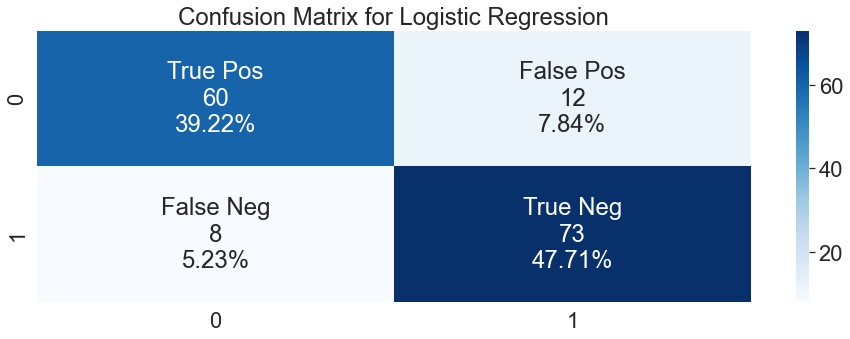

In [284]:
# confusion matrix 
sns.set(font_scale=2)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_LogisticRegression_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_LogisticRegression_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_LogisticRegression_confusionMatrix .flatten()/np.sum(model_LogisticRegression_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(model_LogisticRegression_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

###  3.2 Gaussian Naive Bayes

In [280]:
parameters_GaussianNB = [
    {"var_smoothing":[0.0001,0.001,0.01,0.1]
    }
    
]
model_GaussianNB = GridSearchCV(GaussianNB(), parameters_GaussianNB, cv=10, scoring='f1')
model_GaussianNB.fit(X_train, y_train)

print(model_GaussianNB.best_params_)

{'var_smoothing': 0.1}


In [281]:
labels_train = model_GaussianNB.predict(X_train)
labels_val = model_GaussianNB.predict(X_val)

In [282]:
model_GaussianNB.predict_proba(X_val)

array([[4.22401873e-02, 9.57759813e-01],
       [9.47565293e-01, 5.24347074e-02],
       [9.32528405e-02, 9.06747160e-01],
       [9.50728604e-01, 4.92713963e-02],
       [2.42258804e-02, 9.75774120e-01],
       [9.84354543e-01, 1.56454572e-02],
       [9.83470946e-01, 1.65290540e-02],
       [2.42631045e-03, 9.97573690e-01],
       [9.99350027e-01, 6.49972624e-04],
       [9.11576730e-01, 8.84232705e-02],
       [9.19481560e-01, 8.05184403e-02],
       [2.86218885e-01, 7.13781115e-01],
       [9.46474520e-01, 5.35254805e-02],
       [5.92173780e-02, 9.40782622e-01],
       [7.39563523e-02, 9.26043648e-01],
       [6.40249330e-03, 9.93597507e-01],
       [9.96725747e-01, 3.27425345e-03],
       [1.39689699e-02, 9.86031030e-01],
       [2.24882746e-01, 7.75117254e-01],
       [2.40599185e-01, 7.59400815e-01],
       [9.98937040e-01, 1.06296038e-03],
       [9.97866637e-01, 2.13336324e-03],
       [9.98219289e-01, 1.78071087e-03],
       [8.49635813e-02, 9.15036419e-01],
       [6.014080

In [283]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       289
           1       0.84      0.87      0.86       322

    accuracy                           0.84       611
   macro avg       0.85      0.84      0.84       611
weighted avg       0.84      0.84      0.84       611

[[235  54]
 [ 41 281]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

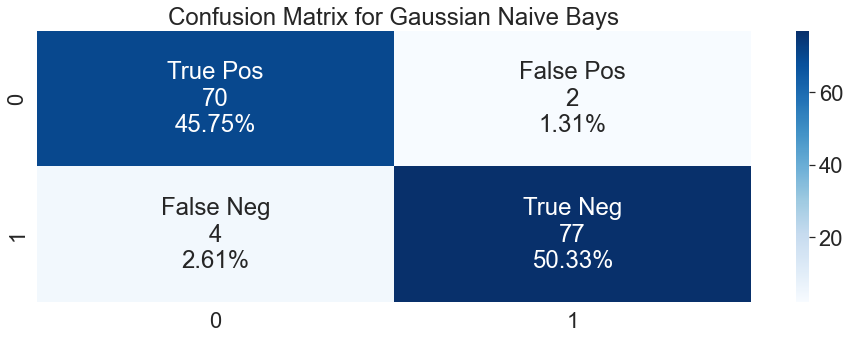

In [310]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_GaussianNB_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_GaussianNB_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_GaussianNB_confusionMatrix .flatten()/np.sum(model_GaussianNB_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Gaussian Naive Bays")
sns.heatmap(model_GaussianNB_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

###  3.3 KNN

In [288]:
numberK_list=np.arange(2,90)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_val = model.score(X_val, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 3
Mean accuracy in train with 3 neighbors: 0.941080
Mean accuracy in validation with 3 neighbors: 0.908497


In [289]:
parameters_KNN = [
    {'n_neighbors': [3, 4, 5, 6, 7, 8],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
     'metric': ['minkowski', 'manhattan'],
     'weights': ['uniform', 'distance']
    }
    
]
model_KNN = GridSearchCV(KNeighborsClassifier(), parameters_KNN, cv=10, scoring='f1')
model_KNN.fit(X_train, y_train)

print(model_KNN.best_params_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [291]:
labels_train = model_KNN.predict(X_train)
labels_val = model_KNN.predict(X_val)

In [293]:
model_KNN.predict_proba(X_val)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.95149484, 0.04850516],
       [1.        , 0.        ],
       [0.06222243, 0.93777757],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.18216699, 0.81783301],
       [0.32163805, 0.67836195],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.1585143 , 0.8414857 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.11343695, 0.88656305],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [294]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       322

    accuracy                           1.00       611
   macro avg       1.00      1.00      1.00       611
weighted avg       1.00      1.00      1.00       611

[[289   0]
 [  0 322]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

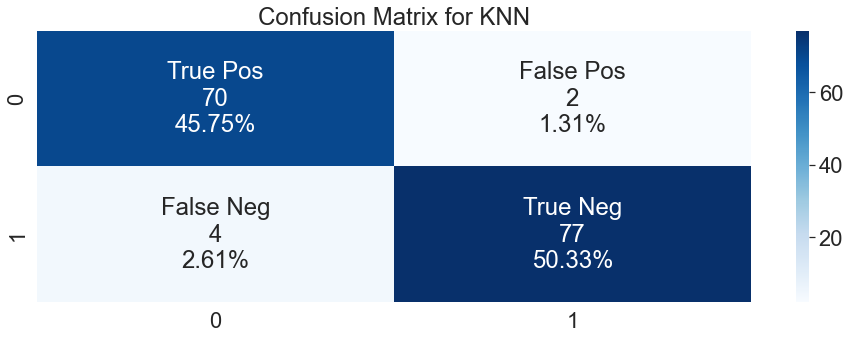

In [309]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_KNN_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_KNN_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_KNN_confusionMatrix .flatten()/np.sum(model_KNN_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for KNN")
sns.heatmap(model_KNN_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

### 3.4 Decision Trees

In [334]:
parameters_DT = [
    {'max_depth': [2, 3, 5, 8, 10, 20],
     'max_leaf_nodes': [10, 20, 30, 40, 50],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
    }
]   

In [333]:
model_DT = GridSearchCV(DecisionTreeClassifier(), parameters_DT, cv=10, scoring='f1')
model_DT.fit(X_train, y_train)
final_DT = model_DT.best_estimator_

print(model_DT.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 30, 'min_samples_leaf': 5}


In [335]:
dot_data = tree.export_graphviz(final_DT, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=["Lower Average", "Above Average"],  # only to classification problems
                     filled=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"25,25!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [336]:
print('The defined three has a depth of ' + str(final_DT.get_depth()) + ', ' + str(final_DT.tree_.node_count) + 
      ' nodes and a total of ' + str(final_DT.get_n_leaves()) + ' leaves.')

The defined three has a depth of 8, 59 nodes and a total of 30 leaves.


In [337]:
labels_train = model_KNN.predict(X_train)
labels_val = model_KNN.predict(X_val)

In [338]:
model_DT.predict_proba(X_val)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.35294118, 0.64705882],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.97674419, 0.02325581],
       [0.97674419, 0.02325581],
       [0.        , 1.        ],
       [0.97674419, 0.02325581],
       [1.        , 0.        ],
       [0.07692308, 0.92307692],
       [0.625     , 0.375     ],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.9375    , 0.0625    ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.83333333, 0.16666667],
       [0.97674419, 0.02325581],
       [0.97674419, 0.02325581],
       [0.97674419, 0.02325581],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.35294118, 0.64705882],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [339]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       322

    accuracy                           1.00       611
   macro avg       1.00      1.00      1.00       611
weighted avg       1.00      1.00      1.00       611

[[289   0]
 [  0 322]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

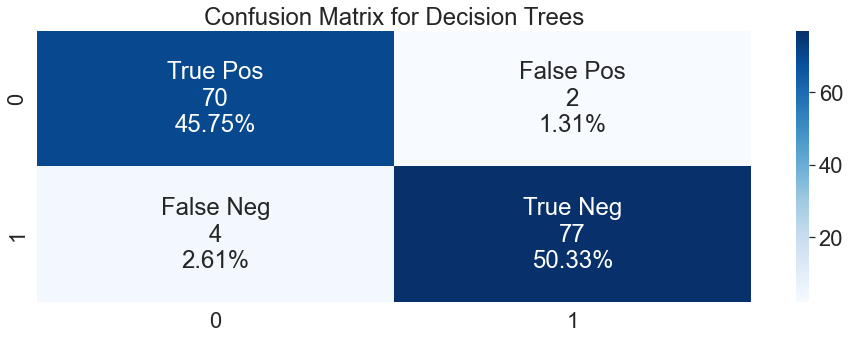

In [340]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_DT_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_DT_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_DT_confusionMatrix .flatten()/np.sum(model_DT_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Decision Trees")
sns.heatmap(model_DT_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

In [341]:
final_DT.feature_importances_

array([0.03140649, 0.11738128, 0.        , 0.09334689, 0.34509371,
       0.04484471, 0.10695749, 0.05774674, 0.18445407, 0.01876862])

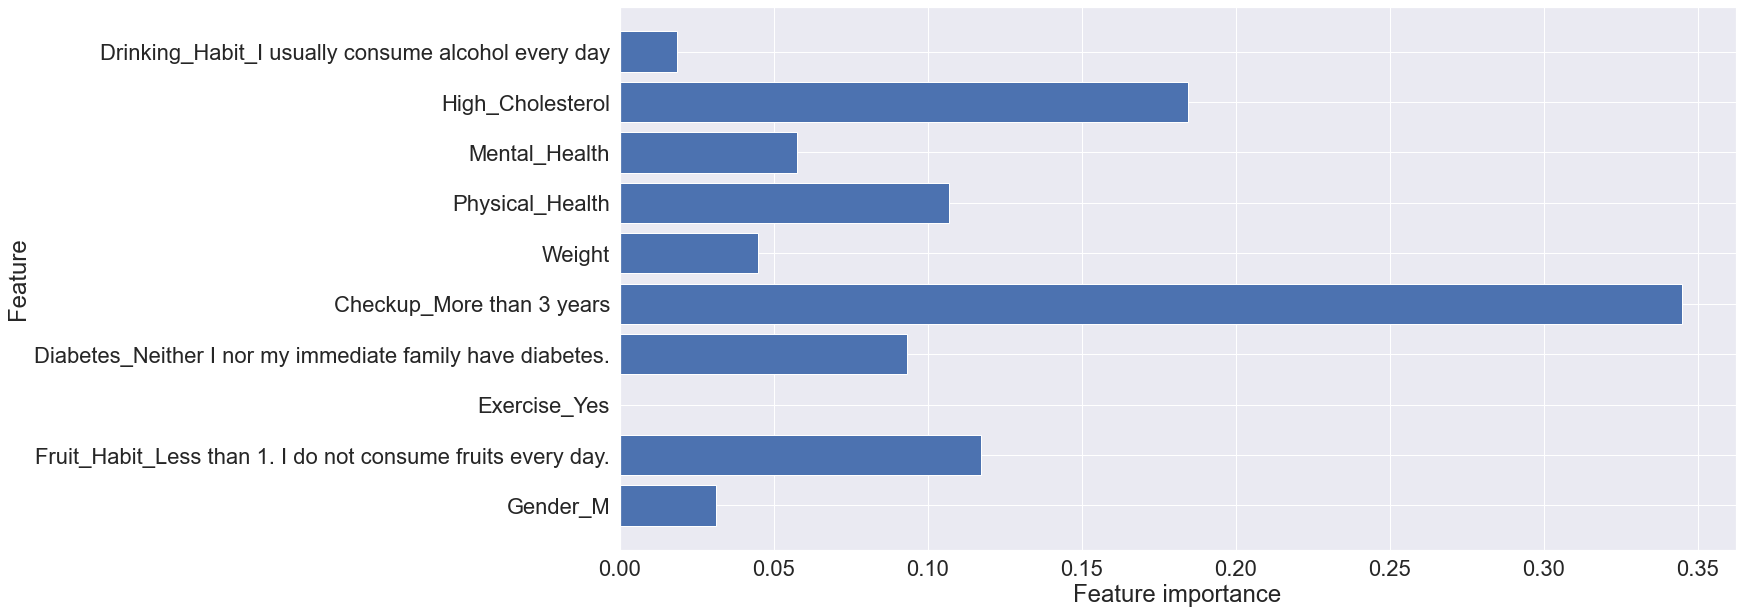

In [342]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importances(final_DT)

### 3.5 Support Vector Machine

#### 3.5.1 Support Vector Classification 

In [344]:
parameters_SVC = [
    {'C': [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','sigmoid'],
    'random_state':[None,1,10,20,30,40]
    },
    
]
model_SVC= GridSearchCV(SVC(), parameters_SVC,cv=10,scoring ='f1')
model_SVC.fit(X_train, y_train)
print(optimal_params_modelSVC.best_params_)


{'C': 100, 'gamma': 1, 'kernel': 'rbf', 'random_state': None}


In [345]:
labels_train = model_SVC.predict(X_train)
labels_val = model_SVC.predict(X_val)

In [347]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       289
           1       0.98      0.99      0.99       322

    accuracy                           0.99       611
   macro avg       0.99      0.98      0.99       611
weighted avg       0.99      0.99      0.99       611

[[283   6]
 [  3 319]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

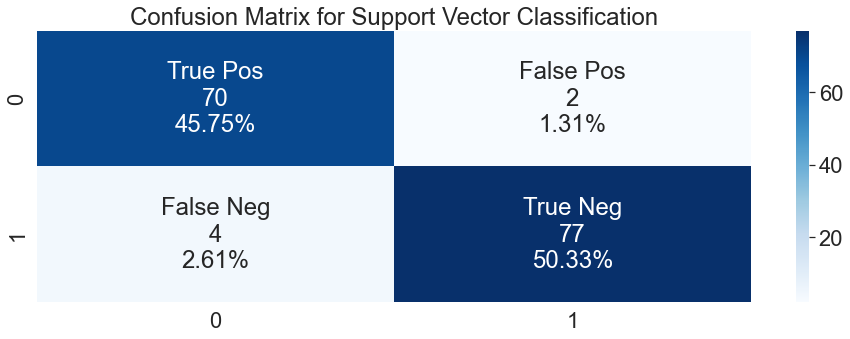

In [348]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_SVC_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_SVC_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_SVC_confusionMatrix .flatten()/np.sum(model_SVC_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Support Vector Classification")
sns.heatmap(model_SVC_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

#### 3.5.2 Nu-Support Vector Classification

In [350]:
parameters_NuSVC = [
    {'nu': [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf','sigmoid'],
    'random_state':[None,1,10,20,30,40]
    },
    
]

model_NuSVC= GridSearchCV(NuSVC(), parameters_NuSVC,cv=10,scoring ='f1')
model_NuSVC.fit(X_train, y_train)
print(model_NuSVC.best_params_)


{'gamma': 1, 'kernel': 'rbf', 'nu': 0.5, 'random_state': None}


In [351]:
labels_train = modelNuSVC.predict(X_train)
labels_val = modelNuSVC.predict(X_val)

In [352]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       289
           1       0.83      0.89      0.86       322

    accuracy                           0.84       611
   macro avg       0.85      0.84      0.84       611
weighted avg       0.85      0.84      0.84       611

[[231  58]
 [ 37 285]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

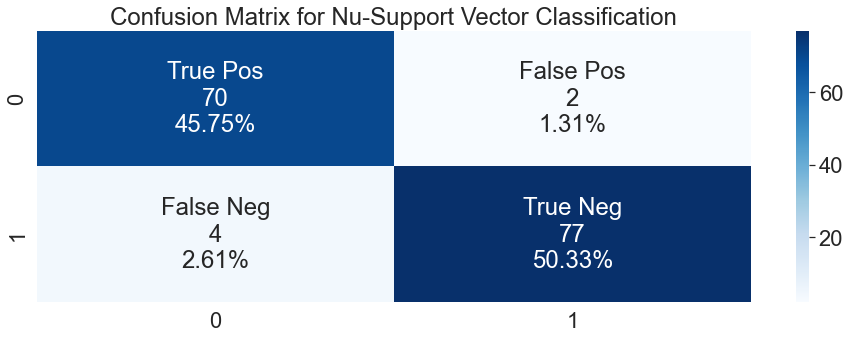

In [354]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_NuSVC_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_NuSVC_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_NuSVC_confusionMatrix .flatten()/np.sum(model_NuSVC_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Nu-Support Vector Classification")
sns.heatmap(model_NuSVC_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

#### 3.5.3 Linear Support Vector Classification

In [357]:
parameters_LinearSVC = [
    {'C': [0.5,1,10,100],
     'dual': [True,False],
    'random_state':[None,1,10,20,30,40]
    },
    
]
model_LinearSVC= GridSearchCV(LinearSVC(), parameters_LinearSVC,cv=10,scoring ='f1')
model_LinearSVC.fit(X_train, y_train)
print(optimal_params_modelLinearSVC.best_params_)

{'C': 10, 'dual': True, 'random_state': None}


In [358]:
labels_train = model_LinearSVC.predict(X_train)
labels_val = model_LinearSVC.predict(X_val)

In [359]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       289
           1       0.84      0.90      0.87       322

    accuracy                           0.86       611
   macro avg       0.86      0.85      0.85       611
weighted avg       0.86      0.86      0.86       611

[[233  56]
 [ 32 290]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

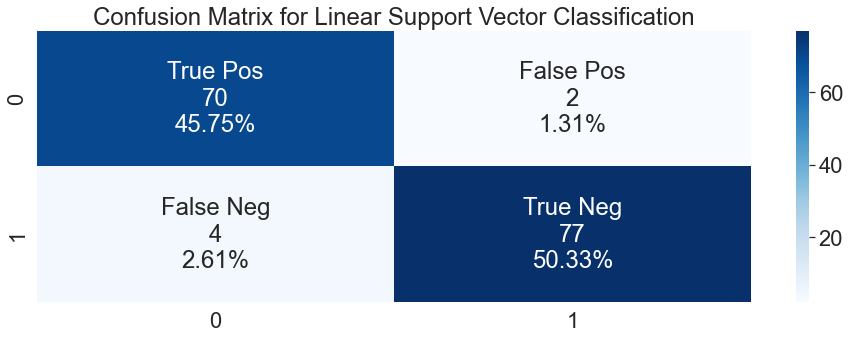

In [360]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_LinearSVC_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_LinearSVC_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_LinearSVC_confusionMatrix .flatten()/np.sum(model_LinearSVC_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Linear Support Vector Classification")
sns.heatmap(model_LinearSVC_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

### 3.6 Neural Networks

In [195]:
def avg_score(model):
    score_train = []
    score_val = []
    timer = []
    f1_score_val = []
    f1_score_train = []
    
    for i in range(10):
        begin = time.perf_counter() # start counting time
        model.fit(X_train, y_train) # fit your model to your training data
        end = time.perf_counter() # stop counting time
        
        value_train = model.score(X_train, y_train) # mean accuracy for train
        value_val = model.score(X_val, y_val) # mean accuracy for validation
        score_train.append(value_train) # append the mean accuracy in train to your list score_train
        score_val.append(value_val) # append the mean accuracy in validation to your list score_val
        timer.append(end-begin) # append the time to your list timer
        f1_score_val.append(f1_score(model.predict(X_val), y_val))
        f1_score_train.append(f1_score(model.predict(X_train), y_train))
        
    
    avg_time = round(np.mean(timer),3) # check the mean value of training time for your 10 models 
    avg_train = round(np.mean(score_train),3) # check the mean accuracy in train for your 10 models
    avg_val = round(np.mean(score_val),3) # check the mean accuracy in validation for your 10 models
    std_time = round(np.std(timer),2) # check the standard deviation of training time for your 10 models
    std_train = round(np.std(score_train),2) # check the standard deviation of the mean accuracy in train for your 10 models
    std_val = round(np.std(score_val),2) # check the standard deviation of the mean accuracy in validation for your 10 models
    avg_f1_val = round(np.mean(f1_score_val),3)
    avg_f1_train = round(np.mean(f1_score_train),3)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_f1_train), str(avg_f1_val)

def show_results(df, models):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for model in models:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_f1_train, avg_f1_val = avg_score(model)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_f1_train, avg_f1_val
        count+=1
    return df

In [197]:
model_simple = MLPClassifier(hidden_layer_sizes=(5))
model_medium = MLPClassifier(hidden_layer_sizes=(20,20))
model_complex = MLPClassifier(hidden_layer_sizes=(40, 40, 40))

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['Simple','Medium','Complex'])
show_results(df, [model_simple, model_medium, model_complex])

Time         Train    Validation F1 Train F1 Validation
Simple    0.24+/-0.02  0.856+/-0.01  0.848+/-0.01    0.867         0.858
Medium    0.58+/-0.02  0.871+/-0.01  0.859+/-0.01    0.881         0.866
Complex  0.956+/-0.03   0.92+/-0.01  0.893+/-0.01    0.926         0.899

In [198]:
model_logistic = MLPClassifier(activation='logistic')
model_tanh = MLPClassifier(activation='tanh')
model_relu = MLPClassifier(activation='relu')
model_identity = MLPClassifier(activation='identity')

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['logistic','tanh', 'relu', 'identity'])
show_results(df, [model_logistic, model_tanh, model_relu, model_identity])

Time        Train    Validation F1 Train F1 Validation
logistic  0.656+/-0.05  0.866+/-0.0  0.857+/-0.01    0.877         0.866
tanh       0.484+/-0.1  0.857+/-0.0  0.845+/-0.01    0.869         0.855
relu      0.721+/-0.09  0.866+/-0.0   0.85+/-0.01    0.876         0.857
identity  0.256+/-0.03  0.857+/-0.0   0.85+/-0.01    0.869          0.86

In [199]:
model_sgd = MLPClassifier(solver = 'sgd')
model_adam = MLPClassifier(solver = 'adam')
model_lbfgs = MLPClassifier(solver = 'lbfgs')

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['sgd','adam', 'lbfgs'])
show_results(df, [model_sgd, model_adam, model_lbfgs])

Time         Train    Validation F1 Train F1 Validation
sgd    0.658+/-0.03  0.844+/-0.01   0.861+/-0.0    0.856         0.871
adam   0.672+/-0.01   0.867+/-0.0  0.854+/-0.01    0.877         0.862
lbfgs  0.436+/-0.03   0.993+/-0.0  0.944+/-0.02    0.993         0.946

In [200]:
model_constant = MLPClassifier(solver = 'sgd', learning_rate = 'constant')
model_invscaling = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling')

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['constant','invscaling'])
show_results(df, [model_constant, model_invscaling])

Time         Train    Validation f1 Train f1 Validation
constant    0.666+/-0.03  0.847+/-0.01   0.865+/-0.0    0.859         0.875
invscaling  0.091+/-0.04  0.631+/-0.12  0.648+/-0.13    0.571          0.59

In [362]:
parameters_NN = {
    'hidden_layer_sizes': [(200,80,60),(200,80,60,40),(200,80,60,40,20)],
    'activation': ['relu','tanh','logistic','identity'],
    'solver': ['lbfgs'],
}

In [410]:
model_NN = RandomizedSearchCV(MLPClassifier(), parameters_NN, cv=10)
model_NN.fit(X_train, y_train)

final_model_NN = model_NN.best_estimator_
print(model_NN.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['final_model_NN'])
show_results(df, [final_model_NN])

{'solver': 'lbfgs', 'hidden_layer_sizes': (200, 80, 60), 'activation': 'tanh'}


Time      Train    Validation F1 Train F1 Validation
final_NN  2.324+/-0.44  1.0+/-0.0  0.944+/-0.02      1.0         0.945

### 3.7 Ensemble Models

Ensemble learning is a machine learning technique that seeks better predictive performance by combining the predictions from multiple models.

In [203]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

The function return_f1score will allow us to obtain the f1 score for all the models we are going to create on the notebook, and each model instance is going to be trained for 30 (10*3) times, using the RepeatedStratifiedKFold.

In [204]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

The function return_results will receive as parameters all the models instances and is going to return the f1 scores from the previous function, and make a boxplot of the results for all the model instances.

In [373]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train, y_train)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(18,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=10)
    plt.show()

#### 3.7.1 Bagging Classifier

>DecisionTreeClassifier()_bagging 0.925 (0.034)
>DecisionTreeClassifier() 0.927 (0.035)
>KNeighborsClassifier()_bagging 0.861 (0.039)
>KNeighborsClassifier() 0.853 (0.042)
>LogisticRegression()_bagging 0.867 (0.038)
>LogisticRegression() 0.867 (0.037)


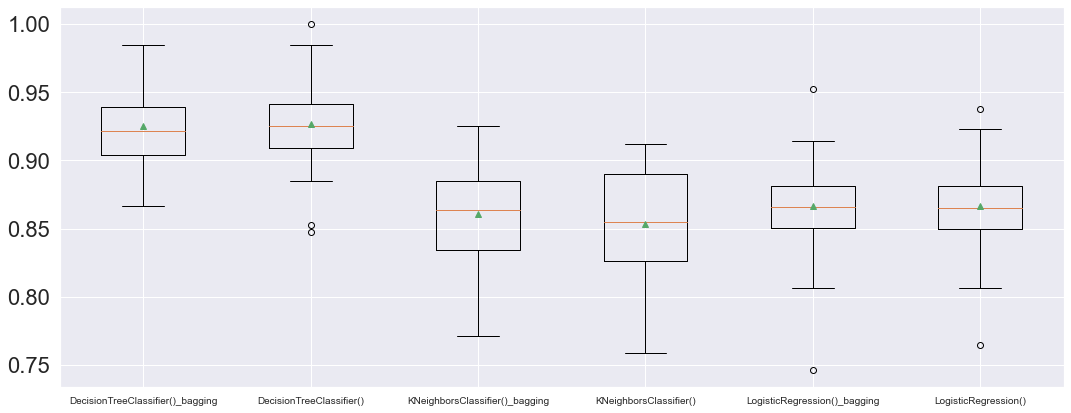

In [374]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()


def get_models(*args):
    models = dict()
    for arg in args:
        models[str(arg) + '_bagging'] = BaggingClassifier(base_estimator = arg, random_state = 15)      
        models[str(arg)] = arg  
    return models

models = get_models(dt, knn, lr)
return_results(models)

>True 0.925 (0.034)
>False 0.932 (0.035)


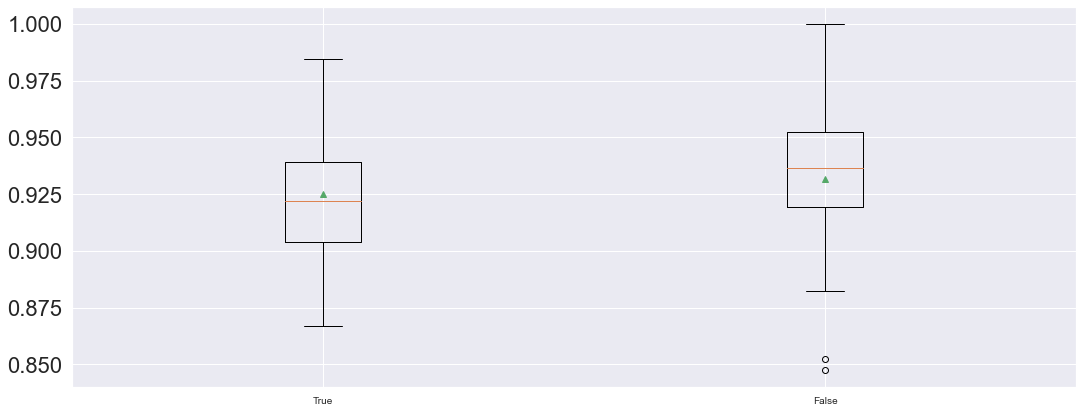

In [375]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

>0.1 0.846 (0.047)
>0.2 0.864 (0.041)
>0.4 0.902 (0.035)
>0.6 0.912 (0.024)
>0.8 0.921 (0.035)
>1.0 0.925 (0.034)


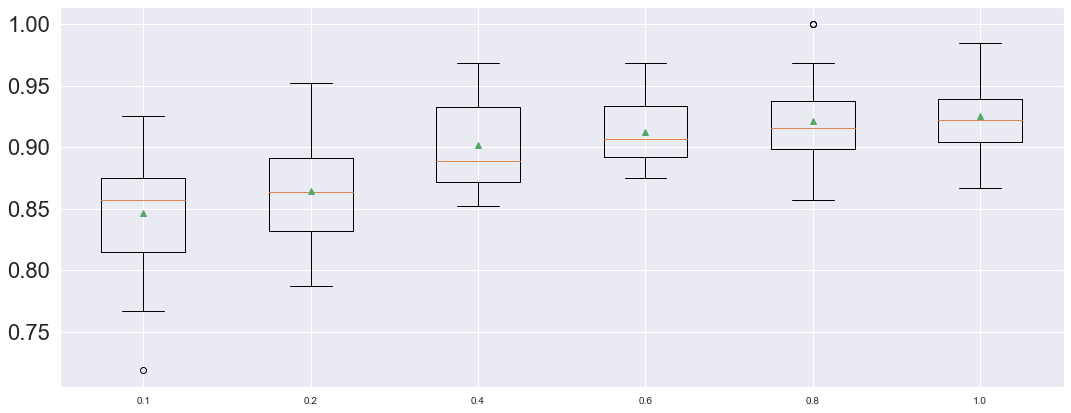

In [377]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(max_samples = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.4,0.6,0.8,1.0])
return_results(models)

In [378]:
parameters_Bagging = {
    'base_estimator': [DecisionTreeClassifier()],
    'n_estimators': [2,5,10,20,30,50,100,150,200],
    'max_samples': [0.9, 1],
    'max_features': [0.6,0.8,1.0],
    'bootstrap': [False]
}

In [380]:
model_Bagging = GridSearchCV(BaggingClassifier(), parameters_Bagging)
model_Bagging.fit(X_train, y_train)

final_model_Bagging = model_Bagging.best_estimator_
print(model_Bagging.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['final_model_Bagging'])
show_results(df, [final_model_Bagging])

{'base_estimator': DecisionTreeClassifier(), 'bootstrap': False, 'max_features': 0.6, 'max_samples': 0.9, 'n_estimators': 200}


Time      Train    Validation f1 Train  \
final_model_Bagging  0.525+/-0.05  1.0+/-0.0  0.975+/-0.01      1.0   

                    f1 Validation  
final_model_Bagging         0.976

#### 3.7.2 Random Forest

>10 0.947 (0.028)
>20 0.951 (0.030)
>50 0.954 (0.028)
>100 0.954 (0.029)
>200 0.957 (0.030)
>300 0.959 (0.028)


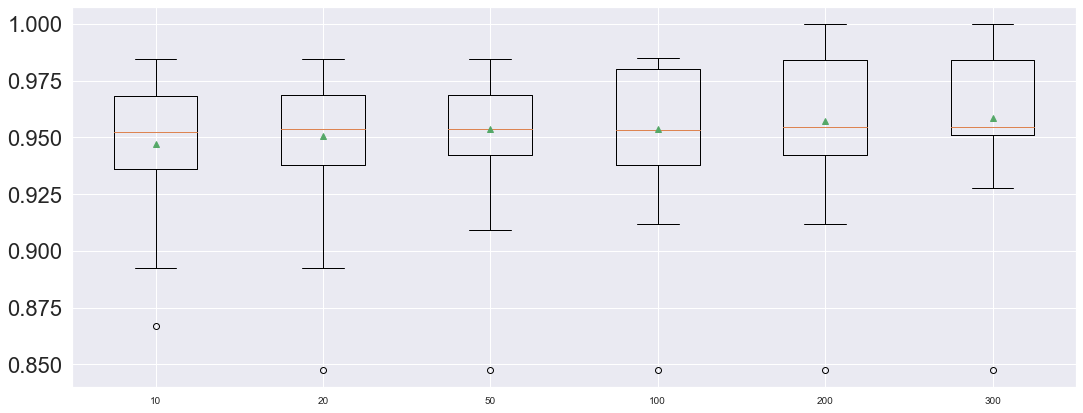

In [381]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 10)      
    return models

models = get_models([10,20,50,100,200,300])
return_results(models)

>True 0.951 (0.033)
>False 0.959 (0.035)


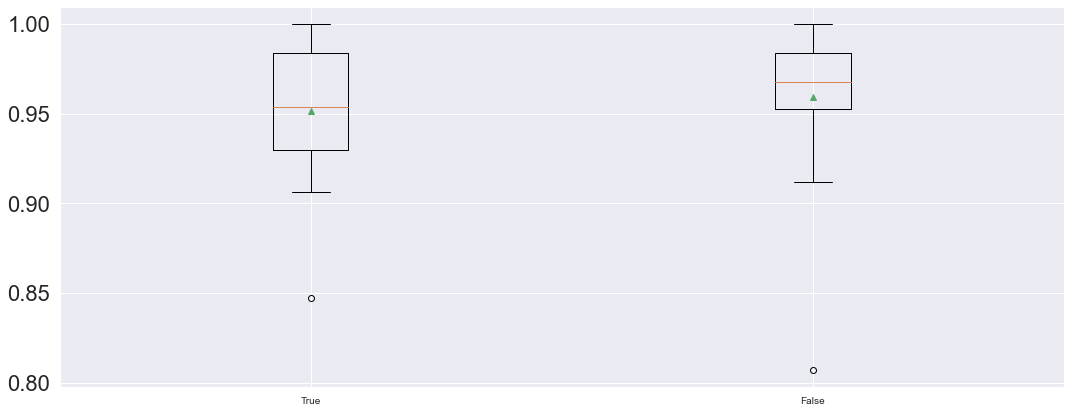

In [382]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

In [209]:
model_gini = RandomForestClassifier(criterion='gini')
model_entropy= RandomForestClassifier(criterion='entropy')

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['gini','entropy'])
show_results(df, [model_gini, model_entropy])

Time      Train    Validation f1 Train f1 Validation
gini     0.175+/-0.01  1.0+/-0.0  0.977+/-0.01      1.0         0.978
entropy  0.186+/-0.02  1.0+/-0.0  0.979+/-0.01      1.0          0.98

In [210]:
model_small_maxdepth = RandomForestClassifier(max_depth=5)
model_medium_maxdepth = RandomForestClassifier(max_depth=10)
model_big_maxdepth = RandomForestClassifier(max_depth=15)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['small','medium', 'big'])
show_results(df, [model_small_maxdepth, model_medium_maxdepth, model_big_maxdepth])

Time        Train    Validation f1 Train f1 Validation
small   0.337+/-0.11  0.914+/-0.0  0.884+/-0.01    0.922         0.893
medium  0.331+/-0.02  0.999+/-0.0  0.982+/-0.01    0.999         0.983
big     0.302+/-0.03    1.0+/-0.0  0.978+/-0.01      1.0         0.979

>1 0.860 (0.041)
>2 0.858 (0.038)
>4 0.876 (0.036)
>6 0.914 (0.038)
>8 0.946 (0.032)
>10 0.948 (0.031)
>None 0.951 (0.033)


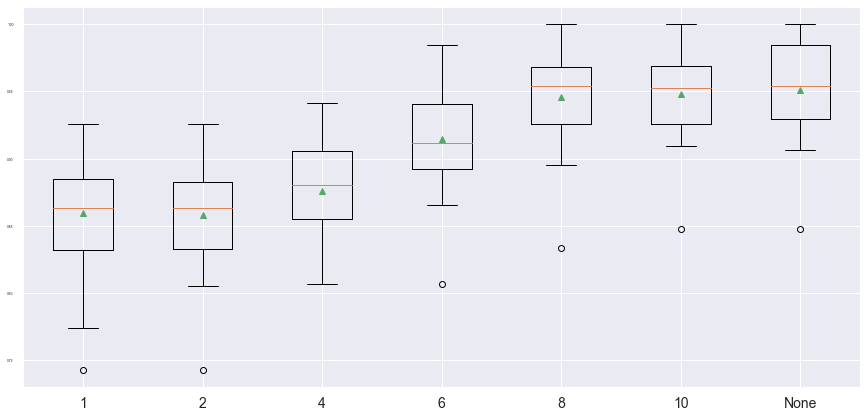

In [211]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 15)      
    return models

models = get_models([1,2,4,6,8,10,None])
return_results(models)

In [212]:
model_small_min_samples_leaf = RandomForestClassifier(min_samples_leaf=3)
model_medium_min_samples_leaf = RandomForestClassifier(min_samples_leaf=5)
model_big_min_samples_leaf = RandomForestClassifier(min_samples_leaf=8)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['small','medium', 'big'])
show_results(df, [model_small_min_samples_leaf, model_medium_min_samples_leaf, model_big_min_samples_leaf])

Time        Train    Validation f1 Train f1 Validation
small   0.209+/-0.02  0.977+/-0.0  0.918+/-0.01    0.979         0.924
medium  0.194+/-0.01  0.934+/-0.0  0.885+/-0.01    0.938         0.893
big     0.185+/-0.01  0.901+/-0.0  0.865+/-0.01    0.909         0.874

In [383]:
parameters_random_forest = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'class_weight': ['balanced_subsample'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [False]
}

In [385]:
model_random_forest = GridSearchCV(RandomForestClassifier(), parameters_random_forest,scoring ='f1')
model_random_forest.fit(X_train, y_train)

final_model_forest = model_random_forest.best_estimator_
print(model_random_forest.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['final_model_forest'])
show_results(df, [final_model_forest])

{'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Time      Train    Validation f1 Train  \
final_model_forest  0.576+/-0.03  1.0+/-0.0  0.993+/-0.01      1.0   

                   f1 Validation  
final_model_forest         0.993

Checking feature importance once again to make sure our feature selection is good.

In [215]:
importances = final_model_forest.feature_importances_
pd.Series(importances, index = X_train.columns).sort_values(ascending = False)

Checkup_More than 3 years                                      0.163785
High_Cholesterol                                               0.146274
Mental_Health                                                  0.130652
Physical_Health                                                0.124511
Fruit_Habit_Less than 1. I do not consume fruits every day.    0.118449
Diabetes_Neither I nor my immediate family have diabetes.      0.093676
Weight                                                         0.081446
Exercise_Yes                                                   0.073163
Gender_M                                                       0.038106
Drinking_Habit_I usually consume alcohol every day             0.029937
dtype: float64

#### 3.7.2 Extra Trees

In [387]:
parameters_ExtraTrees = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'class_weight': ['balanced_subsample'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

In [388]:
model_ExtraTrees = GridSearchCV(ExtraTreesClassifier(), parameters_ExtraTrees, cv=10, scoring ='f1')

model_ExtraTrees.fit(X_train, y_train)
final_model_ExtraTrees = model_ExtraTrees.best_estimator_
print(model_ExtraTrees.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Extra_Trees'])
show_results(df, [final_model_ExtraTrees])

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Time      Train  Validation f1 Train f1 Validation
Extra_Trees  0.647+/-0.09  1.0+/-0.0  0.98+/-0.0      1.0         0.981

#### 3.7.3 AdaBoost

>1 0.878 (0.043)
>2 0.942 (0.034)
>3 0.952 (0.032)
>4 0.956 (0.036)
>5 0.963 (0.028)
>6 0.964 (0.029)
>7 0.960 (0.029)
>8 0.960 (0.027)
>9 0.952 (0.031)
>10 0.935 (0.034)


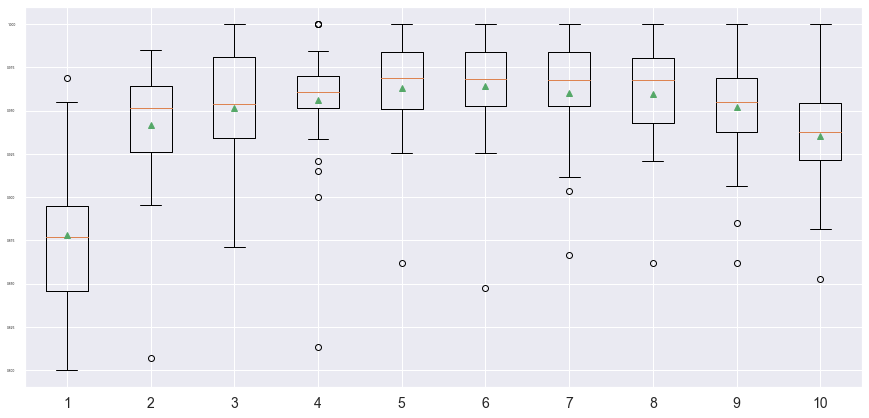

In [224]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=value), random_state = 15)      
    return models

models = get_models([1,2,3,4,5,6, 7, 8, 9, 10])
return_results(models)

>ad_LR 0.863 (0.036)
>ad_def 0.878 (0.043)


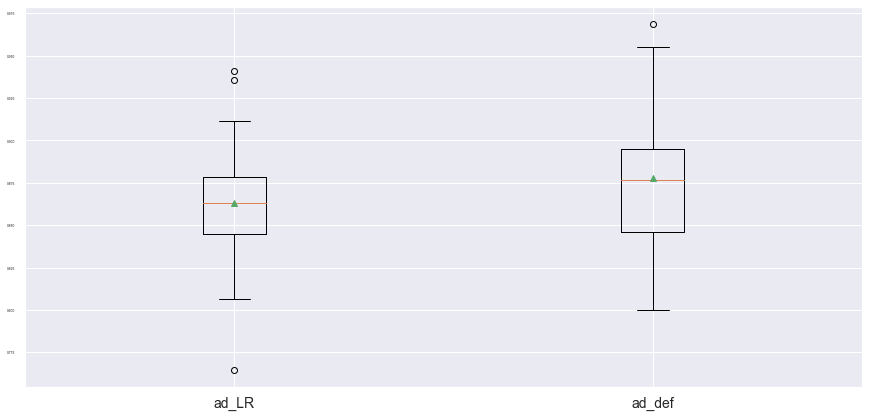

In [225]:
def get_models():
    models = dict()
    models['ad_LR'] = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter=500), random_state = 15) 
    models['ad_def'] = AdaBoostClassifier(random_state = 15)  
    return models

models = get_models()
return_results(models)

>2 0.775 (0.048)
>5 0.834 (0.045)
>10 0.856 (0.045)
>20 0.868 (0.042)
>30 0.870 (0.040)
>50 0.878 (0.043)
>100 0.877 (0.042)
>150 0.876 (0.043)


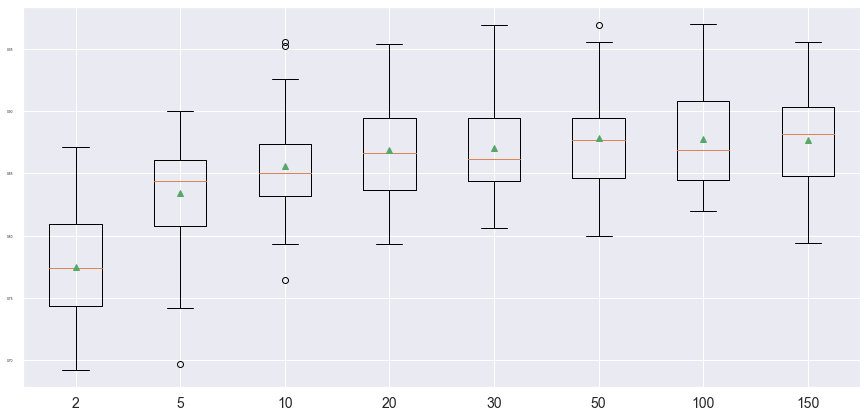

In [226]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150])
return_results(models)

>0.1 0.867 (0.039)
>0.2 0.866 (0.035)
>0.3 0.867 (0.033)
>0.4 0.872 (0.033)
>0.5 0.876 (0.044)
>0.6 0.875 (0.041)
>0.7 0.877 (0.044)
>0.8 0.877 (0.043)
>0.9 0.869 (0.047)
>1.0 0.878 (0.043)


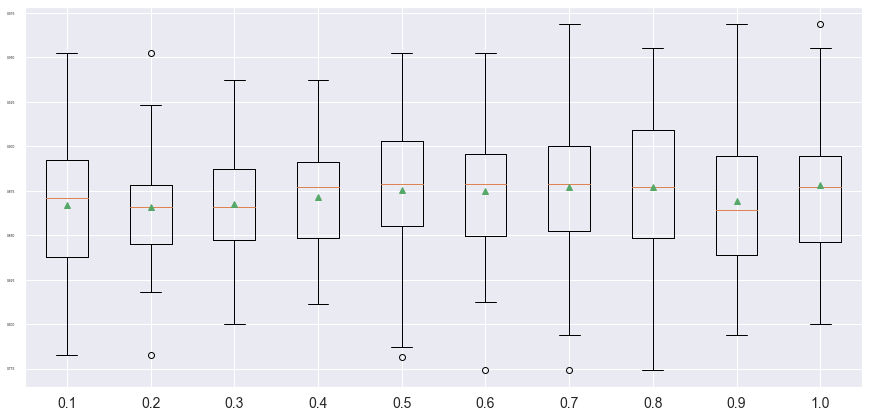

In [227]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

In [390]:
parametes_adaBoost = {
              "base_estimator" : [DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=6),DecisionTreeClassifier(max_depth=7)],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[30,50,80,100],
              "learning_rate":  [0.8, 1,1.5]
}

In [391]:
model_adaBoost = GridSearchCV(model_Ada, parametes_adaBoost, cv=10, scoring='f1')

model_adaBoost.fit(X_train, y_train)
final_model_adaBoost = model_adaBoost.best_estimator_
print(model_adaBoost.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Ada Boost'])
show_results(df, [final_model_adaBoost])

{'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=7), 'learning_rate': 1, 'n_estimators': 80}


Time      Train   Validation f1 Train f1 Validation
Ada Boost  0.28+/-0.03  1.0+/-0.0  0.974+/-0.0      1.0         0.975

#### 3.7.4 Gradient Boosting

>0.1 0.925 (0.038)
>0.3 0.955 (0.036)
>0.5 0.959 (0.029)
>0.8 0.952 (0.034)
>1.0 0.954 (0.030)


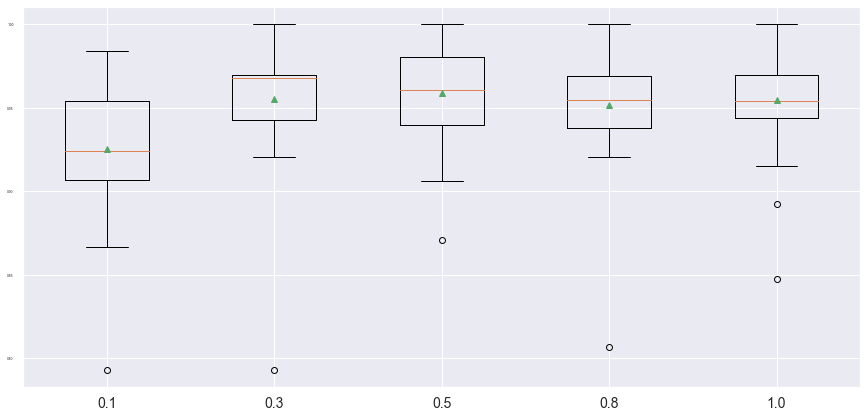

In [231]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

>100 0.925 (0.038)
>200 0.943 (0.035)
>300 0.955 (0.034)


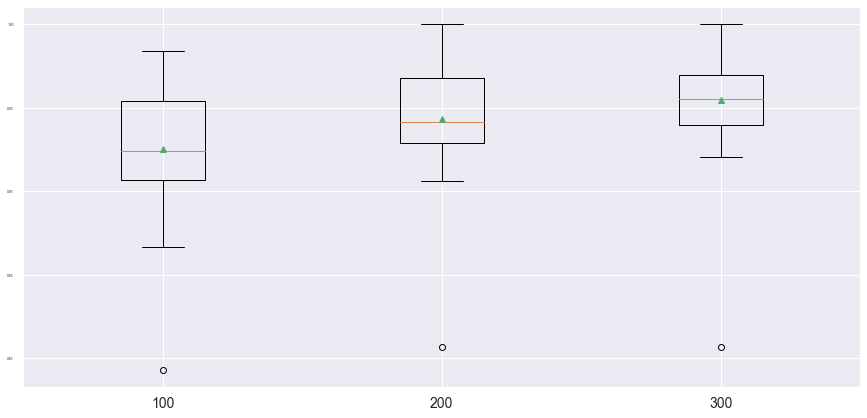

In [232]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([100, 200, 300])
return_results(models)

>0.2 0.896 (0.044)
>0.4 0.911 (0.042)
>0.6 0.927 (0.035)
>0.8 0.919 (0.039)
>1.0 0.925 (0.038)


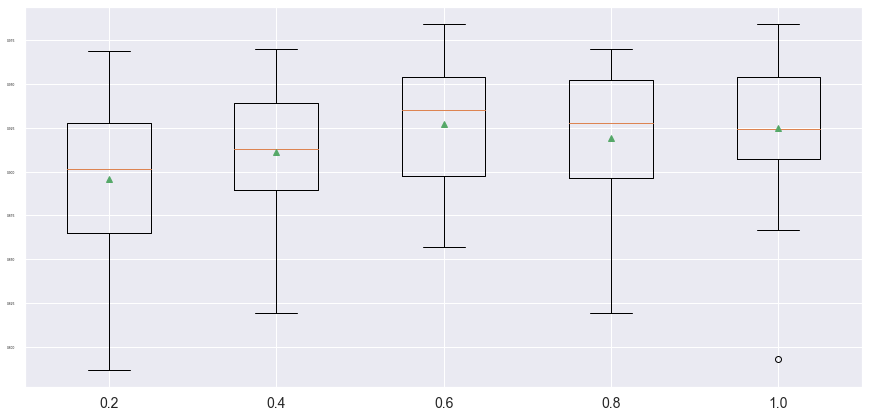

In [233]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 15)      
    return models

models = get_models([0.2,0.4,0.6,0.8,1.0])
return_results(models)

>2 0.905 (0.038)
>0.5 0.912 (0.041)
>sqrt 0.906 (0.044)
>log2 0.906 (0.044)
>None 0.925 (0.038)


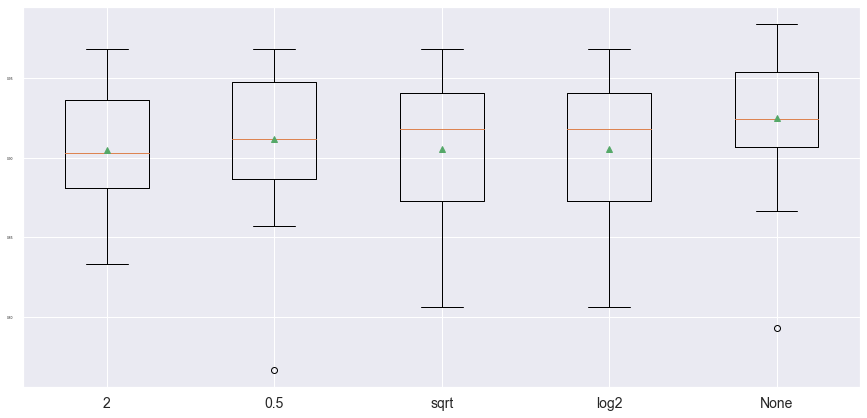

In [234]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 15)      
    return models

models = get_models([2,0.5,'sqrt','log2',None])
return_results(models)

In [392]:
parameters_GradientBoosting = {
    'n_estimators': [300],
    'learning_rate': [0.3, 0.5],
    'subsample': [0.6, 1],
    'max_features': [None]
}

In [394]:
model_GradientBoosting = GridSearchCV(GradientBoostingClassifier(), parameters_GradientBoosting, cv=10)

model_GradientBoosting.fit(X_train, y_train)
final_model_GradientBoosting = model_GradientBoosting.best_estimator_

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Gradient_Boosting'])
show_results(df, [final_model_GradientBoosting])

Time      Train    Validation f1 Train  \
Gradient_Boosting  0.361+/-0.01  1.0+/-0.0  0.978+/-0.01      1.0   

                  f1 Validation  
Gradient_Boosting          0.98

## 4. Assessment

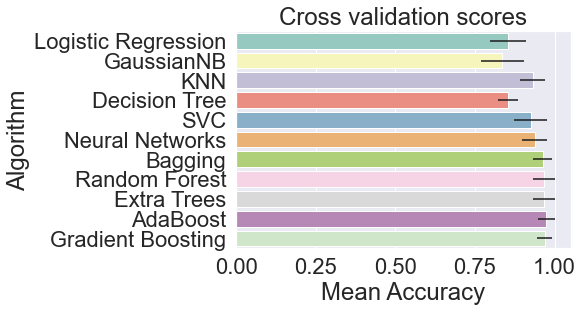

In [416]:
classifiers = []

classifiers.append(model_LogisticRegression)
classifiers.append(model_GaussianNB)
classifiers.append(model_KNN)
classifiers.append(model_DT)
classifiers.append(model_SVC)
classifiers.append(final_model_NN)
classifiers.append(final_model_Bagging)
classifiers.append(final_model_forest)
classifiers.append(final_model_ExtraTrees)
classifiers.append(final_model_adaBoost)
classifiers.append(final_model_GradientBoosting)


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = 10, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Logistic Regression", "GaussianNB", "KNN", "Decision Tree", "SVC", "Neural Networks", "Bagging", "Random Forest", "Extra Trees", "AdaBoost", "Gradient Boosting"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## 5. Deployment

In [417]:
test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')

In [418]:
test_demo.head()

PatientID                   Name  Birth_Year                    Region  \
0       1343    Mr. Ricardo Sherman        1970             East Midlands   
1       1727  Mr. Jessie Strickland        1966  Yorkshire and the Humber   
2       1828     Mr. Robert Foreman        1978             West Midlands   
3       1155     Mr. Edwin Ferguson        1968  Yorkshire and the Humber   
4       1020      Mr. Eliseo Krefft        1962             East Midlands   

                                     Education  
0         Elementary School (1st to 9th grade)  
1        University Complete (3 or more years)  
2  High School Incomplete (10th to 11th grade)  
3  High School Incomplete (10th to 11th grade)  
4  High School Incomplete (10th to 11th grade)

In [419]:
test_habits.head()

PatientID Smoking_Habit                       Drinking_Habit Exercise  \
0       1343           Yes  I usually consume alcohol every day       No   
1       1727            No   I consider myself a social drinker       No   
2       1828            No  I usually consume alcohol every day      Yes   
3       1155            No  I usually consume alcohol every day       No   
4       1020            No   I consider myself a social drinker       No   

                                       Fruit_Habit  \
0  Less than 1. I do not consume fruits every day.   
1  Less than 1. I do not consume fruits every day.   
2  Less than 1. I do not consume fruits every day.   
3  Less than 1. I do not consume fruits every day.   
4  Less than 1. I do not consume fruits every day.   

                                      Water_Habit  
0                Between one liter and two liters  
1  More than half a liter but less than one liter  
2                Between one liter and two liters  
3                          Less than half a liter  
4                          Less than half a liter

In [420]:
test_health.head()

PatientID  Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
0       1343     172      80               203             172             20   
1       1727     171      80               225             130             21   
2       1828     171      78               237             130             24   
3       1155     174      87               313             108             19   
4       1020     172      56               189             140             19   

   Physical_Health            Checkup  \
0                2           Not sure   
1                0           Not sure   
2                1  More than 3 years   
3                0           Not sure   
4               14  More than 3 years   

                                            Diabetes  
0  I have/had pregnancy diabetes or borderline di...  
1                                 I do have diabetes  
2  I have/had pregnancy diabetes or borderline di...  
3                                 I do have diabetes  
4  I have/had pregnancy diabetes or borderline di...

Merging all the datasets into a unique one based on the PatientID variable.

In [421]:
test_patient_original = pd.merge(pd.merge(test_demo, test_health, on="PatientID"), test_habits, on='PatientID')

In [422]:
test_patient_original

PatientID                      Name  Birth_Year  \
0         1343       Mr. Ricardo Sherman        1970   
1         1727     Mr. Jessie Strickland        1966   
2         1828        Mr. Robert Foreman        1978   
3         1155        Mr. Edwin Ferguson        1968   
4         1020         Mr. Eliseo Krefft        1962   
5         1751       Mrs. Cristine Evans        1957   
6         1814           Mr. Victor Rice        1960   
7         1460           Mr. Robert Carr        1953   
8         1913       Mr. Clinton Salinas        1977   
9         1530        Mrs. Cora Flanagan        1962   
10        1455        Mr. Chase Bartlett        1953   
11        1300           Mrs. Paula Taft        1976   
12        1282        Mrs. Maria Stewart        1981   
13        1352        Mr. Richard Medley        1965   
14        1972          Mr. Larry Salter        1970   
15        1958         Mrs. Mary Bourdon        1957   
16        1740      Mr. Michael Williams        1978   
17        1774          Mrs. Ann Hansell        1974   
18        1059        Mr. Ronnie Perkins        1965   
19        1578      Mrs. Jennifer Lawson        1960   
20        1233    Mrs. Lizzette Longwell        1981   
21        1603          Mrs. Amanda West        1959   
22        1896        Mr. George Walston        1963   
23        1098       Mr. Stephen Gardner        1957   
24        1883       Mr. Charles Camacho        1974   
25        1615            Mrs. Lena Ames        1972   
26        1137        Mrs. Katherine Cox        1958   
27        1541      Mr. Joseph Immediato        1978   
28        1203           Mr. Leon Manney        1958   
29        1141          Mrs. Amanda Wink        1959   
30        1421       Mrs. Marsha Wallace        1980   
31        1272      Mrs. Lorene Chandler        1983   
32        1144         Mr. Jeff Pimentel        1975   
33        1902            Mrs. Mary Polk        1960   
34        1199        Mr. Thomas Gaffney        1972   
35        1353        Mr. Charles Carson        1965   
36        1706           Mr. Ryan Palmer        1965   
37        1041      Mr. Michael Robinson        1968   
38        1533      Mrs. Valerie Howorth        1969   
39        1108      Mr. Thomas Vogelpohl        1982   
40        1889     Mrs. Rosemarie Palmer        1959   
41        1090         Mrs. Edith Solari        1968   
42        1384       Mr. Frank Mcclellan        1987   
43        1083           Mr. Paul Drabek        1984   
44        1186             Mr. John Dean        1982   
45        1688          Mrs. Rhonda Byrd        1966   
46        1015        Mrs. Jaclyn Morris        1988   
47        1890          Mrs. Marie Combs        1967   
48        1339          Mr. Henry Ulcena        1962   
49        1704         Mr. Rolland Cross        1971   
50        1319        Mrs. Monica Laurie        1969   
51        1786         Mr. Edward Walker        1955   
52        1483          Mr. Joseph Boyle        1987   
53        1423        Mrs. Sarah Walzier        1964   
54        1526       Mrs. Linda Mitchell        1960   
55        1678         Mrs. Shalon Brame        1981   
56        1275              Mr. Jc Tiede        1966   
57        1029         Mrs. Tonya Fisher        1967   
58        1287      Mrs. Estelle Spinney        1951   
59        1291   Mr. Christopher Moralez        1964   
60        2009            Mr. Earl Seitz        1982   
61        1313      Mrs. Margaret Oleary        1948   
62        1223        Mrs. Susan Sanders        1983   
63        1981          Mr. James Hawkes        1983   
64        1838           Mr. Rene Garner        1971   
65        1068      Mrs. Margret Hubbard        1985   
66        1892        Mr. Isaac Williams        1968   
67        1261       Mr. Charlie Douglas        1968   
68        1040      Mrs. Deborah Dunagan        1957   
69        1417         Mr. Donald Kinsey        1970   
70        1166       Mr. Alfr

In [423]:
test_patient_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         225 non-null    int64 
 1   Name              225 non-null    object
 2   Birth_Year        225 non-null    int64 
 3   Region            225 non-null    object
 4   Education         225 non-null    object
 5   Height            225 non-null    int64 
 6   Weight            225 non-null    int64 
 7   High_Cholesterol  225 non-null    int64 
 8   Blood_Pressure    225 non-null    int64 
 9   Mental_Health     225 non-null    int64 
 10  Physical_Health   225 non-null    int64 
 11  Checkup           225 non-null    object
 12  Diabetes          225 non-null    object
 13  Smoking_Habit     225 non-null    object
 14  Drinking_Habit    225 non-null    object
 15  Exercise          225 non-null    object
 16  Fruit_Habit       225 non-null    object
 17  Water_Habit     

In [424]:
test_patient = test_patient_original.copy()

### 5.1 Repeating all the preprocessing steps for the test data

In [425]:
test_patient.duplicated().value_counts()

False    225
dtype: int64

In [426]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = test_patient.replace(undesireable_char,np.nan, inplace=True)

In [427]:
print(a)

None


In [428]:
test_patient.set_index('PatientID', inplace = True)

Looking for null values in the dataframe. We concluded that Education contains 13 null values.

In [429]:
test_patient.isna().sum()

Name                0
Birth_Year          0
Region              0
Education           0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
dtype: int64

In [430]:
test_patient.replace(to_replace="LONDON", value="London", inplace=True, limit=None)

Creating a gender variable based on the prefix in the Name.

In [431]:
#Create variable Gender
gender = []

for elem in test_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

test_patient['Gender'] = gender

print(test_patient['Gender'])

PatientID
1343    M
1727    M
1828    M
1155    M
1020    M
1751    F
1814    M
1460    M
1913    M
1530    F
1455    M
1300    F
1282    F
1352    M
1972    M
1958    F
1740    M
1774    F
1059    M
1578    F
1233    F
1603    F
1896    M
1098    M
1883    M
1615    F
1137    F
1541    M
1203    M
1141    F
1421    F
1272    F
1144    M
1902    F
1199    M
1353    M
1706    M
1041    M
1533    F
1108    M
1889    F
1090    F
1384    M
1083    M
1186    M
1688    F
1015    F
1890    F
1339    M
1704    M
1319    F
1786    M
1483    M
1423    F
1526    F
1678    F
1275    M
1029    F
1287    F
1291    M
2009    M
1313    F
1223    F
1981    M
1838    M
1068    F
1892    M
1261    M
1040    F
1417    M
1166    M
1692    M
1765    M
1997    M
1809    F
1347    F
1442    M
1388    M
1700    M
1131    F
1934    M
1790    M
1739    M
1546    M
1310    M
1125    F
1341    M
1189    M
1737    M
1316    F
1375    M
1993    M
1504    M
1234    F
1188    M
1752    M
1505    F
1398    M
1331    F


Converting the Birth Year to Age by subtracting it to the current Year.

In [432]:
test_patient['Age'] = datetime.now().year - test_patient['Birth_Year'] 
print(test_patient['Age'])

PatientID
1343    52
1727    56
1828    44
1155    54
1020    60
1751    65
1814    62
1460    69
1913    45
1530    60
1455    69
1300    46
1282    41
1352    57
1972    52
1958    65
1740    44
1774    48
1059    57
1578    62
1233    41
1603    63
1896    59
1098    65
1883    48
1615    50
1137    64
1541    44
1203    64
1141    63
1421    42
1272    39
1144    47
1902    62
1199    50
1353    57
1706    57
1041    54
1533    53
1108    40
1889    63
1090    54
1384    35
1083    38
1186    40
1688    56
1015    34
1890    55
1339    60
1704    51
1319    53
1786    67
1483    35
1423    58
1526    62
1678    41
1275    56
1029    55
1287    71
1291    58
2009    40
1313    74
1223    39
1981    39
1838    51
1068    37
1892    54
1261    54
1040    65
1417    52
1166    56
1692    53
1765    57
1997    54
1809    54
1347    54
1442    57
1388    64
1700    41
1131    51
1934    42
1790    54
1739    52
1546    70
1310    61
1125    60
1341    44
1189    64
1737    67
1316    64


Creating a variable of Body Mass Index using the Weight and Height variables.

In [433]:
#Create variable BMI     
test_patient['BMI'] = (test_patient['Weight']/(test_patient['Height']**2)*10000).round(2)

print(test_patient['BMI'])

PatientID
1343    27.04
1727    27.36
1828    26.67
1155    28.74
1020    18.93
1751    28.69
1814    29.07
1460    18.71
1913    19.05
1530    21.05
1455    19.16
1300    27.19
1282    26.37
1352    24.30
1972    24.34
1958    26.18
1740    26.40
1774    26.18
1059    28.69
1578    21.50
1233    28.07
1603    27.94
1896    17.93
1098    29.40
1883    23.45
1615    23.31
1137    28.30
1541    27.38
1203    24.69
1141    19.56
1421    23.12
1272    18.59
1144    27.25
1902    16.82
1199    24.77
1353    22.99
1706    19.05
1041    22.99
1533    25.44
1108    28.58
1889    23.12
1090    25.39
1384    25.34
1083    27.08
1186    23.39
1688    17.04
1015    27.59
1890    19.96
1339    25.10
1704    26.42
1319    29.38
1786    20.94
1483    25.91
1423    25.10
1526    17.44
1678    29.82
1275    17.36
1029    20.69
1287    27.89
1291    20.80
2009    24.96
1313    29.64
1223    26.37
1981    18.94
1838    29.07
1068    27.59
1892    22.39
1261    27.08
1040    28.44
1417    25.73
1166    23

In [434]:
test_patient = test_patient.drop(["Birth_Year", "Name"],axis = 1)

In [435]:
test_patient = pd.get_dummies(test_patient, drop_first=True)

In [436]:
test_patient

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1343          172      80               203             172             20   
1727          171      80               225             130             21   
1828          171      78               237             130             24   
1155          174      87               313             108             19   
1020          172      56               189             140             19   
1751          167      80               364             160             18   
1814          174      88               212             128             15   
1460          173      56               258             140             17   
1913          173      57               212             104             17   
1530          166      58               262             150             19   
1455          174      58               238             160             13   
1300          151      62               208             105             23   
1282          157      65               208             130             23   
1352          178      77               339             110             16   
1972          172      72               190             118             27   
1958          167      73               421             140             19   
1740          173      79               239             140             24   
1774          167      73               279             130             15   
1059          167      80               236             154             21   
1578          157      53               398             140             19   
1233          151      64               310             126             21   
1603          166      77               199             140             24   
1896          167      50               274             178             16   
1098          167      82               252             110             19   
1883          174      71               278             124             21   
1615          155      56               223             120             19   
1137          155      68               329             180             19   
1541          172      81               239             140             24   
1203          180      80               231             170             19   
1141          155      47               201             124             14   
1421          157      57               269             102             11   
1272          172      55               224             138             18   
1144          167      76               208             112             16   
1902          158      42               272             140             20   
1199          174      75               204             144             12   
1353          172      68               205             110             12   
1706          162      50               233             128             18   
1041          172      68               262             120             17   
1533          151      58               238             138             20   
1108          162      75               227             152             25   
1889          157      57               411             150             19   
1090          155      61               271             108             21   
1384          165      69               286             126             19   
1083          174      82               179             138             23   
1186          173      70               171             110              9   
1688          157      42               292             200             14   
1015          157      68               214             118             27   
1890          166      55               209             128             13   
1339          167      70               257             130             16   
1704          174      80        

In [437]:
X_test_num = test_patient.select_dtypes(include=np.number).set_index(test_patient.index)
X_test_cat = test_patient.select_dtypes(exclude=np.number).set_index(test_patient.index)

In [438]:
X_test_num_scaled = scaler.transform(X_test_num)

test_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns)
test_scaled.head(3)

Height    Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
0  0.724138  0.696429          0.272388        0.906977       0.653846   
1  0.689655  0.696429          0.354478        0.418605       0.692308   
2  0.689655  0.660714          0.399254        0.418605       0.807692   

   Physical_Health       Age       BMI  Region_East of England  Region_London  \
0             0.10  0.479167  0.766768                     0.0            0.0   
1             0.00  0.562500  0.791159                     0.0            0.0   
2             0.05  0.312500  0.738567                     0.0            0.0   

   ...  Drinking_Habit_I do not consume any type of alcohol  \
0  ...                                                0.0     
1  ...                                                0.0     
2  ...                                                0.0     

   Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
0                                                1.0            0.0   
1                                                0.0            0.0   
2                                                1.0            1.0   

   Fruit_Habit_3 to 4 pieces of fruit in average  \
0                                            0.0   
1                                            0.0   
2                                            0.0   

   Fruit_Habit_5 to 6 pieces of fruit in average  \
0                                            0.0   
1                                            0.0   
2                                            0.0   

   Fruit_Habit_Less than 1. I do not consume fruits every day.  \
0                                                1.0             
1                                                1.0             
2                                                1.0             

   Fruit_Habit_More than six pieces of fruit  \
0                                        0.0   
1                                        0.0   
2                                        0.0   

   Water_Habit_Less than half a liter  \
0                                 0.0   
1                                 0.0   
2                                 0.0   

   Water_Habit_More than half a liter but less than one liter  Gender_M  
0                                                0.0                1.0  
1                                                1.0                1.0  
2                                                0.0                1.0  

[3 rows x 38 columns]

In [439]:
X_test = test_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'Weight',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [440]:
X_test

Gender_M  Fruit_Habit_Less than 1. I do not consume fruits every day.  \
0         1.0                                                1.0             
1         1.0                                                1.0             
2         1.0                                                1.0             
3         1.0                                                1.0             
4         1.0                                                1.0             
5         0.0                                                1.0             
6         1.0                                                1.0             
7         1.0                                                0.0             
8         1.0                                                1.0             
9         0.0                                                0.0             
10        1.0                                                0.0             
11        0.0                                                1.0             
12        0.0                                                1.0             
13        1.0                                                0.0             
14        1.0                                                1.0             
15        0.0                                                0.0             
16        1.0                                                1.0             
17        0.0                                                1.0             
18        1.0                                                0.0             
19        0.0                                                1.0             
20        0.0                                                1.0             
21        0.0                                                0.0             
22        1.0                                                1.0             
23        1.0                                                0.0             
24        1.0                                                1.0             
25        0.0                                                1.0             
26        0.0                                                1.0             
27        1.0                                                1.0             
28        1.0                                                1.0             
29        0.0                                                1.0             
30        0.0                                                1.0             
31        0.0                                                1.0             
32        1.0                                                1.0             
33        0.0                                                0.0             
34        1.0                                                1.0             
35        1.0                                                1.0             
36        1.0                                                0.0             
37        1.0                                                1.0             
38        0.0                                                1.0             
39        1.0                                                1.0             
40        0.0                                                0.0             
41        0.0                                                1.0             
42        1.0                                                1.0             
43        1.0                                                0.0             
44        1.0                                                1.0             
45        0.0                                                0.0             
46        0.0                                                1.0             
47        0.0                                                0.0             
48        1.0                                                0.0             
49        1.0                                                0.0             
50        0.0              

In [441]:
final_model = final_model_forest.predict(X_test)
final_model

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1], dtype=int64)

In [442]:
answer = pd.DataFrame([test_patient.index.T, final_model]).T
answer.columns = ['PatientID','Disease']
answer

PatientID  Disease
0         1343        1
1         1727        1
2         1828        1
3         1155        1
4         1020        0
5         1751        1
6         1814        1
7         1460        0
8         1913        1
9         1530        0
10        1455        1
11        1300        1
12        1282        1
13        1352        0
14        1972        1
15        1958        1
16        1740        1
17        1774        1
18        1059        0
19        1578        1
20        1233        1
21        1603        1
22        1896        1
23        1098        0
24        1883        0
25        1615        1
26        1137        1
27        1541        1
28        1203        1
29        1141        0
30        1421        1
31        1272        1
32        1144        1
33        1902        0
34        1199        0
35        1353        1
36        1706        0
37        1041        1
38        1533        1
39        1108        0
40        1889        0
41        1090        1
42        1384        0
43        1083        1
44        1186        0
45        1688        0
46        1015        1
47        1890        0
48        1339        0
49        1704        1
50        1319        1
51        1786        0
52        1483        1
53        1423        0
54        1526        0
55        1678        1
56        1275        0
57        1029        0
58        1287        1
59        1291        0
60        2009        0
61        1313        1
62        1223        1
63        1981        0
64        1838        1
65        1068        1
66        1892        0
67        1261        1
68        1040        1
69        1417        1
70        1166        0
71        1692        0
72        1765        0
73        1997        0
74        1809        1
75        1347        1
76        1442        0
77        1388        0
78        1700        1
79        1131        1
80        1934        1
81        1790        0
82        1739        0
83        1546        0
84        1310        0
85        1125        1
86        1341        1
87        1189        0
88        1737        0
89        1316        1
90        1375        1
91        1993        0
92        1504        0
93        1234        1
94        1188        0
95        1752        1
96        1505        1
97        1398        0
98        1331        0
99        1450        0
100       1138        1
101       1367        0
102       1404        0
103       1875        0
104       1433        1
105       1419        1
106       1667        0
107       1931        0
108       1916        0
109       1800        0
110       1895        0
111       1213        1
112       1227        1
113       1914        0
114       1458        1
115       1766        0
116       1722        1
117       1755        1
118       1173        1
119       1087        0
120       1820        0
121       1480        0
122       1640        1
123       1570        1
124       1160        0
125       1718        1
126       1624        1
127       1312        0
128       1714        1
129       1492        0
130       1634        0
131       1474        0
132       1130        1
133       1599        1
134       1332        1
135       1512        0
136       1430        0
137       1794        0
138       1623        0
139       1153        1
140       1742        0
141       1960        1
142       2021        0
143       1427        1
144       1638        0
145       1607        0
146       1226        0
147       1967        1
148       1630        0
149       1097        0
150       1509        0
151       1784        1
152       1687        0
153       1969        1
154       1521        1
155       1084        1
156       1710        1
157       1315        1
158       1446        1
159       1610        0
160       1447        0
161       1293        1
162       1496        0
163       1393        0
164       1602        1
165       1465       

In [443]:
answer["PatientID"]=answer["PatientID"].astype(int)
answer["Disease"]=answer["Disease"].astype(int)

In [444]:
answer.head(20)

PatientID  Disease
0        1343        1
1        1727        1
2        1828        1
3        1155        1
4        1020        0
5        1751        1
6        1814        1
7        1460        0
8        1913        1
9        1530        0
10       1455        1
11       1300        1
12       1282        1
13       1352        0
14       1972        1
15       1958        1
16       1740        1
17       1774        1
18       1059        0
19       1578        1

In [445]:
answer.to_csv('answ_log_1.csv', index = None)